# Data Understanding

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('training_clean.csv')

In [3]:
train.head()

,IsBadBuy,Auction,VehicleAge,Make,Model,Trim,SubModel,Transmission,WheelType,VehOdo,...,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,3,MAZDA,MAZDA3,i,4D SEDAN I,AUTO,Alloy,89046,...,OTHER,8155.0,9829.0,11636.0,13600.0,33619,FL,7100.0,0,1113
1,0,ADESA,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,AUTO,Alloy,93593,...,CHRYSLER,6854.0,8383.0,10897.0,12572.0,33619,FL,7600.0,0,1053
2,0,ADESA,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,AUTO,Covers,73807,...,CHRYSLER,3202.0,4760.0,6943.0,8457.0,33619,FL,4900.0,0,1389
3,0,ADESA,5,DODGE,NEON,SXT,4D SEDAN,AUTO,Alloy,65617,...,CHRYSLER,1893.0,2675.0,4658.0,5690.0,33619,FL,4100.0,0,630
4,0,ADESA,4,FORD,FOCUS,ZX3,2D COUPE ZX3,MANUAL,Covers,69367,...,FORD,3913.0,5054.0,7723.0,8707.0,33619,FL,4000.0,0,1020


In [4]:
train.describe()

,IsBadBuy,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.122988,4.176644,71499.995917,6129.613212,7374.449415,8497.838602,9851.836451,58043.059945,6730.934326,0.025280,1276.580985
std,0.328425,1.712210,14578.913128,2462.249358,2722.817347,3156.429707,3385.993667,26151.640415,1767.846435,0.156975,598.846788
min,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,2764.000000,1.000000,0.000000,462.000000
25%,0.000000,3.000000,61837.000000,4273.000000,5407.000000,6281.000000,7494.000000,32124.000000,5435.000000,0.000000,837.000000
50%,0.000000,4.000000,73361.000000,6098.000000,7305.000000,8446.000000,9790.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,0.000000,5.000000,82436.000000,7766.000000,9023.000000,10653.000000,12089.000000,80022.000000,7900.000000,0.000000,1623.000000
max,1.000000,9.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,99224.000000,45469.000000,1.000000,7498.000000


### Vehicle Age

In [5]:
cross_Age = pd.crosstab( train.VehicleAge, train.IsBadBuy)
cross_Age

IsBadBuy,0,1
VehicleAge,,
0,2,0
1,2969,125
2,7942,540
3,14601,1301
4,15149,1864
5,11061,1895
6,6575,1447
7,3641,1005
8,1623,597


In [6]:
# Normalize the cross tab to sum to 1:
cross_Age_p = cross_Age.div(cross_Age.sum(1).astype(float), axis=0)
cross_Age_p

IsBadBuy,0,1
VehicleAge,,
0,1.000000,0.000000
1,0.959599,0.040401
2,0.936336,0.063664
3,0.918186,0.081814
4,0.890437,0.109563
5,0.853736,0.146264
6,0.819621,0.180379
7,0.783685,0.216315
8,0.731081,0.268919


In [7]:
Mapping_Age = dict()
for e in train['VehicleAge'].unique():
    if e == 0:
        Mapping_Age[e] = 1
    else:
        Mapping_Age[e] = e
Mapping_Age

{3: 3, 5: 5, 4: 4, 2: 2, 8: 8, 6: 6, 7: 7, 9: 9, 1: 1, 0: 1}

In [8]:
train['VehicleAge']=train['VehicleAge'].map(Mapping_Age)
cross_Age = pd.crosstab( train.VehicleAge, train.IsBadBuy)
cross_Age_p = cross_Age.div(cross_Age.sum(1).astype(float), axis=0)
cross_Age_p

IsBadBuy,0,1
VehicleAge,,
1,0.959625,0.040375
2,0.936336,0.063664
3,0.918186,0.081814
4,0.890437,0.109563
5,0.853736,0.146264
6,0.819621,0.180379
7,0.783685,0.216315
8,0.731081,0.268919
9,0.687307,0.312693


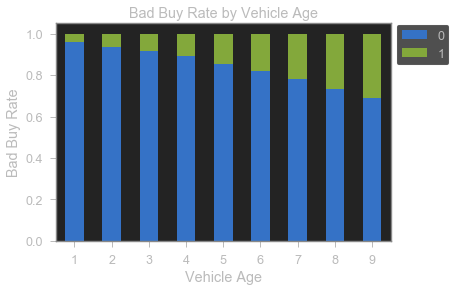

In [9]:
graph = cross_Age_p.plot(kind='bar', stacked=True, legend=False)
plt.title('Bad Buy Rate by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Bad Buy Rate')
plt.xticks(rotation=0)
graph.legend(loc='center left', bbox_to_anchor=(1, 0.9))

Con l'avanzare dell'età, il rapporto tra bad buy e good buy aumenta sensibilmente.

### VehBCost

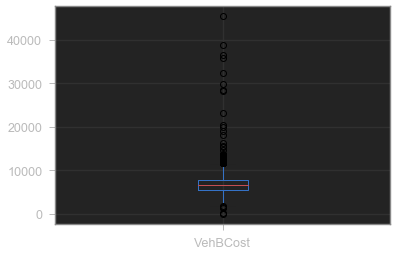

In [10]:
train[['VehBCost']].boxplot()

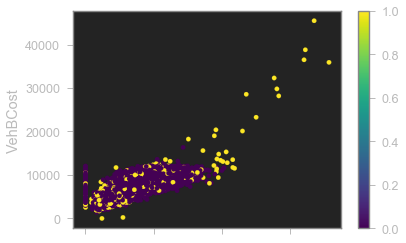

In [11]:
train.plot.scatter('MMRAcquisitionAuctionAveragePrice', 'VehBCost', c=train['IsBadBuy'].values, colormap='viridis')

In [12]:
mmr0=train[['MMRAcquisitionAuctionAveragePrice','VehBCost','IsBadBuy']][train['MMRAcquisitionAuctionAveragePrice']==0]

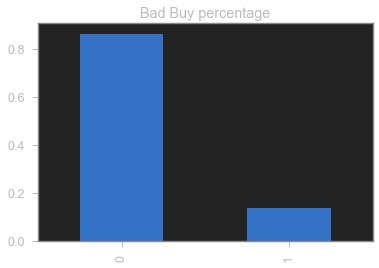

In [13]:
bb = mmr0['IsBadBuy'].value_counts(normalize=True).plot(kind='bar', title='Bad Buy percentage')

In [14]:
mmr0['IsBadBuy'].value_counts()

0    714
1    114
Name: IsBadBuy, dtype: int64

In [15]:
mmr1=train[['MMRAcquisitionAuctionAveragePrice','VehBCost','IsBadBuy']][train['MMRAcquisitionAuctionAveragePrice']>0]

In [16]:
mmr1['IsBadBuy'].value_counts()/len(mmr1['IsBadBuy'])

0    0.877181
1    0.122819
Name: IsBadBuy, dtype: float64

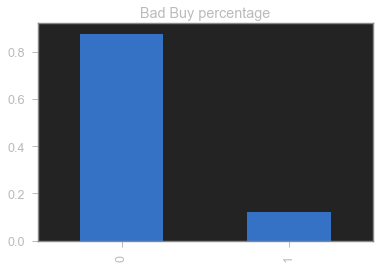

In [17]:
bb = mmr1['IsBadBuy'].value_counts(normalize=True).plot(kind='bar', title='Bad Buy percentage')

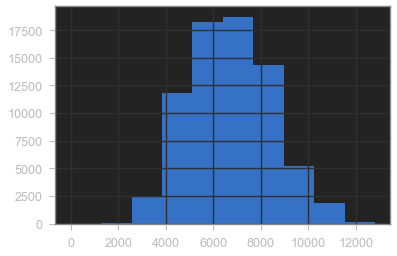

In [18]:
cost_cutted=train[['VehBCost','IsBadBuy']][train['VehBCost']<13000]
cost_cutted['VehBCost'].hist()
plt.savefig('Cost_hist.png')

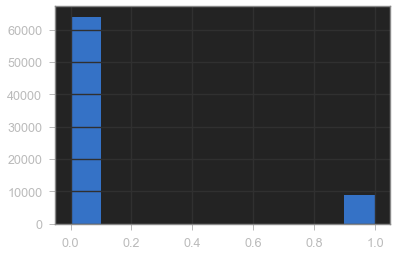

In [19]:
cost_cutted['IsBadBuy'].hist()
plt.savefig('Bad_hist.png')

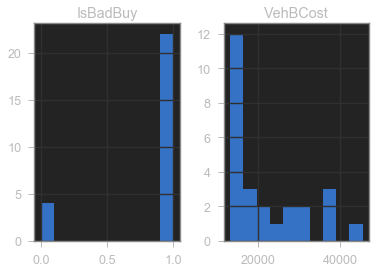

In [20]:
cost_up=train[['VehBCost','IsBadBuy']][train['VehBCost']>13000]
cost_up.hist()
plt.savefig('Out_hist.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256D66C1AC8>,
      dtype=object)

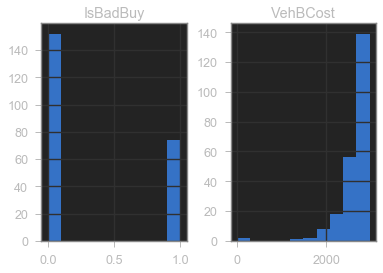

In [21]:
cost_up=train[['VehBCost','IsBadBuy']][train['VehBCost']<2970]
cost_up.hist()

In [22]:
BadBuyPerc=list()
soglie=[i for i in range(1000,int(max(train['VehBCost'])),1000)]
soglie_max=[i for i in range(1000,int(max(train['VehBCost'])),1000)]
soglie_min=[i for i in range(0,int(max(train['VehBCost']))-1000,1000)]
for soglia_min, soglia_max in zip(soglie_min, soglie_max):
    cost_up = train[['VehBCost','IsBadBuy']][train['VehBCost'].between(soglia_min,soglia_max)]
    sc = cost_up['IsBadBuy'].value_counts()/len(cost_up['IsBadBuy'])
    try:
        if sc[1]:
            BadBuyPerc.append(sc[1])
        else:
            soglie.remove(soglia_max)
            continue
    except:
        soglie.remove(soglia_max)

Text(0, 0.5, 'Bad Buy Rate')

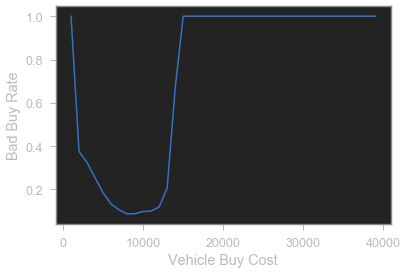

In [23]:
plt.plot(soglie, BadBuyPerc)
plt.xlabel('Vehicle Buy Cost')
plt.ylabel('Bad Buy Rate')

In [24]:
Q3 = train['VehBCost'].describe()['75%']
Q1 = train['VehBCost'].describe()['25%']
RI = Q3-Q1
conditions=[train['VehBCost']<Q1-RI,
            train['VehBCost'].between(Q3+1.5*RI,Q3+3*RI),
            train['VehBCost']>Q3+3*RI]
choices=[0, 2, 3]
train['OutCost']=np.select(conditions, choices, default=1)
cross_cost=pd.crosstab(train['OutCost'],train['IsBadBuy'])
cross_cost

IsBadBuy,0,1
OutCost,,
0,152,74
1,63704,8862
2,150,25
3,1,15


In [25]:
cross_cost_p = cross_cost.div(cross_cost.sum(1).astype(float), axis=0)
cross_cost_p

IsBadBuy,0,1
OutCost,,
0,0.672566,0.327434
1,0.877877,0.122123
2,0.857143,0.142857
3,0.062500,0.937500


### VehOdo

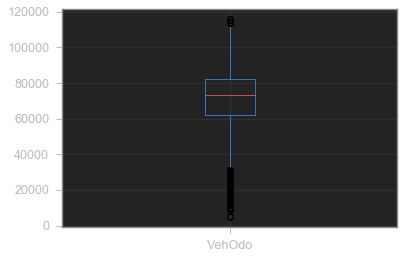

In [26]:
train[['VehOdo']].boxplot()

In [27]:
train1=train[train['IsBadBuy']==1]
train0=train[train['IsBadBuy']==0]

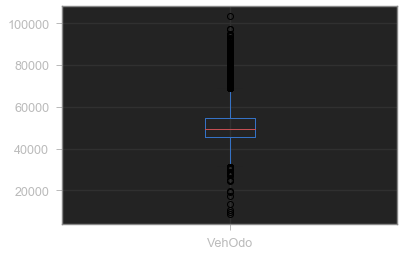

In [28]:
train[['VehOdo']][train['VehicleAge']==1].boxplot()

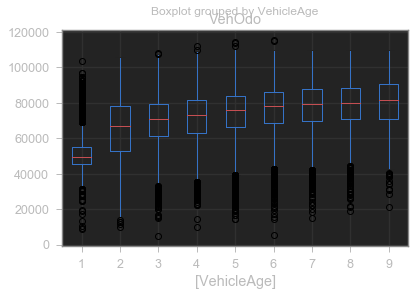

In [29]:
train.boxplot(column=['VehOdo'], by=['VehicleAge'])

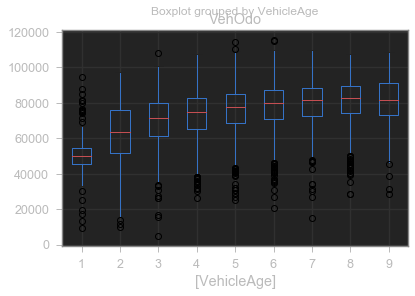

In [30]:
train1.boxplot(column=['VehOdo'], by=['VehicleAge'])

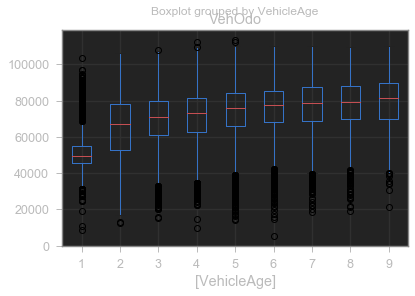

In [31]:
train0.boxplot(column=['VehOdo'], by=['VehicleAge'])

In [32]:
train['VehOdo'].corr(train['VehicleAge'])

0.3198051903524527

In [33]:
OdoxYear_mean=train['VehOdo'].groupby(train['VehicleAge']).mean()
OdoxYear_mean

VehicleAge
1    52820.393734
2    66049.374794
3    69742.211609
4    71837.490977
5    74442.756869
6    76395.725630
7    77646.563065
8    78368.743694
9    79347.013932
Name: VehOdo, dtype: float64

In [34]:
OdoxYear_std=train['VehOdo'].groupby(train['VehicleAge']).std()
OdoxYear_std

VehicleAge
1    12663.317149
2    14858.785678
3    13329.472629
4    13383.165226
5    13454.143691
6    13285.738314
7    13926.526438
8    14147.645143
9    15612.771207
Name: VehOdo, dtype: float64

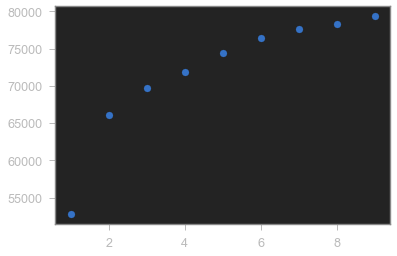

In [35]:
plt.scatter(OdoxYear_mean.keys(), OdoxYear_mean)

In [36]:
OdoxYear_mediana=train['VehOdo'].groupby(train['VehicleAge']).median()
OdoxYear_mediana

VehicleAge
1    49529.5
2    67030.5
3    71153.5
4    73194.0
5    75967.0
6    77984.0
7    79504.0
8    80151.0
9    81418.5
Name: VehOdo, dtype: float64

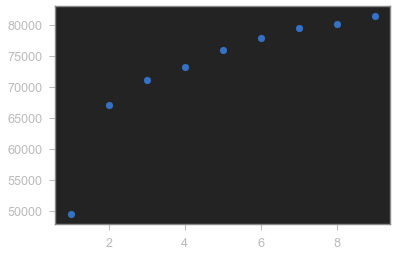

In [37]:
plt.scatter(OdoxYear_mediana.keys(), OdoxYear_mediana)

In [38]:
df=pd.DataFrame(columns=['Year','0','1','2'])
Year_list=list()
list0=list()
list1=list()
list2=list()
for i in range(1,len(train['VehicleAge'].unique())+1):
    train_Age=train[train['VehicleAge']==i]
    Q3 = train_Age['VehOdo'].describe()['75%']
    Q1 = train_Age['VehOdo'].describe()['25%']
    RI = Q3-Q1
    conditions=[train_Age['VehOdo']<Q1-RI,
                train_Age['VehOdo']>Q3+0.6*RI]
    choices=['Low', 'High']
    train_Age['OutOdo']=np.select(conditions, choices, default='Medium')
    cross_odo=pd.crosstab(train_Age['OutOdo'],train_Age['IsBadBuy'])
    cross_odo_p = cross_odo.div(cross_odo.sum(1).astype(float), axis=0)
    #print(i)
    #print(cross_odo_p)
    #print()
    Year_list.append(i)
    list0.append(cross_odo_p[1]['Low'])
    list1.append(cross_odo_p[1]['Medium'])
    list2.append(cross_odo_p[1]['High'])


dati={'Year':Year_list,'Low':list0,'Medium':list1,'High':list2}
df=pd.DataFrame(data=dati, columns=['Year','Low','Medium','High'])


C:\Users\Gianl\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
df

,Year,Low,Medium,High
0,1,0.115942,0.039770,0.034014
1,2,0.139535,0.063547,0.036145
2,3,0.104536,0.080602,0.096629
3,4,0.083485,0.110558,0.107203
4,5,0.098921,0.146753,0.188797
5,6,0.144000,0.179068,0.255663
6,7,0.107623,0.219676,0.310680
7,8,0.213740,0.271739,0.292308
8,9,0.243902,0.319859,0.277778


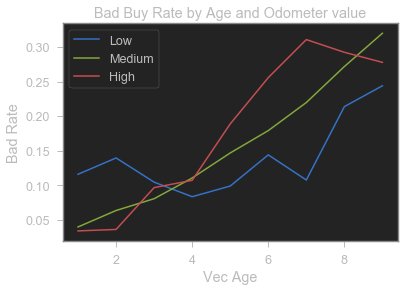

In [40]:
fig,ax = plt.subplots()

for col in df.columns[1:]:
    ax.plot(df['Year'],df[col], label=col)

ax.set_title('Bad Buy Rate by Age and Odometer value')
ax.set_xlabel("Vec Age")
ax.set_ylabel("Bad Rate")
plt.legend()

Esplorata, possibile relazione fra valore odometro ed età veicolo.

In [41]:
train['OdoxYear_mean']=train['VehicleAge'].map(OdoxYear_mean)
train['OdoxYear_std']=train['VehicleAge'].map(OdoxYear_std)

In [42]:
train['VehOdo_Standard']=(train['VehOdo']-train['OdoxYear_mean'])/train['OdoxYear_std']

In [43]:
train.drop(['OdoxYear_mean','OdoxYear_std'], axis=1, inplace=True)

codice che può tornare utile:

d=dict()
i=0
den=0
for key, value in a.items():
    i+=1
    if i>2:
        den=0
        i=1
    #print(value)
    den+=value
    perc=value/den
    if i==2:
        #print(i)
        #print('num:',value)
        #print('den:',den)
        #print('perc:',perc)
        #print()
        #print()
        d[key[0]]=perc
    #else:
        #print(i, 'no')
d   

### MMR Variables

Creiamo una variabile che sintetizzi l'informazione delle 4 variabili MMR.

In [44]:
train['AverageMMR']=(train['MMRAcquisitionAuctionAveragePrice']+train['MMRAcquisitionAuctionCleanPrice']+train['MMRAcquisitionRetailAveragePrice']+train['MMRAcquisitonRetailCleanPrice'])/4
train.drop(['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice'], axis=1, inplace=True)

In [45]:
train['AverageMMR'].corr(train['VehBCost'])

0.7816857432762062

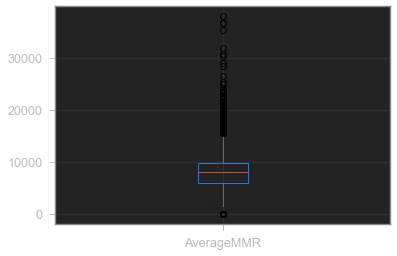

In [46]:
train[['AverageMMR']].boxplot()

In [47]:
Q3=train['AverageMMR'].quantile(q=0.75)
Q1=train['AverageMMR'].quantile(q=0.25)
RI=Q3-Q1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256D81C3D08>,
      dtype=object)

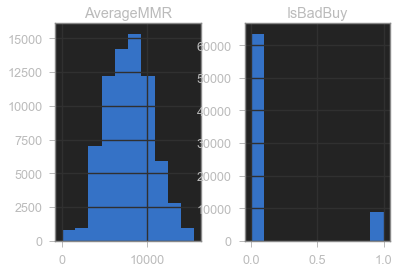

In [48]:
mmr_cutted=train[['AverageMMR','IsBadBuy']][train['AverageMMR']<Q3+1.5*RI]
mmr_cutted.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256D82E2708>,
      dtype=object)

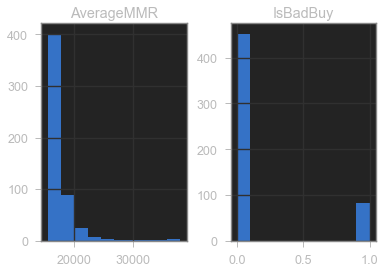

In [49]:
mmr_up=train[['AverageMMR','IsBadBuy']][train['AverageMMR']>=Q3+1.5*RI]
mmr_up.hist()

In [50]:
a=mmr_cutted['IsBadBuy'].groupby(pd.cut(mmr_cutted['AverageMMR'], 10)).value_counts()
a

AverageMMR             IsBadBuy
(-15.598, 1559.825]    0             715
                       1             115
(1559.825, 3119.65]    0             677
                       1             241
(3119.65, 4679.475]    0            5574
                       1            1435
(4679.475, 6239.3]     0           10250
                       1            1976
(6239.3, 7799.125]     0           12467
                       1            1734
(7799.125, 9358.95]    0           13860
                       1            1485
(9358.95, 10918.775]   0           11193
                       1            1047
(10918.775, 12478.6]   0            5407
                       1             523
(12478.6, 14038.425]   0            2533
                       1             241
(14038.425, 15598.25]  0             879
                       1              96
Name: IsBadBuy, dtype: int64

Text(0, 0.5, 'Bad Buy Rate')

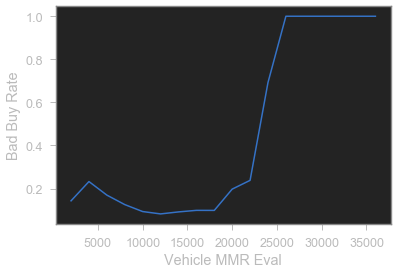

In [51]:
BadBuyPerc=list()
soglie=[i for i in range(2000,int(max(train['AverageMMR'])),2000)]
soglie_max=[i for i in range(2000,int(max(train['AverageMMR'])),2000)]
soglie_min=[i for i in range(0,int(max(train['AverageMMR']))-2000,2000)]
for soglia_min, soglia_max in zip(soglie_min, soglie_max):
    cost_up = train[['AverageMMR','IsBadBuy']][train['AverageMMR'].between(soglia_min,soglia_max)]
    sc = cost_up['IsBadBuy'].value_counts()/len(cost_up['IsBadBuy'])
    try:
        if sc[1]:
            BadBuyPerc.append(sc[1])
        else:
            soglie.remove(soglia_max)
            continue
    except:
        soglie.remove(soglia_max)
plt.plot(soglie, BadBuyPerc)
plt.xlabel('Vehicle MMR Eval')
plt.ylabel('Bad Buy Rate')

In [52]:
train['AverageMMR'].corr(train['VehicleAge'])

-0.4978648097458179

### Top Three / Make

In [53]:
cross_name=pd.crosstab(train['TopThreeAmericanName'],train['IsBadBuy'])
cross_name_p = cross_name.div(cross_name.sum(1).astype(float), axis=0)
cross_name_p

IsBadBuy,0,1
TopThreeAmericanName,,
CHRYSLER,0.883557,0.116443
FORD,0.843605,0.156395
GM,0.891922,0.108078
OTHER,0.867040,0.132960


Non informativo

In [54]:
train.drop('TopThreeAmericanName', axis=1, inplace=True)

In [55]:
count=train['IsBadBuy'].groupby(train['Make']).count()

In [56]:
cross_name=pd.crosstab(train['Make'],train['IsBadBuy'])
cross_name_p = cross_name.div(cross_name.sum(1).astype(float), axis=0)
cross_name_p['count']=cross_name[0].keys().map(count)
cross_name_p.sort_values(by=['count'], ascending=True)

#SUBARU, LEXUS, ACURA, INFINITI = OTHER JAPANESE
#TOYOTA SCION, SCION, TOYOTA = TOYOTA
#PLYMOUTH, MINI = BRITISH
#HUMMER, GMC, = GMC

IsBadBuy,0,1,count
Make,,,
TOYOTA SCION,1.000000,0.000000,1
HUMMER,1.000000,0.000000,1
PLYMOUTH,0.500000,0.500000,2
MINI,0.666667,0.333333,24
SUBARU,0.785714,0.214286,28
LEXUS,0.645161,0.354839,31
ACURA,0.727273,0.272727,33
CADILLAC,0.848485,0.151515,33
VOLVO,1.000000,0.000000,37


In [57]:
train['Make_new']=train['Make']
lista=['SUBARU', 'LEXUS', 'ACURA', 'INFINITI']
for x in lista:
    train['Make_new'][train['Make']==x]='OTHER JAPANESE'

lista=['TOYOTA SCION', 'SCION']
for x in lista:
    train['Make_new'][train['Make']==x]='TOYOTA'
    
lista=['PLYMOUTH', 'MINI']
for x in lista:
    train['Make_new'][train['Make']==x]='BRITISH'
    
lista=['HUMMER']
for x in lista:
    train['Make_new'][train['Make']==x]='GMC'

count=train['IsBadBuy'].groupby(train['Make_new']).count()    
cross_name=pd.crosstab(train['Make_new'],train['IsBadBuy'])
cross_name_p = cross_name.div(cross_name.sum(1).astype(float), axis=0)
cross_name_p['count']=cross_name[0].keys().map(count)
cross_name_p.sort_values(by=['count'], ascending=True)

C:\Users\Gianl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Gianl\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gianl\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Gianl\Anaconda3\lib\site-p

IsBadBuy,0,1,count
Make_new,,,
BRITISH,0.653846,0.346154,26
CADILLAC,0.848485,0.151515,33
VOLVO,1.000000,0.000000,37
LINCOLN,0.701031,0.298969,97
OTHER JAPANESE,0.701493,0.298507,134
VOLKSWAGEN,0.858209,0.141791,134
ISUZU,0.932836,0.067164,134
OLDSMOBILE,0.798354,0.201646,243
HONDA,0.891348,0.108652,497


### Transmission

In [58]:
cross_t=pd.crosstab(train['Transmission'],train['IsBadBuy'])
cross_t_p = cross_t.div(cross_t.sum(1).astype(float), axis=0)
cross_t_p

IsBadBuy,0,1
Transmission,,
AUTO,0.876759,0.123241
MANUAL,0.883929,0.116071


si può scartare. 

In [59]:
train.drop('Transmission', axis=1, inplace=True)

### WheelType

In [60]:
cross_w=pd.crosstab(train['WheelType'],train['IsBadBuy'])
cross_w_p = cross_w.div(cross_w.sum(1).astype(float), axis=0)
cross_w_p

IsBadBuy,0,1
WheelType,,
Alloy,0.862674,0.137326
Covers,0.892877,0.107123
Special,0.868874,0.131126


### Auction

In [61]:
cross_a=pd.crosstab(train['Auction'],train['IsBadBuy'])
cross_a_p = cross_a.div(cross_a.sum(1).astype(float), axis=0)
cross_a

IsBadBuy,0,1
Auction,,
ADESA,12246,2193
MANHEIM,36328,4715
OTHER,15433,2068


In [62]:
cross_a_p

IsBadBuy,0,1
Auction,,
ADESA,0.848120,0.151880
MANHEIM,0.885120,0.114880
OTHER,0.881835,0.118165


In [63]:
Mapping_Auction = dict()
for e in train['Auction'].unique():
    if e == 'ADESA':
        Mapping_Auction[e] = e
    else:
        Mapping_Auction[e] = 'OTHER'
Mapping_Auction

{'ADESA': 'ADESA', 'OTHER': 'OTHER', 'MANHEIM': 'OTHER'}

In [64]:
train['Auction']=train['Auction'].map(Mapping_Auction)
cross = pd.crosstab( train.Auction, train.IsBadBuy)
cross_p = cross.div(cross.sum(1).astype(float), axis=0)
cross_p

IsBadBuy,0,1
Auction,,
ADESA,0.848120,0.151880
OTHER,0.884138,0.115862


In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
label_encoders = dict()
column2encode = ['Auction']

for col in column2encode:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le
cross = pd.crosstab( train.Auction, train.IsBadBuy)
cross_p = cross.div(cross.sum(1).astype(float), axis=0)
cross_p

IsBadBuy,0,1
Auction,,
0,0.848120,0.151880
1,0.884138,0.115862


### VNST & VNZIP1

In [67]:
train['VNZIP1'] = train['VNZIP1'].astype('category')

In [68]:
train['VNST'].describe()

count     72983
unique       37
top          TX
freq      13596
Name: VNST, dtype: object

In [69]:
count=train['IsBadBuy'].groupby(train['VNST']).count()    
cross_v=pd.crosstab(train['VNST'],train['IsBadBuy'])
cross_v_p = cross_v.div(cross_v.sum(1).astype(float), axis=0)
cross_v_p['count']=cross_v[0].keys().map(count)
cross_v_p.sort_values(by=['count'], ascending=True)

IsBadBuy,0,1,count
VNST,,,
NY,1.000000,0.000000,6
MI,0.928571,0.071429,14
MA,0.866667,0.133333,15
NE,0.961538,0.038462,26
MN,0.967742,0.032258,62
AR,0.771429,0.228571,70
NH,0.907216,0.092784,97
WA,0.941176,0.058824,136
ID,0.903061,0.096939,196


In [70]:
train['VNST_new']=train['VNST']
train['VNST_new'][(train["VNST"] == "NY") | (train["VNST"] == "MI") | (train["VNST"] == "MA") | (train["VNST"] == "NE")]='OTHER'
train['VNST_new'].unique()

C:\Users\Gianl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['FL', 'VA', 'IA', 'AR', 'MN', 'TN', 'PA', 'OH', 'AL', 'OTHER',
       'TX', 'IL', 'AZ', 'GA', 'NC', 'MD', 'CA', 'UT', 'OR', 'SC', 'CO',
       'ID', 'NV', 'WV', 'MS', 'OK', 'NM', 'LA', 'IN', 'MO', 'WA', 'NH',
       'NJ', 'KY'], dtype=object)

In [71]:
train['VNZIP1']=train['VNZIP1'].astype('category')
train['VNZIP1'].describe()

count     72983
unique      153
top       32824
freq       3699
Name: VNZIP1, dtype: int64

In [72]:
count=train['IsBadBuy'].groupby(train['VNZIP1']).count()    
cross_v=pd.crosstab(train['VNZIP1'],train['IsBadBuy'])
cross_v_p = cross_v.div(cross_v.sum(1).astype(float), axis=0)
cross_v_p['count']=cross_v[0].keys().map(count)
cross_v_p.sort_values(by=['count'], ascending=True)

IsBadBuy,0,1,count
VNZIP1,,,
80112,1.000000,0.000000,1
25071,0.000000,1.000000,1
76101,1.000000,0.000000,1
85248,1.000000,0.000000,1
85260,0.000000,1.000000,1
...,...,...,...
80022,0.880076,0.119924,2118
74135,0.940112,0.059888,2321
75236,0.861785,0.138215,2431


Troppo frammentato. Lo buttiamo via.

### IsOnlineSale

In [73]:
train['IsOnlineSale'].describe()

count    72983.000000
mean         0.025280
std          0.156975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: IsOnlineSale, dtype: float64

In [74]:
count=train['IsBadBuy'].groupby(train['IsOnlineSale']).count()    
cross_v=pd.crosstab(train['IsOnlineSale'],train['IsBadBuy'])
cross_v_p = cross_v.div(cross_v.sum(1).astype(float), axis=0)
cross_v_p['count']=cross_v[0].keys().map(count)
cross_v_p.sort_values(by=['count'], ascending=True)

IsBadBuy,0,1,count
IsOnlineSale,,,
1,0.884553,0.115447,1845
0,0.876817,0.123183,71138


Variabile non esplicativa. Buttare via.

In [75]:
train.drop('IsOnlineSale', axis=1, inplace=True)

### WarrantyCost

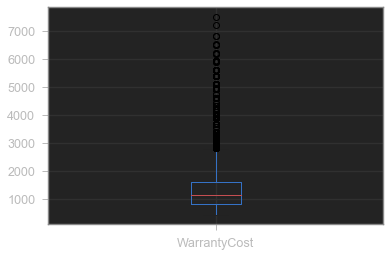

In [76]:
train[['WarrantyCost']].boxplot()

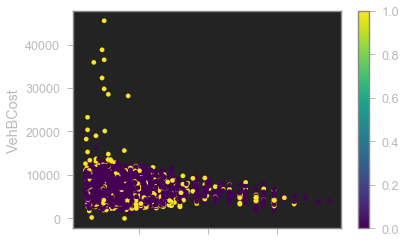

In [77]:
train.plot.scatter('WarrantyCost', 'VehBCost', c=train['IsBadBuy'].values, colormap='viridis')

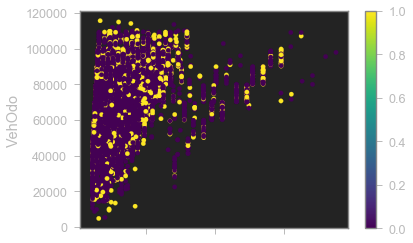

In [78]:
train.plot.scatter('WarrantyCost', 'VehOdo', c=train['IsBadBuy'].values, colormap='viridis')

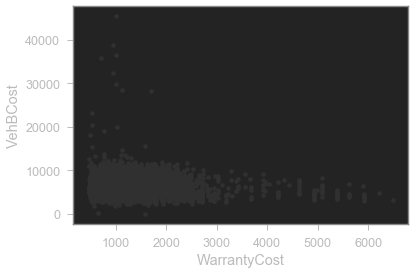

In [79]:
train1=train[['WarrantyCost','VehBCost']][train['IsBadBuy']==1]
train1.plot.scatter('WarrantyCost', 'VehBCost')

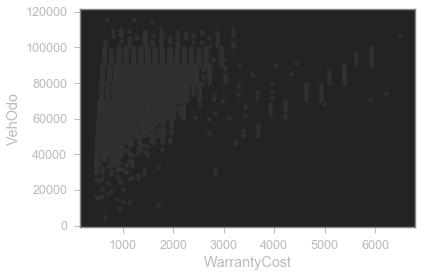

In [80]:
train1=train[['WarrantyCost','VehOdo']][train['IsBadBuy']==1]
train1.plot.scatter('WarrantyCost', 'VehOdo')

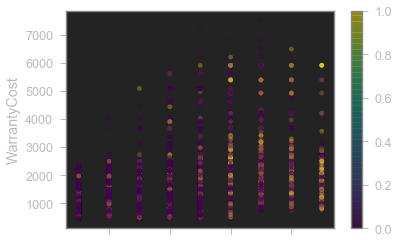

In [81]:
train.plot.scatter('VehicleAge','WarrantyCost', c=train['IsBadBuy'].values, colormap='viridis', alpha=0.3)

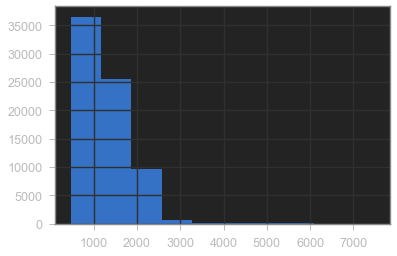

In [82]:
train['WarrantyCost'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256DA312CC8>,
      dtype=object)

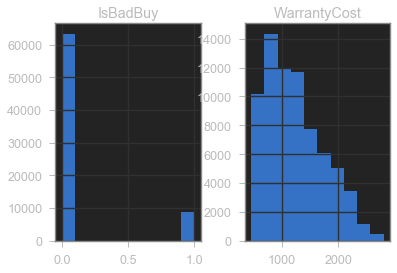

In [83]:
Q3=train['WarrantyCost'].quantile(q=0.75)
Q1=train['WarrantyCost'].quantile(q=0.25)
RI=Q3-Q1
mmr_cut=train[['WarrantyCost','IsBadBuy']][train['WarrantyCost']<Q3+1.5*RI]
mmr_cut.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256DA41F308>,
      dtype=object)

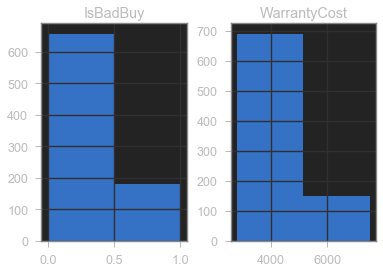

In [84]:
mmr_up=train[['WarrantyCost','IsBadBuy']][train['WarrantyCost']>=Q3+1.5*RI]
mmr_up.hist(bins=2)

In [85]:
#pd.cut(train['WarrantyCost'], 10).value_counts().sort_index()
train_cut=train[['WarrantyCost','IsBadBuy']][train['WarrantyCost']<Q3+1.5*RI]
a=train_cut['IsBadBuy'].groupby(pd.cut(train_cut['WarrantyCost'], 10)).value_counts()
d=dict()
i=0
den=0
for key, value in a.items():
    i+=1
    if i>2:
        den=0
        i=1
    #print(value)
    den+=value
    perc=value/den
    if i==2:
        #print(i)
        #print('num:',value)
        #print('den:',den)
        #print('perc:',perc)
        #print()
        #print()
        d[key[0]]=perc
    #else:
        #print(i, 'no')
d   

{Interval(459.663, 695.7, closed='right'): 0.10266758539226302,
 Interval(695.7, 929.4, closed='right'): 0.10867140666387844,
 Interval(929.4, 1163.1, closed='right'): 0.12242515219748144,
 Interval(1163.1, 1396.8, closed='right'): 0.12441133658703656,
 Interval(1396.8, 1630.5, closed='right'): 0.1324835843955195,
 Interval(1630.5, 1864.2, closed='right'): 0.13081491257010888,
 Interval(1864.2, 2097.9, closed='right'): 0.13098535813217255,
 Interval(2097.9, 2331.6, closed='right'): 0.12474849094567404,
 Interval(2331.6, 2565.3, closed='right'): 0.192274678111588,
 Interval(2565.3, 2799.0, closed='right'): 0.29345372460496616}

In [86]:
train_cut=train[['WarrantyCost','IsBadBuy']][train['WarrantyCost']>=Q3+1.5*RI]
a=train_cut['IsBadBuy'].groupby(pd.cut(train_cut['WarrantyCost'], 1)).value_counts()
d=dict()
i=0
den=0
for key, value in a.items():
    i+=1
    if i>2:
        den=0
        i=1
    #print(value)
    den+=value
    perc=value/den
    if i==2:
        #print(i)
        #print('num:',value)
        #print('den:',den)
        #print('perc:',perc)
        #print()
        #print()
        d[key[0]]=perc
    #else:
        #print(i, 'no')
d   

{Interval(2810.317, 7498.0, closed='right'): 0.2159904534606205}

## Size

In [87]:
train['Size'].unique()

array(['MEDIUM', 'LARGE TRUCK', 'COMPACT', 'LARGE', 'VAN', 'MEDIUM SUV',
       'LARGE SUV', 'SPECIALTY', 'SPORTS', 'CROSSOVER', 'SMALL SUV',
       'SMALL TRUCK'], dtype=object)

In [88]:
size_class = {'COMPACT': 0, 'MEDIUM': 1, 'LARGE': 2, 'SPORTS': 3, 'SPECIALTY': 3, 'VAN': 4, 'SMALL SUV': 5,
             'CROSSOVER': 5, 'MEDIUM SUV': 6, 'LARGE SUV': 7, 'SMALL TRUCK': 8, 'LARGE TRUCK': 9}

In [89]:
train['Size_class'] = train['Size'].map(size_class)

In [90]:
train['Size_class'].isnull().sum()

0

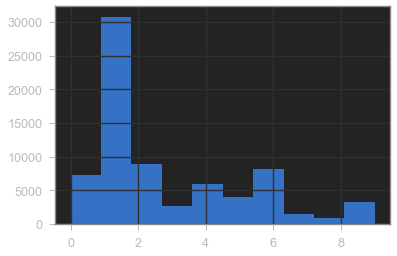

In [91]:
train['Size_class'].hist()

## Model

In [92]:
print(len(train['Model'].unique()))
c=np.unique(train['Model'], return_counts=True)
for a,b in zip(c[0],c[1]):
    print(a,':',b)

1063
1500 RAM PICKUP 2WD : 1101
1500 RAM PICKUP 4WD : 57
1500 SIERRA PICKUP 2 : 132
1500 SIERRA PICKUP 4 : 4
1500 SILVERADO PICKU : 596
1500HD SIERRA PICKUP : 1
1500HD SILVERADO PIC : 8
2500 RAM PICKUP 2WD : 13
2500 RAM PICKUP 4WD : 3
2500 SILVERADO PICKU : 2
2500HD SIERRA PICKUP : 1
2500HD SILVERADO PIC : 10
3.2 CL : 1
3.2 CL 3.2L V 6 NA S : 3
3.2 TL : 8
3.2 TL 3.2L V6 EFI : 5
3.2 TL 3.2L V6 FI DO : 2
300 : 237
300 2.7L V6 MPI : 174
300 3.5L / 6.0L V12 : 10
300 3.5L V6 MPI : 22
300 3.5L V6 MPI / SM : 26
300C : 5
300C 5.7L V8 SFI : 1
300C 5.7L V8 SFI / S : 1
300M : 11
300M 3.5L V6 MPI : 8
300M 3.5L V6 MPI HO : 2
350Z : 6
350Z 3.5L V6 MPI : 1
350Z MFI V6 3.5L DOH : 1
4 RUNNER 2WD V6 : 2
4 RUNNER 2WD V6 3.4L : 3
4 RUNNER 2WD V8 : 3
4 RUNNER 2WD V8 4.7L : 1
4 RUNNER 4WD V6 : 1
4 RUNNER 4WD V6 3.4L : 1
626 4C : 4
626 4C 2.0L I-4 EFI : 5
626 4C 2.0L I4 EFI : 1
626 V6 : 1
626 V6 2.5L V6 EFI D : 3
ACCENT : 160
ACCENT 1.5L I-4 EFI : 5
ACCENT 1.6L I-4 MPI : 5
ACCENT 1.6L I4 MPI : 89
ACCENT MFI 

MARINER 2WD 4C : 13
MARINER 2WD 4C 2.3L : 4
MARINER 2WD V6 : 44
MARINER 2WD V6 3.0L : 17
MARINER 4WD 4C : 2
MARINER 4WD 4C 2.3L : 1
MARINER 4WD V6 : 38
MARINER 4WD V6 3.0L : 44
MATRIX 2WD : 106
MATRIX 2WD 1.8L I-4 : 9
MATRIX 2WD Multiple : 4
MATRIX 2WD Unspecifi : 1
MATRIX AWD : 1
MAXIMA : 91
MAXIMA 3.0L V6 EFI D : 4
MAXIMA 3.5L V6 MPI : 44
MAXIMA 3.5L V6 MPI / : 9
MAXIMA MFI V6 3.5L D : 19
MAZDA3 : 202
MAZDA3 2.0L I-4 MPI : 3
MAZDA3 2.0L I4 MFI / : 3
MAZDA3 2.0L I4 MPI : 9
MAZDA3 2.3L I-4 MPI : 5
MAZDA3 2.3L I4 MFI / : 1
MAZDA3 2.3L I4 MPI : 9
MAZDA5 : 33
MAZDA5 2.3L I4 MFI / : 5
MAZDA6 : 277
MAZDA6 2.3L I-4 MPI : 1
MAZDA6 2.3L I4 MFI / : 29
MAZDA6 2.3L I4 MPI : 41
MAZDA6 3.0L V6 MFI / : 8
MAZDA6 3.0L V6 MPI : 7
MAZDA6 3.0L V6 MPI D : 6
MDX 4WD : 3
MDX 4WD 3.5L V6 EFI : 1
MDX 4WD 3.5L V6 SOHC : 1
MIATA MX-5 : 7
MILAN 4C : 81
MILAN 4C 2.3L I4 EFI : 8
MILAN V6 : 27
MILAN V6 3.0L V6 EFI : 4
MIRAGE 1.8L I-4 MPI : 1
MONTANA : 47
MONTANA 3.4L V 6 NA : 2
MONTANA 3.4L V6 EFI : 41
MONTANA 3.4L

In [93]:
Mapping_Model = dict()
for e in train['Model'].unique():
    Mapping_Model[e]=' '.join(e.split(' ')[:2])
Mapping_Model

{'MAZDA3': 'MAZDA3',
 '1500 RAM PICKUP 2WD': '1500 RAM',
 'STRATUS V6': 'STRATUS V6',
 'NEON': 'NEON',
 'FOCUS': 'FOCUS',
 'GALANT 4C': 'GALANT 4C',
 'SPECTRA': 'SPECTRA',
 'TAURUS': 'TAURUS',
 'FIVE HUNDRED': 'FIVE HUNDRED',
 '1500 SIERRA PICKUP 2': '1500 SIERRA',
 'F150 PICKUP 2WD V6': 'F150 PICKUP',
 'CARAVAN GRAND FWD V6': 'CARAVAN GRAND',
 'ALTIMA': 'ALTIMA',
 'CAVALIER 4C': 'CAVALIER 4C',
 'TRAILBLAZER 2WD 6C': 'TRAILBLAZER 2WD',
 'VUE 2WD 4C': 'VUE 2WD',
 'IMPALA': 'IMPALA',
 'ENVOY XL 2WD 6C': 'ENVOY XL',
 'VOYAGER FWD V6': 'VOYAGER FWD',
 'MONTE CARLO': 'MONTE CARLO',
 'VENTURE FWD V6': 'VENTURE FWD',
 'HHR': 'HHR',
 'SABLE': 'SABLE',
 'ENVOY XL 4WD 6C': 'ENVOY XL',
 'DURANGO 4WD V8': 'DURANGO 4WD',
 'SUBURBAN 1500 2WD': 'SUBURBAN 1500',
 'EXPLORER 2WD V6': 'EXPLORER 2WD',
 '300': '300',
 'MUSTANG V6': 'MUSTANG V6',
 'AVALANCHE 1500 2WD V': 'AVALANCHE 1500',
 'WINDSTAR FWD V6': 'WINDSTAR FWD',
 'FREESTAR FWD V6': 'FREESTAR FWD',
 'SONATA V6': 'SONATA V6',
 'CALIBER': 'CALIBER'

In [94]:
train['Model_new']=train['Model'].map(Mapping_Model)
print(len(train['Model_new'].unique()))
c=np.unique(train['Model_new'], return_counts=True)
for a,b in zip(c[0],c[1]):
    print(a,':',b)

488
1500 RAM : 1158
1500 SIERRA : 136
1500 SILVERADO : 596
1500HD SIERRA : 1
1500HD SILVERADO : 8
2500 RAM : 16
2500 SILVERADO : 2
2500HD SIERRA : 1
2500HD SILVERADO : 10
3.2 CL : 4
3.2 TL : 15
300 : 237
300 2.7L : 174
300 3.5L : 58
300C : 5
300C 5.7L : 2
300M : 11
300M 3.5L : 10
350Z : 6
350Z 3.5L : 1
350Z MFI : 1
4 RUNNER : 11
626 4C : 10
626 V6 : 4
ACCENT : 160
ACCENT 1.5L : 5
ACCENT 1.6L : 94
ACCENT MFI : 8
ACCORD 4C : 251
ACCORD V6 : 64
AERIO : 22
AERIO 2.0L : 5
AERIO 2.3L : 19
AERIO AWD : 2
ALERO 4C : 161
ALERO V6 : 60
ALTIMA : 681
ALTIMA 2.4L : 3
ALTIMA 2.5L : 218
ALTIMA 3.5L : 9
ALTIMA MFI : 10
ALTIMA Multiple : 1
AMANTI : 23
AMANTI 3.5L : 18
ARMADA 2WD : 2
ARMADA 4WD : 1
ASCENDER 2WD : 112
ASCENDER 4WD : 7
ASPEN 2WD : 4
AURA : 56
AURA 3.5L : 6
AURA 4C : 14
AURA V6 : 78
AVALANCHE 1500 : 124
AVALANCHE 2500 : 1
AVALON : 14
AVALON 3.0L : 2
AVALON 3.5L : 1
AVENGER : 3
AVENGER 4C : 1063
AVENGER V6 : 76
AVEO : 384
AVEO 1.6L : 185
AVIATOR 2WD : 15
AVIATOR AWD : 2
AXIOM 2WD : 6
AXIOM 4

In [95]:
Mapping_Name = dict()
for e in train['Model_new'].unique():
    Mapping_Name[e]=e.split(' ')[0]
train['Model_Name']=train['Model_new'].map(Mapping_Name)
print(len(train['Model_Name'].unique()))

247


In [96]:
Mapping_Property = dict()
for e in train['Model_new'].unique():
    try:
        Mapping_Property[e]=e.split(' ')[1]
    except:
        Mapping_Property[e]='None'

train['Model_Property']=train['Model_new'].map(Mapping_Property)
print(len(train['Model_Property'].unique()))

79


In [97]:
print(len(train['Model_Name'].unique()))
c=np.unique(train['Model_Name'], return_counts=True)
for a,b in zip(c[0],c[1]):
    print(a,':',b)

247
1500 : 1890
1500HD : 9
2500 : 18
2500HD : 11
3.2 : 19
300 : 469
300C : 7
300M : 21
350Z : 8
4 : 11
626 : 14
ACCENT : 267
ACCORD : 315
AERIO : 48
ALERO : 221
ALTIMA : 922
AMANTI : 41
ARMADA : 3
ASCENDER : 119
ASPEN : 4
AURA : 154
AVALANCHE : 125
AVALON : 17
AVENGER : 1142
AVEO : 569
AVIATOR : 17
AXIOM : 7
AZERA : 8
B2300 : 11
B3000 : 13
BEETLE : 58
BONNEVILLE : 81
BRAVADA : 8
CALIBER : 1864
CAMARO : 14
CAMRY : 609
CANYON : 17
CARAVAN : 2128
CAVALIER : 535
CELICA : 6
CENTURY : 184
CHARGER : 683
CHEROKEE : 8
CIVIC : 103
COBALT : 1578
COLORADO : 137
COMMANDER : 102
COMPASS : 91
CONCORDE : 41
CONTINENTAL : 11
COOPER : 24
COROLLA : 194
COUPE : 13
CR-V : 18
CROSSFIRE : 2
CROWN : 11
CTS : 22
CX-7 : 3
DAKOTA : 268
DURANGO : 1699
ECHO : 6
ECLIPSE : 79
EDGE : 14
ELANTRA : 576
ELEMENT : 40
ENDEAVOR : 123
ENTOURAGE : 2
ENVOY : 368
EQUINOX : 737
ES300 : 12
ES330 : 4
ESCALADE : 1
ESCAPE : 698
ESCORT : 16
EXCURSION : 1
EXPEDITION : 726
EXPLORER : 812
F150 : 888
F250 : 7
FIREBIRD : 7
FIT : 1
FIVE :

In [98]:
print(len(train['Model_Property'].unique()))
c=np.unique(train['Model_Property'], return_counts=True)
for a,b in zip(c[0],c[1]):
    print(a,':',b)

79
& : 870
1.5L : 42
1.6L : 351
1.7L : 9
1.8L : 177
1.9L : 8
1500 : 262
2.0L : 2472
2.2L : 1077
2.3L : 172
2.4L : 72
2.5L : 235
2.7L : 285
2500 : 3
2WD : 6520
3.0L : 1567
3.2L : 5
3.4L : 575
3.5L : 1118
3.6L : 6
3.8L : 202
3.9L : 38
300 : 5
350 : 17
4-FI-2.0L : 2
4.2L : 19
4.5L : 2
4.6L : 4
4C : 9564
4WD : 2771
5 : 49
5.3L : 1
5.7L : 2
5C : 69
6-230/250-1V : 2
6C : 8
AM : 461
AVENUE : 15
AWD : 743
CAR : 33
CARLO : 341
CHEROKEE : 565
CL : 4
CRUISER : 3729
EI : 1
EXT : 360
FE : 203
FWD : 5383
GRAND : 1292
HUNDRED : 965
HYBRID : 1
MARQUIS : 46
MAXX : 400
MFI : 128
MX-5 : 7
Multiple : 8
None : 14728
PICKUP : 1968
PRIX : 1819
RAM : 1174
RUNNER : 11
RWD : 15
S : 6
SABRE : 143
SE : 1
SERIES : 424
SIERRA : 138
SILVERADO : 616
SOLARA : 49
SPORT : 53
SPYDER : 1
TL : 15
V6 : 8300
V8 : 33
VICTORIA : 11
VITARA : 39
X : 37
XB : 4
XL : 132


In [99]:
cross=pd.crosstab(train['Model_Property'],train['IsBadBuy'])
cross_p = cross.div(cross.sum(1).astype(float), axis=0)
cross_p

IsBadBuy,0,1
Model_Property,,
&,0.896552,0.103448
1.5L,0.904762,0.095238
1.6L,0.837607,0.162393
1.7L,1.000000,0.000000
1.8L,0.881356,0.118644
...,...,...
VICTORIA,0.727273,0.272727
VITARA,0.743590,0.256410
X,0.945946,0.054054


## SubModel

In [100]:
def createBigrams(line):
    bigrams=[]
    words = line.lower().split(' ')
    for word in words:
        word='$'+word
        for i in range(len(word)-1):
            bigrams.append(word[i]+word[i+1])
    return bigrams

In [101]:
u = train['SubModel'].unique()
u

array(['4D SEDAN I', 'QUAD CAB 4.7L SLT', '4D SEDAN SXT FFV', '4D SEDAN',
       '2D COUPE ZX3', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE',
       '4D SEDAN SEL', 'REG CAB 4.3L', 'REG CAB 4.2L XL', 'MINIVAN 3.3L',
       'MINIVAN 3.8L', '2D COUPE', '4D SUV 4.2L', '4D CUV 2.2L',
       '4D UTILITY 4.2L SLE', '2D COUPE SS', 'PASSENGER 3.4L',
       '4D SUV 2.2L LS', '4D SEDAN LS PREMIUM', '4D SUV 5.7L SLT',
       'MINIVAN 3.8L SXT', '4D UTILITY 5.3L FFV LS', '2D SUV 4.0L SPORT',
       '4D SUV-PICKUP 5.3L', 'PASSENGER 3.8L LX', 'PASSENGER 3.9L LX',
       '4D WAGON SXT', '4D SEDAN 1.8', '4D SPORT TOURER',
       '4D SEDAN LS 3.5L FFV', 'QUAD CAB 5.7L', '4D SPORT UTILITY',
       '4D SEDAN CE', '4D SEDAN GT', 'QUAD CAB 4.7L', '4D SEDAN LEVEL 2',
       '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER', '4D SEDAN GLS',
       '4D SPORT UTILITY SPORT EDITION', '4D SEDAN GXP', '4D WAGON SPORT',
       '4D SUV', 'QUAD CAB 3.7L ST', '4D SUV 5.3L', '4D SEDAN LS',
       '4D SUV 4.6L XLT', '4D SUV 4.7L

In [102]:
bigram_list = list()
d = dict()
for i in range(len(u)):
            bigrams = createBigrams(u[i])
            bigram_list.append(bigrams)

In [103]:
for i in range(len(u)):
    lista=[]
    for j in range(len(u)):
        if i == j:
            continue
        else:
            count=0
            for bigram1 in bigram_list[i]:
                #print(i, bigram1)
                for bigram2 in bigram_list[j]:
                    #print(j, bigram2)
                    #print()
                    if bigram1 == bigram2:
                        #print('equal')
                        #print(bigram1, bigram2)
                        count += 1
                        #print()
                        #print('count:', count)
            if count > 7:
                lista.append(u[j])
                #print(lista)
    d[u[i]] = lista
    print(u[i], '->', d[u[i]])
    print()
#print(d)

4D SEDAN I -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN SES', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN LS SPORT', '4D SEDAN SE-R', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L SE', '4D SEDAN LIMITED AWD', '4D SEDAN SPECIAL', '4D SEDAN SE SVG', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN AWD SE', '4D SEDAN SE AWD', '4D SEDAN ZX4 ST', '4D SEDAN SEL AWD', '4D SEDAN AWD SEL', '4D SEDAN 2.5 S', '4D SEDAN 2.5 SL', '4D SEDAN SEL DURATEC', '4D SEDAN SS', '4D SEDAN LIMITED TURBO', '4D SEDAN SLE', '4D SEDAN SIGNATURE', '4D SEDAN SVT', '4D SEDAN SE2', '4D SEDAN TYPE S', '4D SEDAN SX', '4D SEDAN SL', '4D SEDAN 2.5 SE', '4D SEDAN SPORT', '4D SEDAN MAZDASPEED', '4D SEDAN TYPE S NAVIGATION', '4D SEDAN 3.5L SXT', '4D SEDAN ZX4 S', '4D SEDAN 3.5L AWD SXT', '4D SEDAN SIGNATURE LTD', '4D S

REG CAB 4.2L XL -> ['REG CAB 4.3L', 'REG CAB 4.2L STX', 'REG CAB 4.6L STX', 'REG CAB 2.2L FFV', 'CREW CAB 4.6L XLT', 'REG CAB 4.7L SLT', 'REG CAB 4.7L', 'REG CAB 4.6L XLT', 'REG CAB 4.8L LS', 'EXT CAB 4.2L XL', 'REG CAB 2.2L', 'REG CAB 4.8L', 'REG CAB 4.6L XL', 'REG CAB 5.4L XL', 'REG CAB 4.3L LS', 'REG CAB 4.3L SLE', 'REG CAB 4.7L FFV', 'REG CAB 4.0L', 'REG CAB 2.2L SL', 'REG CAB 4.2L W/T', 'REG CAB 4.0L XL', 'EXT CAB 4.2L XLT', 'REG CAB 5.4L XLT', 'REG CAB 2.2L FFV SL', 'REG CAB 4.0L EDGE', 'REG CAB 3.0L XL', 'REG CAB 4.2L XLT', 'REG CAB 4.6L W/T', 'REG CAB 4.3L SL', 'REG CAB 2.3L XLT', 'REG CAB 2.5L XLT', 'REG CAB 2.3L XL', 'REG CAB 4.8L SL', 'CREW CAB 4.6L KING RANCH', '4D EXT CAB 4.0L XL', 'REG CAB 3.0L XLT', 'REG CAB 4.8L SLE', 'REG CAB 4.7L ST', 'REG CAB 5.2L LARAMIE', 'REG CAB 4.3L W/T', '4D EXT CAB 4.0L XLT']

MINIVAN 3.3L -> ['MINIVAN 3.8L', 'MINIVAN 3.8L SXT', 'MINIVAN 3.3L LX', '4D MINIVAN EXT 3.4L GLS', 'MINIVAN 3.3L FFV SPORT', 'MINIVAN 3.3L SPORT', 'MINIVAN 3.3L SE', 'MI

4D UTILITY 5.3L FFV LS -> ['4D UTILITY 4.2L SLE', '4D SPORT UTILITY', '4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY EX', '4D SPORT UTILITY LS', '4D SPORT UTILITY I', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', '4D SPORT UTILITY LX', '4D SPORT UTILITY ES', '4D SUV 5.3L FFV LS', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D SUV 5.3L LS', '4D UTILITY 4.2L', '4D SPORT UTILITY 5 PASS', '4D SPORT UTILITY XLS', '4D UTILITY 5.3L SLE', '4D SPORT UTILITY LE', '4D SUV 5.3L FFV', '4D UTILITY 5.3L LS', '4D UTILITY XUV 4.2L SLE', '4D UTILITY 5.3L SLT', '4D SPORT UTILITY LIMITED FFV', '4D SPORT UTILITY XSPORT', '4D UTILITY 5.3L FFV', '4D UTILITY 4.8L SLE', '4D UTILITY 4.8L', '4D SPORT UTILITY 3.5L XLS', '4D SUV 4.0L FFV LIMITED', '4D UTILITY 4.8L SLT', '4D SPORT UTILITY DX', '4D UTILITY 6.0L DENALI', '4D UTILITY 5.3L', '4D SPORT UTILITY XL7', '4D SPORT UTILITY LIMITED', '4D SPORT UTILITY 3.5L XS', '4D SPORT UTILITY LEVEL 3', '4D SPORT UTILITY SL', '4D SPORT UTILITY EX AUTO', '4D UTILITY 

QUAD CAB 5.7L -> ['QUAD CAB 4.7L SLT', 'QUAD CAB 4.7L', 'QUAD CAB 3.7L ST', 'QUAD CAB 5.7L SLT', 'QUAD CAB 4.7L FFV BIG HORN', 'QUAD CAB 3.7L', 'QUAD CAB 4.7L SPORT', 'QUAD CAB 3.7L SLT', 'QUAD CAB 3.7L SPORT', 'QUAD CAB 5.7L BIG HORN', 'QUAD CAB 4.7L ST', 'QUAD CAB 5.9L SLT', 'QUAD CAB 5.9L SPORT', 'QUAD CAB 4.7L FFV SLT', 'QUAD CAB 4.7L FFV', 'QUAD CAB 4.7L LARAMIE', 'QUAD CAB 5.7L LARAMIE', 'QUAD CAB 5.9L', 'QUAD CAB 4.7L BIG HORN', 'QUAD CAB 3.7L SXT', 'QUAD CAB 4.7L SLT FFV', 'QUAD CAB 4.7L FFV LONESTAR', 'CREW CAB 5.7L LIMITED']

4D SPORT UTILITY -> ['4D UTILITY 4.2L SLE', '4D UTILITY 5.3L FFV LS', '4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY EX', '4D SUV SPORT', '4D SPORT UTILITY LS', '4D SPORT UTILITY I', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', '4D SEDAN LS SPORT', 'SPORT UTILITY', '4D SPORT UTILITY LX', '4D SPORT UTILITY ES', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D UTILITY 4.2L', '4D SPORT UTILITY 5 PASS', '4D SUV 4.0L SPORT TRAC', '4D SPORT UTILITY XLS

4D SUV 4.7L ADVENTURER -> ['4D SUV 4.2L', '4D SUV 5.7L SLT', '4D SUV 4.7L', '4D SUV 4.6L XLT', '4D SUV 4.7L ST', '4D SUV 4.2L LS', '4D SUV 3.7L', '4D SUV 4.6L XLS', '4D SUV 4.6L EDDIE BAUER', '4D SUV 4.7L SLT', '4D SUV 4.0L FFV XLT', '4D SUV RENEGADE', '4D SUV 4.0L FFV XLS', '4D SUV 3.7L SLT', '4D SUV 4.8L LS', '4D SUV 4.0L XLT', '4D SUV 5.7L LIMITED', '4D SUV 4.0L', '4D SUV 4.0L XLS', '4D SUV 4.8L', '4D SUV 4.2L LT', '4D SUV 4.0L SPORT TRAC', '4D SUV 4.7L SPORT', '4D SUV 3.7L SXT', '4D SUV 4.7L SXT', '4D SUV 5.7L', '4D SUV 4.7L FFV SXT', '4D UTILITY XUV 4.2L SLE', '4D SUV 4.6L', '4D PASSENGER 4.2L LIMITED', '4D SUV 3.0L PREMIER', '4D SUV 5.7L HEMI SLT', '4D SUV 4.0L EDDIE BAUER', '4D SUV 2.3L CONVENIENCE', '4D SUV 4.7L SL', '4D SUV 5.7L HEMI LIMITED', '4D SUV 4.7L LIMITED', '4D SUV 4.0L FFV LIMITED', '4D SUV 4.7L FFV SLT', '4D SEDAN SIGNATURE', '4D PASSENGER 4.2L SEL', '4D SUV 4.0L FFV EDDIE BAUER', '4D SUV 5.7L HEMI', '4D SUV 4.6L LIMITED', '4D SUV 4.0L PREMIER', '4D SUV 3.7L ST', '4

QUAD CAB 3.7L ST -> ['QUAD CAB 4.7L SLT', 'QUAD CAB 5.7L', 'QUAD CAB 4.7L', 'QUAD CAB 5.7L SLT', 'QUAD CAB 4.7L FFV BIG HORN', 'QUAD CAB 3.7L', 'QUAD CAB 4.7L SPORT', 'QUAD CAB 3.9L SLT', 'QUAD CAB 3.7L SLT', 'QUAD CAB 3.7L SPORT', 'QUAD CAB 5.7L BIG HORN', 'REG CAB 3.7L ST', 'REG CAB 3.7L SXT', 'QUAD CAB 4.7L ST', 'QUAD CAB 5.9L SLT', 'QUAD CAB 5.9L SPORT', 'EXT CAB 3.7L SLT', 'QUAD CAB 4.7L FFV SLT', 'EXT CAB 3.7L SXT', 'QUAD CAB 3.9L SPORT', 'DOUBLE CAB DURO CROSS 3.7L', 'QUAD CAB 4.7L FFV', 'QUAD CAB 4.7L LARAMIE', 'QUAD CAB 5.7L LARAMIE', 'QUAD CAB 4.7L BIG HORN', 'QUAD CAB 3.7L SXT', 'QUAD CAB 4.7L SLT FFV', 'QUAD CAB 4.7L FFV LONESTAR', 'EXT CAB LS SPECIAL 3.7L', 'REG CAB 3.7L SLT', 'DOUBLE CAB LS SPECIAL 3.7L', 'EXT CAB DURO CROSS 3.7L', 'EXT CAB 3.7L ST', 'REG CAB 3.7L STAMPEDE']

4D SUV 5.3L -> ['4D SUV 5.7L SLT', '4D SUV-PICKUP 5.3L', '4D SUV 5.9L SLT', '4D SUV 5.3L FFV LS', '4D SUV 5.3L LS', '4D SUV 5.3L FFV', '4D SUV 5.7L HEMI SLT', '4D SUV 5.3L LT', '4D SUV-PICKUP 5.3L Z6

4D SUV 4.2L LS -> ['4D SUV 4.2L', '4D UTILITY 4.2L SLE', '4D SUV 2.2L LS', '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER', '4D SUV 4.6L XLT', '4D SUV 4.7L ST', '4D SUV 2.2L LT', '4D SUV 4.6L XLS', '4D SUV LS', '4D SUV 4.6L EDDIE BAUER', '4D SUV 4.7L SLT', '4D SUV 4.0L FFV XLT', '4D SUV 4.0L FFV XLS', '4D SUV 4.8L LS', '4D SUV 4.0L XLT', '4D SUV 5.3L FFV LS', '4D SUV 5.3L LS', '4D UTILITY 4.2L', '4D SUV 4.0L', '4D SUV 4.0L XLS', '4D SUV 4.8L', '4D SUV 2.2L 1LT', '4D SUV 4.2L LT', '4D SUV 4.0L SPORT TRAC', '2D SUV 4.0L SPORT XLS', '4D SUV 4.7L SPORT', '4D SUV 4.7L SXT', '4D SUV 4.7L FFV SXT', '4D UTILITY XUV 4.2L SLE', '4D SUV 4.6L', '4D PASSENGER 4.2L LIMITED', '4D SUV 4.0L EDDIE BAUER', '4D SUV 2.2L', '4D SUV 4.7L SL', '4D SUV 4.7L LIMITED', '4D SUV 4.0L FFV LIMITED', '4D SUV 4.7L FFV SLT', '4D PASSENGER 4.2L SEL', '4D UTILITY 4.2L SLT', '4D SUV 4.0L FFV EDDIE BAUER', '4D SUV HARDTOP 2.2L LT', '4D SUV 4.6L LIMITED', '4D SUV 4.0L PREMIER', '4D SUV 4.2L LTZ', '4D SUV 2.2L PANEL SS', '4D SUV 4.7

4D SUV LS -> ['4D SUV 4.2L LS', '4D SUV 4.8L LS', '4D SUV 4.0L SPORT TRAC FFV XLS']

4D SUV SPORT -> ['4D SUV 5.7L SLT', '2D SUV 4.0L SPORT', '4D SPORT TOURER', '4D SPORT UTILITY', '4D SPORT UTILITY SPORT EDITION', '4D WAGON SPORT', '4D SUV 4.7L ST', '4D SPORT UTILITY EX', '4D SUV 4.7L SLT', '4D SPORT UTILITY LS', '4D SPORT TOURING', '4D SPORT UTILITY I', '4D SEDAN SE COMFORT', '4D SPORT', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', '4D SUV 3.7L SLT', 'MAZDA3 4D I SPORT', '4D SEDAN LS SPORT', '4D SPORT UTILITY LX', '4D SUV 5.9L SLT', '4D SPORT UTILITY ES', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D SPORT UTILITY 5 PASS', '4D SEDAN SE SVG', '4D SUV 4.0L SPORT TRAC', '4D SPORTBACK LS', '2D SUV 4.0L SPORT XLS', '4D SPORT UTILITY XLS', '4D SUV 4.7L SPORT', '4D SUV 3.7L SXT', '4D SEDAN SE COMFORT DURATEC', '4D SUV 4.7L SXT', '4D SUV 4.7L FFV SXT', '4D SPORT UTILITY LE', '4D SUV 5.7L HEMI SLT', '4D SPORT UTILITY LIMITED FFV', '4D SPORT UTILITY XSPORT', '4D SUV 4.7L SL', '4D SUV SPO

4D SEDAN LEVEL 3 -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN LS 3.5L FFV', '4D SEDAN LEVEL 2', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN LE', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN SE COMFORT', '4D SEDAN LX', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN LT', '4D SEDAN LTZ', '4D SEDAN LT 3.9L', '4D SEDAN LS SPORT', '4D SEDAN LXI', '4D SEDAN SE-R', '4D SEDAN EXECUTIVE', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN LUXURY', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L', '4D SEDAN GLE', '4D SEDAN 3.5L SE', '4D SEDAN LT 3.8L FFV', '4D SEDAN LS CLASSIC', '4D SEDAN LS 3.5L', '4D SEDAN LIMITED AWD', '4D SEDAN SPECIAL', '4D SEDAN SE SVG', '4D SEDAN L300', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN 3.5L AWD', '4D SEDAN AWD SE', '4D SEDAN LX 5SP', 

WAGON 3.5L -> ['WAGON 3.5L SXT']

4D SPORT TOURING -> ['4D SPORT TOURER', '4D SPORT UTILITY SPORT EDITION', '4D SUV SPORT', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', '4D SEDAN TOURING TURBO', '4D SEDAN LS SPORT', '2D CONVERTIBLE TOURING', '4D SEDAN TOURING', '4D SUV 4.0L SPORT TRAC', '4D SUV 4.7L SPORT', '4D SPORT UTILITY XSPORT', '4D SUV SPORT 2.4L', '4D SEDAN FFV TOURING', '4D WAGON GRAND TOURING', '4D PASSENGER 3.8L SE SPORT', '4D SPORT UTILITY SL', '4D SPORT UTILITY EX AUTO', '4D SPORT UTILITY SR5', '4D SPORT UTILITY LX AUTO', '4D SPORT UTILITY TOURING', '4D SPORT UTILITY TOURING NAV', 'MINIVAN 3.8L TOURING', '4D WAGON OUTBACK SPORT', '4D SUV SPORT 2.0L', '4D SPORT UTILITY HYBRID LIMITED', '4D SEDAN SPORT', '4D SPORT UTILITY TOURING NAV DVD', '4D SPORT UTILITY 4XMOTION', '4D SPORT UTILITY SXT', '4D SPORT UTILITY GRAND TOURING A', 'MAZDA3 4D I TOURING VALUE', '4D SPORT UTILITY LUXURY', '4D SPORT UTILITY SE SUPERCHARGED', '4D SUV 4.0L SPORT TRAC FFV XLS', '4D SUV 5.9L SPORT', '5D 

EXT CAB 3.7L -> ['2D EXT CAB 3.0L EDGE', 'EXT CAB 4.7L SLT', 'EXT CAB 3.9L', 'EXT CAB 4.7L LIMITED', 'EXT CAB 3.5L LS', '4D EXT CAB 3.0L FFV XLT', 'EXT CAB 3.0L EDGE', 'REG CAB 3.7L SXT', 'EXT CAB 3.9L SLT', '2D EXT CAB 3.0L', 'EXT CAB 3.5L', 'EXT CAB 3.7L SLT', '4D EXT CAB 3.0L EDGE', 'EXT CAB 4.7L SR5', 'EXT CAB 3.5L Z71 LS', 'EXT CAB 3.7L SXT', 'DOUBLE CAB DURO CROSS 3.7L', 'EXT CAB 3.0L SE', 'EXT CAB 4.7L FFV ST', 'EXT CAB 3.9L SXT', 'EXT CAB 3.4L SR5', 'EXT CAB 3.4L PRERUNNER SR5', '2D EXT CAB 3.0L DUAL SPORT FFV', '4D EXT CAB 3.0L XLT', '2D EXT CAB 3.0L XLT', 'QUAD CAB 3.7L SXT', '2D EXT CAB 3.0L SE', 'EXT CAB 4.7L ST', '2D EXT CAB 3.0L DUAL SPORT', 'EXT CAB 4.7L', 'EXT CAB 3.0L XLT', 'EXT CAB 3.3L XE', 'EXT CAB LS 3.7L', 'EXT CAB LS SPECIAL 3.7L', '4D EXT CAB 3.0L', 'EXT CAB 3.9L BASE', 'EXT CAB 3.9L SPORT', '2D EXT CAB 3.0L XL', 'EXT CAB DURO CROSS 3.7L', '4D EXT CAB 3.0L XL', 'EXT CAB 3.5L SLE', 'EXT CAB 3.7L ST']

PASSENGER EXT 3.5L LS -> ['PASSENGER 3.4L', 'PASSENGER 3.8L LX

4D SEDAN SE1 -> ['4D SEDAN I', '4D SEDAN SXT FFV', '4D SEDAN', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN 1.8', '4D SEDAN LS 3.5L FFV', '4D SEDAN CE', '4D SEDAN GT', '4D SEDAN LEVEL 2', '4D SEDAN GLS', '4D SEDAN GXP', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN GL1', '4D SEDAN LE', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SEDAN LEVEL 3', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN GL', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN LX AUTO', '4D SEDAN ZX4', '4D SEDAN SE COMFORT', '4D SEDAN LX', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN GS', '4D SEDAN LT', '4D SPORT UTILITY SE', '4D SEDAN XE', '4D SEDAN TOURING TURBO', '4D SEDAN LTZ', '4D SEDAN ZTS', '4D SEDAN PKG1', '4D SEDAN LT 3.9L', '4D PASSENGER 3.8L SE', '4D SEDAN GTP', '4D SEDAN LS SPORT', '4D SEDAN 2.7L', '4D SEDAN CLASSIC', '4D SEDAN TOURING', '4D SEDAN LXI', '4D SEDAN SE-R', '4D SEDAN GT2', '4D SEDAN EXECUTIVE', '4D SEDAN PREMIER',

4D SEDAN SE COMFORT -> ['4D SEDAN I', '4D SEDAN SXT FFV', '4D SEDAN', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN 1.8', '4D SEDAN LS 3.5L FFV', '4D SEDAN CE', '4D SEDAN GT', '4D SEDAN LEVEL 2', '4D SEDAN GLS', '4D SPORT UTILITY SPORT EDITION', '4D SEDAN GXP', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN GL1', '4D SEDAN LE', '4D SUV SPORT', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SEDAN LEVEL 3', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN GL', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN ZX4', '4D SEDAN LX', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN GS', '4D SEDAN LT', '4D SPORT UTILITY SE', '4D SEDAN XE', '4D SPORT UTILITY S', '4D SEDAN TOURING TURBO', '4D SEDAN LTZ', '4D SEDAN ZTS', '4D SEDAN PKG1', '4D SEDAN LT 3.9L', '4D PASSENGER 3.8L SE', '4D SEDAN GTP', '4D SEDAN LS SPORT', '4D SEDAN 2.7L', '4D SEDAN CLASSIC', '4D SEDAN TOURING', '4D SEDAN LXI', '4

4D SUV HARDTOP 2.5L -> ['4D SUV HARDTOP 2.5L LT', '4D HARDTOP EX', '4D SUV HARDTOP 2.0L', '4D HARDTOP LX', '4D SUV SPORT 2.4L', '4D SUV HARDTOP 2.5L ZR2', '4D SUV HARDTOP 2.2L LT', '4D SUV SPORT 2.0L', '4D SUV 2.2L PANEL SS', '4D HARDTOP JLS', '4D SEDAN 2.5L PKG 2', '4D SUV HARDTOP 2.2L ZR2', '4D SUV 2.5L PREMIER', '4D SPORT UTILITY SE SUPERCHARGED']

4D SEDAN LT -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN LS 3.5L FFV', '4D SEDAN LEVEL 2', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN LE', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SEDAN LEVEL 3', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN SE COMFORT', '4D SEDAN LX', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN LTZ', '4D SEDAN LT 3.9L', '4D SEDAN LS SPORT', '4D SEDAN LXI', '4D SEDAN SE-R', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN LUXURY', '4

4D SEDAN TOURING TURBO -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SPORT TOURER', '4D SEDAN SES', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SPORT TOURING', '4D SEDAN ZX4 SE', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN LS SPORT', '2D CONVERTIBLE TOURING', '4D SEDAN TOURING', '4D SEDAN SE-R', '4D SEDAN EX AUTO', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN ES HIGHLINE', '4D SEDAN SL1', '4D SEDAN CUSTOM', '4D SEDAN LUXURY', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L SE', '4D SEDAN LIMITED AWD', '4D SEDAN SPECIAL', '4D SEDAN SE SVG', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN AWD SE', '4D SEDAN DX AUTO', '4D SEDAN SE AWD', '4D SEDAN GT TURBO', '4D SEDAN ZX4 ST', '4D SEDAN SEL AWD', '4D SEDAN AWD SEL', '4D SEDAN 2.5 S', '4D SEDAN 2.5 SL', '4D SEDAN SEL DURATEC', '4D SEDAN AUTO', '4D SEDAN SS', '4D SEDAN HYBRID', 'MAZDA5 GRAND TOURING', '4D SEDAN LIMITED TURBO', '4D 

EXT CAB 4.6L FX2 SPORT -> ['2D SUV 4.0L SPORT', '4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY EX', 'EXT CAB 4.8L', 'REG CAB 4.6L STX', 'EXT CAB 4.6L STX', 'CREW CAB 4.6L XLT', 'EXT CAB 4.7L SLT', 'EXT CAB 4.3L', 'QUAD CAB 4.7L SPORT', 'EXT CAB 4.8L LS', 'EXT CAB 4.6L XLT', 'EXT CAB 5.6L', 'EXT CAB 4.7L LIMITED', '4D SUV 4.0L SPORT TRAC', '2D SUV 4.0L SPORT XLS', '4D SUV 4.7L SPORT', '4D EXT CAB 3.0L FFV XLT', 'QUAD CAB 3.7L SPORT', 'EXT CAB 4.3L LS', 'EXT CAB 5.4L FX2 SPORT', 'EXT CAB 4.2L XL', 'EXT CAB 4.2L W/T', '4D SPORT UTILITY XSPORT', 'QUAD CAB 5.9L SPORT', 'EXT CAB 5.6L LE', 'EXT CAB 4.8L SLE', 'EXT CAB 4.0L LE', '3D EXT CAB 4.3L', '4D EXT CAB 3.0L EDGE', 'EXT CAB 4.7L SR5', 'EXT CAB 4.6L LARIAT', 'CREW CAB 4.6L LARIAT', '4D SPORT UTILITY EX AUTO', 'EXT CAB 3.7L SXT', 'QUAD CAB 3.9L SPORT', 'EXT CAB 4.7L FFV ST', '4D SPORT UTILITY EX-P', 'EXT CAB 3.9L SXT', 'EXT CAB 4.3L SL', 'EXT CAB 4.2L XLT', 'EXT CAB 4.3L SLE', '4D EXT CAB 4.0L EDGE', 'EXT CAB 5.4L FX4', 'EXT CAB 5.4L 

PASSENGER EXT 3.4L LS -> ['PASSENGER 3.4L', 'PASSENGER 3.8L LX', 'PASSENGER 3.9L LX', '4D MINIVAN EXT 3.4L GLS', 'PASSENGER EXT 3.5L', 'PASSENGER EXT 3.5L LS', 'PASSENGER 3.5L LS', '4D PASSENGER 3.8L SE', 'PASSENGER EXT 3.4L', '4D PASSENGER 3.8L SEL', 'PASSENGER 3.9L', '4D PASSENGER 3.9L SES', 'PASSENGER 3.9L SE', 'PASSENGER 3.4L VALUE', 'PASSENGER 3.8L', 'PASSENGER 3.9L SEL', 'PASSENGER EXT 3.9L LS', 'PASSENGER EXT 3.5L LT', 'PASSENGER 4.2L SE', 'PASSENGER EXT 3.9L LT', '4D PASSENGER 4.2L LIMITED', 'PASSENGER 3.9L LS', 'PASSENGER EXT 3.9L', '4D PASSENGER 3.8L SEL LIMITED', '4D PASSENGER 3.8L SE SPORT', '4D PASSENGER 4.2L SEL', 'PASSENGER EXT 3.4L WARNER BROS', 'EXT CAB 3.4L PRERUNNER SR5', 'PASSENGER EXT 3.4L LT', 'PASSENGER EXT 3.4L ENTERTAINER', 'PASSENGER 3.9L LIMITED', 'SPORT UTILITY 7 PASSENGER', 'PASSENGER 3.4L LS']

4D SUV 5.4L XLT -> ['4D SUV 5.7L SLT', '4D SUV 4.6L XLT', '4D SUV 4.6L XLS', '4D SUV 5.4L EDDIE BAUER', '4D SUV 4.7L SLT', '4D SUV 4.0L FFV XLT', '4D SUV 4.0L FFV X

PASSENGER EXT 3.4L -> ['PASSENGER 3.4L', 'PASSENGER 3.8L LX', 'PASSENGER 3.9L LX', 'PASSENGER EXT 3.5L', 'PASSENGER EXT 3.5L LS', 'PASSENGER 3.5L LS', '4D PASSENGER 3.8L SE', 'PASSENGER EXT 3.4L LS', '4D PASSENGER 3.8L SEL', 'PASSENGER 3.9L', '4D PASSENGER 3.9L SES', 'PASSENGER 3.9L SE', 'PASSENGER 3.4L VALUE', 'PASSENGER 3.8L', 'PASSENGER 3.9L SEL', 'PASSENGER EXT 3.9L LS', 'PASSENGER EXT 3.5L LT', 'PASSENGER 4.2L SE', 'PASSENGER EXT 3.9L LT', '4D PASSENGER 4.2L LIMITED', 'PASSENGER 3.9L LS', 'PASSENGER EXT 3.9L', '4D PASSENGER 3.8L SEL LIMITED', '4D PASSENGER 3.8L SE SPORT', '4D PASSENGER 4.2L SEL', 'PASSENGER EXT 3.4L WARNER BROS', 'EXT CAB 3.4L PRERUNNER SR5', 'PASSENGER EXT 3.4L LT', 'PASSENGER EXT 3.4L ENTERTAINER', 'PASSENGER 3.9L LIMITED', 'SPORT UTILITY 7 PASSENGER', 'PASSENGER 3.4L LS']

4D SEDAN SE-R -> ['4D SEDAN I', '4D SEDAN SXT FFV', '4D SEDAN', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN 1.8', '4D SEDAN LS 3.5L FFV', '4D

2D COUPE GS -> ['2D COUPE GT1', '2D COUPE GT', '2D COUPE GLS', '2D QUAD COUPE LEVEL 2', '2D COUPE GL2', '2D COUPE GTP', '2D COUPE GL', '2D COUPE GL1', '2D COUPE GX', '2D COUPE GT PREMIUM', '2D COUPE TYPE S', '2D COUPE GTS', '2D COUPE TYPE S NAVIGATION AUTO']

4D SEDAN EXECUTIVE -> ['4D SEDAN SXT FFV', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LEVEL 2', '4D SPORT UTILITY SPORT EDITION', '4D SEDAN SES', '4D SEDAN LEVEL 1', '4D SEDAN LEVEL 3', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN XE', '4D SEDAN LS SPORT', '4D SEDAN SE-R', '4D SEDAN EX AUTO', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN GXE', '4D SEDAN SE AUTO', '4D SEDAN ES HIGHLINE', '4D SEDAN SL1', '4D SEDAN CUSTOM', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L SE', '4D SEDAN LIMITED AWD', '4D SEDAN CARTIER', '4D SEDAN SPECIAL', '4D SEDAN SE SVG', '4D SEDAN SE COMFORT DURATEC

4D SEDAN GXE -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN GT', '4D SEDAN GLS', '4D SEDAN GXP', '4D SEDAN SES', '4D SEDAN GL1', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN GL', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN GS', '4D SEDAN XE', '4D SEDAN GTP', '4D SEDAN LS SPORT', '4D SEDAN SE-R', '4D SEDAN GT2', '4D SEDAN EXECUTIVE', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN SES DURATEC', '4D SEDAN GL2', '4D SEDAN GLE', '4D SEDAN 3.5L SE', '4D SEDAN LIMITED AWD', '4D SEDAN GT1', '4D SEDAN SPECIAL', '4D SEDAN SE SVG', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN AWD SE', '4D SEDAN SE AWD', '4D SEDAN GT TURBO', '4D SEDAN ZX4 ST', '4D SEDAN SEL AWD', '4D SEDAN AWD SEL', '4D SEDAN GTS', '4D SEDAN 2.5 S', '4D SEDAN 2.5 SL', '4D SEDAN SEL DURATEC', '4D SEDAN SS', '4D SEDAN GX', '4D SEDAN LIMITED TURBO', '4D SEDAN SLE', '4D SEDAN GS 3.0L FFV', 

PASSENGER 3.9L -> ['PASSENGER 3.4L', 'PASSENGER 3.8L LX', 'PASSENGER 3.9L LX', 'PASSENGER EXT 3.5L', 'PASSENGER EXT 3.5L LS', 'PASSENGER 3.5L LS', '4D PASSENGER 3.8L SE', 'PASSENGER EXT 3.4L LS', 'PASSENGER EXT 3.4L', '4D PASSENGER 3.8L SEL', '4D PASSENGER 3.9L SES', 'PASSENGER 3.9L SE', 'PASSENGER 3.4L VALUE', 'PASSENGER 3.8L', 'PASSENGER 3.9L SEL', 'PASSENGER EXT 3.9L LS', 'PASSENGER EXT 3.5L LT', 'PASSENGER 4.2L SE', 'PASSENGER EXT 3.9L LT', '4D PASSENGER 4.2L LIMITED', 'PASSENGER 3.9L LS', 'PASSENGER EXT 3.9L', '4D PASSENGER 3.8L SEL LIMITED', '4D PASSENGER 3.8L SE SPORT', '4D PASSENGER 4.2L SEL', 'PASSENGER EXT 3.4L WARNER BROS', 'PASSENGER EXT 3.4L LT', 'PASSENGER EXT 3.4L ENTERTAINER', 'PASSENGER 3.9L LIMITED', 'SPORT UTILITY 7 PASSENGER', 'PASSENGER 3.4L LS']

4D SEDAN SL1 -> ['4D SEDAN I', '4D SEDAN SXT FFV', '4D SEDAN', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN 1.8', '4D SEDAN LS 3.5L FFV', '4D SEDAN CE', '4D SEDAN GT', '4D 

4D SEDAN SES DURATEC -> ['4D SEDAN I', '4D SEDAN SXT FFV', '4D SEDAN', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN 1.8', '4D SEDAN LS 3.5L FFV', '4D SEDAN CE', '4D SEDAN GT', '4D SEDAN LEVEL 2', '4D SEDAN GLS', '4D SEDAN GXP', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN GL1', '4D SEDAN LE', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SEDAN LEVEL 3', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN GL', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN ZX4', '4D SEDAN SE COMFORT', '4D SEDAN LX', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN GS', '4D SEDAN LT', '4D SPORT UTILITY SE', '4D SEDAN XE', '4D SEDAN TOURING TURBO', '4D SEDAN LTZ', '4D SEDAN ZTS', '4D SEDAN PKG1', '4D SEDAN LT 3.9L', '4D PASSENGER 3.8L SE', '4D SEDAN GTP', '4D SEDAN LS SPORT', '4D SEDAN 2.7L', '4D SEDAN CLASSIC', '4D SEDAN TOURING', '4D SEDAN LXI', '4D SEDAN SE-R', '4D SEDAN GT2', '4D SEDAN EXECUTI

WAGON 3.5L SXT -> ['4D WAGON SXT', 'WAGON 3.5L', '4D SEDAN 3.5L SXT', '4D SEDAN 3.5L AWD SXT', 'WAGON SXT AWD']

4D SEDAN CX -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN CE', '4D SEDAN SES', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN LS SPORT', '4D SEDAN CLASSIC', '4D SEDAN SE-R', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN CUSTOM', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L SE', '4D SEDAN LS CLASSIC', '4D SEDAN LIMITED AWD', '4D SEDAN CARTIER', '4D SEDAN SPECIAL', '4D SEDAN CXL', '4D SEDAN SE SVG', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN CXS', '4D SEDAN AWD SE', '4D SEDAN SE AWD', '4D SEDAN ZX4 ST', '4D SEDAN SEL AWD', '4D SEDAN AWD SEL', '4D SEDAN 2.5 S', '4D SEDAN 2.5 SL', '4D SEDAN SEL DURATEC', '4D SEDAN SS', '4D SEDAN LIMITED TURBO', '4D SEDAN SLE', '4D SEDAN SIGNATURE', '4D SEDAN SVT', '4D SED

2D COUPE GT1 -> ['2D COUPE GS', '2D COUPE GT', '2D COUPE GLS', '2D QUAD COUPE LEVEL 2', '2D COUPE GL2', '2D COUPE GTP', '2D COUPE GL', '2D COUPE GL1', '2D COUPE GX', '2D COUPE GT PREMIUM', '2D COUPE TYPE S', '2D COUPE GTS', '2D COUPE TYPE S NAVIGATION AUTO']

2D CONVERTIBLE SE -> ['2D CONVERTIBLE LX', '2D CONVERTIBLE GTC', '2D CONVERTIBLE TOURING', '2D CONVERTIBLE', '2D CONVERTIBLE DREAM CRUISER', '2D HARTOP CONVERTIBLE GT', '2D CONVERTIBLE GT', '2D CONVERTIBLE LIMITED', '2D CONVERTIBLE SLE', '2D CONVERTIBLE GLS', '2D CONVERTIBLE LXI', '2D SUV CONVERTIBLE 2.0L', '2D CONVERTIBLE GL']

4D MINIVAN EXT 3.4L -> ['MINIVAN 3.3L', 'MINIVAN 3.8L', 'MINIVAN 3.8L SXT', 'MINIVAN 3.3L LX', '4D MINIVAN EXT 3.4L GLS', 'MINIVAN 3.3L FFV SPORT', 'MINIVAN 3.3L SPORT', 'MINIVAN 3.3L SE', 'MINIVAN 3.8L SPORT', 'MINIVAN 3.8L LXI', 'MINIVAN 2.4L', 'MINIVAN 3.3L SXT', 'MINIVAN 3.8L EX', 'MINIVAN 3.3L FFV SE', 'EXT MINIVAN 3.3L LX', '4D MINIVAN EXT 3.5L', 'MINIVAN 2.4L SE', 'MINIVAN 3.8L EL', 'MINIVAN 3.3L LX

2D COUPE GT -> ['2D COUPE GS', '2D COUPE GT1', '2D COUPE GLS', '2D QUAD COUPE LEVEL 2', '2D COUPE GL2', '2D COUPE GTP', '2D COUPE GL', '2D COUPE GL1', '2D COUPE GX', '2D COUPE GT PREMIUM', '2D COUPE TYPE S', '2D COUPE GTS', '2D COUPE TYPE S NAVIGATION AUTO']

2D CONVERTIBLE DREAM CRUISER -> ['2D CONVERTIBLE LX', '2D CONVERTIBLE GTC', '2D CONVERTIBLE TOURING', '2D CONVERTIBLE', '2D CONVERTIBLE SE', '2D QUAD COUPE LEVEL 2', 'CREW CAB 5.4L HARLEY DAVIDSON', '2D HARTOP CONVERTIBLE GT', 'DOUBLE CAB DURO CROSS 3.7L', '2D CONVERTIBLE GT', 'EXT CAB 3.4L PRERUNNER SR5', '2D CONVERTIBLE LIMITED', '2D CONVERTIBLE SLE', '2D CONVERTIBLE GLS', '2D CONVERTIBLE LXI', 'PASSENGER EXT 3.4L ENTERTAINER', '2D SUV CONVERTIBLE 2.0L', 'CREW CAB 3.4L PRERUNNER', '2D CONVERTIBLE GL', 'REG CAB 2.7L PRERUNNER SR5']

4D PASSENGER 3.9L SES -> ['4D SEDAN SE', '4D SEDAN SEL', 'PASSENGER 3.4L', 'PASSENGER 3.8L LX', 'PASSENGER 3.9L LX', '4D SEDAN SES', 'PASSENGER EXT 3.5L', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SE

EXT MINIVAN 3.3L LX -> ['MINIVAN 3.3L', 'MINIVAN 3.8L', 'MINIVAN 3.8L SXT', 'MINIVAN 3.3L LX', '4D MINIVAN EXT 3.4L GLS', 'MINIVAN 3.3L FFV SPORT', 'MINIVAN 3.3L SPORT', 'MINIVAN 3.3L SE', 'MINIVAN 3.8L SPORT', 'MINIVAN 3.8L LXI', 'MINIVAN 3.3L SXT', '4D MINIVAN EXT 3.4L', 'MINIVAN 3.8L EX', 'MINIVAN 3.3L FFV SE', '4D MINIVAN EXT 3.5L', 'MINIVAN 3.8L EL', 'MINIVAN 3.3L LX POPULAR', 'MINIVAN 3.3L EL', 'MINIVAN 2.4L LX', '4D MINIVAN 3.4L', 'MINIVAN 3.8L LIMITED', 'MINIVAN 3.8L ES', 'MINIVAN EX-L', '4D MINIVAN 3.4L VALUE', 'MINIVAN 3.3L CARGO', 'MINIVAN 2.4L EC', 'MINIVAN 3.3L FFV SXT', 'MINIVAN 3.8L TOURING', '4D MINIVAN EXT 3.4L GL', 'MINIVAN 3.3', 'MINIVAN LX', '5D MINIVAN LE', 'MINIVAN 3.8L LX', 'MINIVAN 3.3L LXI', 'MINIVAN EX', 'MINIVAN 3.3L FFV EL']

EXT CAB 5.4L XL -> ['CREW CAB 5.4L KING RANCH', 'EXT CAB 5.3L LS', 'EXT CAB 5.3L', 'EXT CAB 5.3L SLE', 'EXT CAB 4.6L XLT', 'EXT CAB 5.6L', 'EXT CAB 5.4L XLT', 'EXT CAB 5.4L LARIAT', 'EXT CAB 2.4L XE', 'CREW CAB 5.4L HARLEY DAVIDSON', '4

2D COUPE SXT -> ['2D COUPE SS', '2D COUPE SE', '2D COUPE SE AUTO', '2D COUPE SVT', '2D QUAD COUPE LEVEL 2', '2D COUPE SE1', '2D COUPE TYPE S', '2D COUPE ZX3 S', '2D COUPE ZX5 S', '2D COUPE TYPE S NAVIGATION AUTO', '2D COUPE ZX3 SES']

4D SUV 4.2L LT -> ['4D SUV 4.2L', '4D UTILITY 4.2L SLE', '4D SUV 2.2L LS', '4D SUV 5.7L SLT', '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER', '4D SUV 4.6L XLT', '4D SUV 4.7L ST', '4D SUV 2.2L LT', '4D SUV 4.2L LS', '4D SUV HARDTOP 2.5L LT', '4D SUV 4.6L XLS', '4D SUV 4.6L EDDIE BAUER', '4D SUV 4.7L SLT', '4D SUV 4.0L FFV XLT', '4D SUV 4.0L FFV XLS', '4D SUV 3.7L SLT', '4D SUV LT', '4D SUV 4.8L LS', '4D SUV 4.0L XLT', '4D SUV 5.9L SLT', '4D UTILITY 4.2L', '4D SUV 4.0L', '4D SUV 4.0L XLS', '4D SUV 4.8L', '4D SUV 2.2L 1LT', '4D SUV 4.0L SPORT TRAC', '4D SUV 4.7L SPORT', '4D SUV 4.7L SXT', '4D SUV 4.7L FFV SXT', '4D UTILITY XUV 4.2L SLE', '4D SUV 4.6L', '4D PASSENGER 4.2L LIMITED', '4D SUV 5.7L HEMI SLT', '4D SUV 4.0L EDDIE BAUER', '4D SUV 5.3L LT', '4D SUV 2.2L', '

4D SEDAN LIMITED AWD -> ['4D SEDAN I', '4D SEDAN SXT FFV', '4D SEDAN', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN 1.8', '4D SEDAN LS 3.5L FFV', '4D SEDAN CE', '4D SEDAN GT', '4D SEDAN LEVEL 2', '4D SEDAN GLS', '4D SPORT UTILITY SPORT EDITION', '4D SEDAN GXP', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN GL1', '4D SEDAN LE', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SUV LIMITED', '4D SEDAN LEVEL 3', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN GL', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN ZX4', '4D SEDAN SE COMFORT', '4D SEDAN LX', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN GS', '4D SEDAN LT', '4D SEDAN XE', '4D SEDAN TOURING TURBO', '4D SEDAN LTZ', '4D SEDAN ZTS', '4D SEDAN PKG1', '4D SEDAN LT 3.9L', '4D SEDAN GTP', '4D SEDAN LS SPORT', '4D SEDAN 2.7L', '4D SEDAN CLASSIC', '4D SEDAN TOURING', '4D SEDAN LXI', '4D SEDAN SE-R', '4D SEDAN GT2', '4D SEDAN EX

4D WAGON LS PREMIUM -> ['4D SEDAN LS PREMIUM', '4D WAGON LAREDO', '4D WAGON LW300', '4D WAGON LX', '4D WAGON LIMITED', '4D WAGON LW200', '4D WAGON LS', '4D WAGON LAREDO FFV', '4D WAGON CONVENIENCE', '4D SPORT UTILITY PREMIUM', '4D SUV 4.0L PREMIER', '4D WAGON LUXURY', '4D WAGON LIMITED HEMI', '4D WAGON L', '4D WAGON FREEDOM', '4D WAGON LL BEAN', '4D WAGON ROCKY MOUNTAIN EDITION']

4D SEDAN CARTIER -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN CE', '4D SPORT UTILITY SPORT EDITION', '4D SEDAN SES', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN LS SPORT', '4D SEDAN CLASSIC', '4D SEDAN SE-R', '4D SEDAN EXECUTIVE', '4D SEDAN PREMIER', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN CUSTOM', '4D SEDAN SES DURATEC', '4D SEDAN CX', '4D SEDAN 3.5L SE', '4D SEDAN LS CLASSIC', '4D SEDAN LIMITED AWD', '4D SEDAN SPECIAL', '4D SEDAN CXL',

MINIVAN 3.3L LX POPULAR -> ['MINIVAN 3.3L', 'MINIVAN 3.8L', 'MINIVAN 3.8L SXT', 'MINIVAN 3.3L LX', '4D MINIVAN EXT 3.4L GLS', 'MINIVAN 3.3L FFV SPORT', 'MINIVAN 3.3L SPORT', 'MINIVAN 3.3L SE', 'MINIVAN 3.8L SPORT', 'MINIVAN 3.8L LXI', 'MINIVAN 3.3L SXT', '4D MINIVAN EXT 3.4L', 'MINIVAN 3.8L EX', 'MINIVAN 3.3L FFV SE', 'EXT MINIVAN 3.3L LX', '4D MINIVAN EXT 3.5L', 'MINIVAN 3.8L EL', 'MINIVAN 3.3L EL', 'MINIVAN 2.4L LX', '4D MINIVAN 3.4L', 'MINIVAN 3.8L LIMITED', 'MINIVAN 3.8L ES', '4D MINIVAN 3.4L VALUE', 'MINIVAN 3.3L CARGO', 'MINIVAN 3.3L FFV SXT', 'MINIVAN 3.8L TOURING', '4D MINIVAN EXT 3.4L GL', 'MINIVAN 3.3', 'MINIVAN LX', '5D MINIVAN LE', 'MINIVAN 3.8L LX', 'MINIVAN 3.3L LXI', 'MINIVAN 3.3L FFV EL']

4D WAGON LIMITED -> ['4D SUV LIMITED', '4D WAGON LAREDO', '4D SUV 5.7L LIMITED', '4D SEDAN LIMITED', '4D CUV 3.0L LIMITED', '4D WAGON LW300', '4D WAGON LX', '4D SEDAN LIMITED AWD', '4D WAGON LS PREMIUM', 'EXT CAB 4.7L LIMITED', '4D WAGON SEL DURATEC', '4D WAGON LW200', '4D PASSENGER 4

PASSENGER 3.4L VALUE -> ['PASSENGER 3.4L', 'PASSENGER 3.8L LX', 'PASSENGER 3.9L LX', 'PASSENGER EXT 3.5L', 'PASSENGER EXT 3.5L LS', 'PASSENGER 3.5L LS', '4D PASSENGER 3.8L SE', 'PASSENGER EXT 3.4L LS', 'PASSENGER EXT 3.4L', '4D PASSENGER 3.8L SEL', 'PASSENGER 3.9L', '4D PASSENGER 3.9L SES', 'PASSENGER 3.9L SE', 'PASSENGER 3.8L', 'PASSENGER 3.9L SEL', 'PASSENGER EXT 3.9L LS', 'PASSENGER EXT 3.5L LT', 'PASSENGER 4.2L SE', 'PASSENGER EXT 3.9L LT', '4D PASSENGER 4.2L LIMITED', 'PASSENGER 3.9L LS', 'PASSENGER EXT 3.9L', '4D MINIVAN 3.4L VALUE', '4D PASSENGER 3.8L SEL LIMITED', '4D PASSENGER 3.8L SE SPORT', '4D PASSENGER 4.2L SEL', 'PASSENGER EXT 3.4L WARNER BROS', 'PASSENGER EXT 3.4L LT', 'PASSENGER EXT 3.4L ENTERTAINER', '2D COUPE DX VALUE PACKAGE AUTO', 'PASSENGER 3.9L LIMITED', '4D SEDAN VALUE PACKAGE AUTO', 'SPORT UTILITY 7 PASSENGER', 'PASSENGER 3.4L LS']

CREW CAB 5.4L HARLEY DAVIDSON -> ['CREW CAB 5.4L KING RANCH', 'CREW CAB 5.3L', 'CREW CAB 4.6L XLT', '2D CONVERTIBLE DREAM CRUISER',

REG CAB 3.5L LS -> ['REG CAB 3.7L', 'REG CAB 3.0L EDGE', 'REG CAB 3.9L', 'EXT CAB 3.5L LS', 'REG CAB 4.8L LS', 'REG CAB 3.7L ST', 'REG CAB 3.7L SXT', 'CREW CAB 3.5L SL', 'REG CAB 4.3L LS', 'CREW CAB 3.5L LS', 'CREW CAB 3.5L Z71', 'REG CAB 5.3L LS', 'REG CAB 3.5L SL', 'REG CAB 2.5L EDGE', 'EXT CAB 3.5L Z71 LS', 'REG CAB 3.9L SXT', 'REG CAB 3.0L XL', 'CREW CAB 3.5L SLE', 'REG CAB 3.0L SPORT', 'REG CAB 2.5L', 'REG CAB 2.9L LS', 'REG CAB 2.5L XLT', 'CREW CAB 3.4L PRERUNNER', 'REG CAB 3.4L', 'REG CAB 3.0L XLT', 'CREW CAB 3.5L', 'REG CAB 6.0L LS', 'REG CAB 3.9L SPORT', 'REG CAB 2.8L LS', 'REG CAB 3.7L SLT', 'CREW CAB 3.5L Z71 LS', 'REG CAB 3.7L LS', 'REG CAB 3.5L Z71', 'REG CAB 3.7L STAMPEDE']

4D SUV 4.7L SPORT -> ['4D SUV 4.2L', '4D UTILITY 4.2L SLE', '4D SUV 5.7L SLT', '2D SUV 4.0L SPORT', '4D SPORT TOURER', '4D SPORT UTILITY', '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER', '4D SPORT UTILITY SPORT EDITION', '4D WAGON SPORT', '4D SUV 4.6L XLT', '4D SUV 4.7L ST', '4D SPORT UTILITY EX', '4D SUV 4.

4D SUV CXL -> ['4D SUV 4.0L SPORT TRAC FFV XLS']

4D SEDAN SE COMFORT DURATEC -> ['4D SEDAN I', '4D SEDAN SXT FFV', '4D SEDAN', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN 1.8', '4D SEDAN LS 3.5L FFV', '4D SEDAN CE', '4D SEDAN GT', '4D SEDAN LEVEL 2', '4D SEDAN GLS', '4D SPORT UTILITY SPORT EDITION', '4D SEDAN GXP', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN GL1', '4D SEDAN LE', '4D SUV SPORT', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SEDAN LEVEL 3', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN GL', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN ZX4', '4D SEDAN SE COMFORT', '4D SEDAN LX', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN GS', '4D SEDAN LT', '4D SPORT UTILITY SE', '4D SEDAN XE', '4D SPORT UTILITY S', '4D SEDAN TOURING TURBO', '4D SEDAN LTZ', '4D SEDAN ZTS', '4D SEDAN PKG1', '4D SEDAN LT 3.9L', '4D PASSENGER 3.8L SE', '4D SEDAN GTP', '4D SEDAN LS SP

REG CAB 4.8L LS -> ['REG CAB 4.3L', 'REG CAB 4.2L XL', 'REG CAB 4.2L STX', 'REG CAB 2.8L', 'REG CAB 4.6L STX', 'EXT CAB 4.8L LS', 'REG CAB 4.7L SLT', 'REG CAB 4.7L', 'REG CAB 4.6L XLT', 'REG CAB 3.5L LS', 'REG CAB 4.8L', 'REG CAB 4.6L XL', 'CREW CAB 4.3L LS', 'REG CAB 4.3L LS', 'REG CAB 4.3L SLE', 'REG CAB 5.3L LS', 'CREW CAB 4.8L', 'REG CAB 4.7L FFV', 'REG CAB 4.0L', 'CREW CAB 4.6L LARIAT', 'REG CAB 4.2L W/T', 'CREW CAB 4.0L LE', 'REG CAB 4.0L XL', 'REG CAB 4.0L EDGE', 'CREW CAB 2.8L LS', 'CREW CAB 4.8L LS', 'REG CAB 4.2L XLT', 'REG CAB 4.6L W/T', 'CREW CAB 4.7L LIMITED', 'REG CAB 4.3L SL', 'REG CAB 2.9L LS', 'REG CAB 4.8L SL', 'CREW CAB 4.6L KING RANCH', 'REG CAB 4.8L SLE', 'REG CAB 6.0L LS', 'REG CAB 4.7L ST', 'REG CAB 2.8L LS', 'REG CAB 4.3L W/T', 'REG CAB 3.7L LS']

4D SEDAN CXS -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN CE', '4D SEDAN SES', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDA

4D SEDAN LX 5SP -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN LS 3.5L FFV', '4D SEDAN LEVEL 2', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN LE', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SEDAN LEVEL 3', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN SE COMFORT', '4D SEDAN LX', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN LT', '4D SEDAN LTZ', '4D SEDAN LT 3.9L', '4D SEDAN LS SPORT', '4D SEDAN LXI', '4D SEDAN SE-R', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN LUXURY', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L SE', '4D SEDAN LT 3.8L FFV', '4D SEDAN LS CLASSIC', '4D SEDAN LS 3.5L', '4D SEDAN LIMITED AWD', '4D SEDAN SPECIAL', '4D SEDAN SE SVG', '4D SEDAN L300', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN AWD SE', '4D SEDAN SE AWD', '4D SEDAN ZX4 ST', '4D SEDAN SEL AWD', '4D SEDAN AWD SEL'

QUAD CAB 5.7L BIG HORN -> ['QUAD CAB 4.7L SLT', 'QUAD CAB 5.7L', 'QUAD CAB 4.7L', 'QUAD CAB 3.7L ST', 'QUAD CAB 5.7L SLT', 'QUAD CAB 4.7L FFV BIG HORN', 'QUAD CAB 3.7L', 'QUAD CAB 4.7L SPORT', 'QUAD CAB 3.7L SLT', 'QUAD CAB 3.7L SPORT', 'QUAD CAB 4.7L ST', 'QUAD CAB 5.9L SLT', 'QUAD CAB 5.9L SPORT', 'QUAD CAB 4.7L FFV SLT', 'QUAD CAB 3.9L SPORT', 'REG CAB 5.7L HEMI', 'QUAD CAB 4.7L FFV', 'QUAD CAB 4.7L LARAMIE', 'QUAD CAB 5.7L LARAMIE', 'QUAD CAB 5.9L', 'QUAD CAB 4.7L BIG HORN', 'QUAD CAB 3.7L SXT', 'QUAD CAB 4.7L SLT FFV', 'QUAD CAB 4.7L FFV LONESTAR', 'CREW CAB 5.7L LIMITED']

4D SUV 4.7L FFV SXT -> ['4D SEDAN SXT FFV', '4D SUV 4.2L', '4D UTILITY 4.2L SLE', '4D SUV 5.7L SLT', '2D SUV 4.0L SPORT', '4D SEDAN LS 3.5L FFV', '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER', '4D SUV 4.6L XLT', '4D SUV 4.7L ST', '4D SUV 4.2L LS', '4D SUV 3.7L', '4D SUV 4.6L XLS', 'QUAD CAB 4.7L FFV BIG HORN', '4D SUV SPORT', '4D SUV 4.6L EDDIE BAUER', '4D SUV 4.7L SLT', '4D SUV 4.0L FFV XLT', '4D SEDAN SEL FFV', '4D

2D COUPE LIMTED -> ['2D COUPE LS', '2D COUPE LT', '2D QUAD COUPE LEVEL 3', '2D QUAD COUPE LEVEL 2', '2D COUPE LX AUTO', '2D COUPE LX', '2D COUPE LX 5SP', '2D COUPE LXI', '2D CONVERTIBLE LIMITED', '2D COUPE TYPE S', '2D COUPE LTZ', '2D COUPE TYPE S NAVIGATION AUTO']

4D SEDAN RALLIART -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SPORT UTILITY SPORT EDITION', '4D SEDAN SES', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN LS SPORT', '4D SEDAN SE-R', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN ES HIGHLINE', '4D SEDAN SL1', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L SE', '4D SEDAN VALUE', '4D SEDAN LIMITED AWD', '4D SEDAN CARTIER', '4D SEDAN SPECIAL', '4D SEDAN SE SVG', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN AWD SE', '4D SEDAN SE AWD', '4D SEDAN ZX4 ST', '4D SEDAN SEL AWD', '4D SEDAN AWD SEL', '4D SEDAN 2.5 S', '4D SEDAN 2.5 SL',

4D UTILITY XUV 4.2L SLE -> ['4D SUV 4.2L', '4D UTILITY 4.2L SLE', '4D UTILITY 5.3L FFV LS', '4D SPORT UTILITY', '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER', '4D SPORT UTILITY SPORT EDITION', '4D SUV 4.6L XLT', '4D SUV 4.7L ST', '4D SPORT UTILITY EX', '4D SUV 4.2L LS', '4D SUV 4.6L XLS', '4D SUV 4.6L EDDIE BAUER', '4D SUV 4.7L SLT', '4D SUV 4.0L FFV XLT', '4D SPORT UTILITY LS', '4D SPORT UTILITY I', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', '4D SUV 4.0L FFV XLS', 'SPORT UTILITY', '4D SUV 4.8L LS', '4D SPORT UTILITY LX', '4D SUV 4.0L XLT', '4D SPORT UTILITY ES', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D UTILITY 4.2L', '4D SUV 4.0L', '4D SUV 4.0L XLS', '4D SUV 4.8L', '4D SUV 4.2L LT', '4D SPORT UTILITY 5 PASS', '4D SUV 4.0L SPORT TRAC', '4D SPORT UTILITY XLS', '4D SUV 4.7L SPORT', '4D SUV 4.7L SXT', '4D SUV 4.7L FFV SXT', '4D UTILITY 5.3L SLE', '4D SPORT UTILITY LE', '4D UTILITY 5.3L LS', '4D UTILITY 5.3L SLT', '4D SUV 4.6L', '4D PASSENGER 4.2L LIMITED', '4D SUV 4.0L EDDIE BAUER'

4D WAGON S -> ['4D WAGON SXT', '4D WAGON SPORT', '4D WAGON SE', '4D WAGON SEL DURATEC', '4D WAGON CONVENIENCE', '4D WAGON SE DURATEC', '4D WAGON SE COMFORT', '4D WAGON OUTBACK SPORT', '4D WAGON SX', '4D WAGON SL', '4D WAGON SE FFV', '4D WAGON SE COMFORT DURATEC', '4D WAGON SEL', '4D SPORT WAGON 2.5I', '4D WAGON ROCKY MOUNTAIN EDITION']

4D SUV 3.0L PREMIER -> ['4D SEDAN LS PREMIUM', '4D SUV 4.7L ADVENTURER', '4D CUV 3.0L SEL', '4D CUV 3.0L SE', '4D SUV 4.6L EDDIE BAUER', '4D SUV 4.0L FFV XLT', '4D SUV 4.0L FFV XLS', '4D SUV 3.7L SLT', '4D SUV 3.0L', '4D SUV 4.0L XLT', '4D SEDAN PREMIER', '4D CUV 3.0L LIMITED', '4D SUV 4.0L', '4D SUV 4.0L XLS', '4D SUV 4.0L SPORT TRAC', '4D SUV 3.7L SXT', '4D SEDAN PREMIER AWD', '4D SUV 5.7L HEMI SLT', '4D SUV 4.0L EDDIE BAUER', '4D SUV 3.0L LUXURY', '4D SUV 5.7L HEMI LIMITED', '4D SUV 4.0L FFV LIMITED', '4D PASSENGER 3.8L SEL LIMITED', '4D PASSENGER 3.8L SE SPORT', '4D SUV 4.0L FFV EDDIE BAUER', '4D SPORT UTILITY PREMIUM', 'EXT CAB 3.4L PRERUNNER SR5',

3D EXT CAB 2.2L -> ['2D EXT CAB 3.0L EDGE', 'EXT CAB 2.4L XE', 'EXT CAB 3.0L EDGE', 'EXT CAB 2.8L LS', 'EXT CAB 4.2L XL', '2D EXT CAB 3.0L', 'EXT CAB 4.2L W/T', 'EXT CAB 2.8L', '3D EXT CAB 4.3L', '4D EXT CAB 3.0L EDGE', 'EXT CAB 2.2L LS', 'EXT CAB 3.7L SXT', '2D EXT CAB 2.3L XL', 'EXT CAB 3.9L SXT', 'EXT CAB 4.2L XLT', 'EXT CAB 2.2L FFV', 'EXT CAB 2.9L LS', 'EXT CAB 2.4L LE', 'EXT CAB 2.4L SE', '2D EXT CAB 3.0L DUAL SPORT FFV', 'EXT CAB 2.5L', '2D EXT CAB 3.0L XLT', '2D EXT CAB 3.0L SE', '2D EXT CAB 3.0L DUAL SPORT', 'EXT CAB 2.4L', '2D EXT CAB 4.0L EDGE', '2D EXT CAB 3.0L XL', '3D EXT CAB 2.2L FFV', 'EXT CAB DURO CROSS 3.7L', '2D EXT CAB 2.3L EDGE', 'EXT CAB 4D 5.2L LARAMIE SLT']

4D HATCHBACK ZX5 S -> ['4D HATCHBACK S', '2D HATCKBACK SI 5SP', '4D HATCHBACK GS', '5D HATCHBACK I', '2D HATCHBACK', '4D HATCHBACK', '5D HATCHBACK S', '2D HATCHBACK ZX3', '4D HATCHBACK AWD', '2D HATCHBACK GS', '4D HATCHBACK ZX5', '2D HATCHBACK S', '4D HATCHBACK ZX5 SE', '4D HATCHBACK ZX5 SES', '2D HATCHBACK 

4D SUV 2.4L -> ['4D SUV SPORT 2.4L', '4D SUV LIMITED 2.4L', '4D SUV 2.4L LT', '4D SUV SPORT 2.0L', '4D SUV 2.2L PANEL SS', '4D SUV 2.4L LUXURY']

EXT CAB 3.9L SLT -> ['2D EXT CAB 3.0L EDGE', 'EXT CAB 3.7L', 'EXT CAB 4.7L SLT', 'EXT CAB 5.3L SLE', 'CARGO EXT 3.9L', 'QUAD CAB 3.9L SLT', 'EXT CAB 3.9L', 'EXT CAB 3.5L LS', '4D EXT CAB 3.0L FFV XLT', 'QUAD CAB 3.7L SLT', 'EXT CAB 3.0L EDGE', 'PASSENGER EXT 3.9L LT', '2D EXT CAB 3.0L', 'QUAD CAB 5.9L SLT', 'CREW CAB 3.5L SL', 'EXT CAB 4.8L SLE', 'EXT CAB 3.5L', 'EXT CAB 3.7L SLT', 'EXT CAB 5.3L SL', '4D EXT CAB 3.0L EDGE', 'EXT CAB 3.5L Z71 LS', 'EXT CAB 3.7L SXT', 'QUAD CAB 3.9L SPORT', 'EXT CAB 3.0L SE', 'EXT CAB 5.9L R/T', 'EXT CAB 3.9L SXT', 'EXT CAB 4.3L SL', 'EXT CAB 4.3L SLE', 'EXT CAB 3.4L SR5', 'EXT CAB 2.9L LS', 'EXT CAB 3.4L PRERUNNER SR5', 'REG CAB 3.9L SXT', '2D EXT CAB 3.0L DUAL SPORT FFV', '4D EXT CAB 3.0L XLT', 'CREW CAB 3.5L SLE', '2D EXT CAB 3.0L XLT', '2D EXT CAB 3.0L SE', '2D EXT CAB 3.0L DUAL SPORT', 'CARGO EXT 3.5L LT',

QUAD CAB 4.7L ST -> ['QUAD CAB 4.7L SLT', 'QUAD CAB 5.7L', 'QUAD CAB 4.7L', 'QUAD CAB 3.7L ST', '4D SUV 4.7L ST', 'QUAD CAB 5.7L SLT', 'QUAD CAB 4.7L FFV BIG HORN', 'QUAD CAB 3.7L', 'EXT CAB 4.7L SLT', 'QUAD CAB 4.7L SPORT', 'REG CAB 4.7L SLT', 'QUAD CAB 3.9L SLT', 'QUAD CAB 3.7L SLT', 'QUAD CAB 3.7L SPORT', 'QUAD CAB 5.7L BIG HORN', 'QUAD CAB 5.9L SLT', 'QUAD CAB 5.9L SPORT', 'CREW CAB 4.7L SR5', 'ACCESS CAB 4.7L SR5', 'DOUBLE CAB 4.7L SR5', 'EXT CAB 4.7L SR5', 'QUAD CAB 4.7L FFV SLT', 'QUAD CAB 3.9L SPORT', 'EXT CAB 4.7L FFV ST', 'QUAD CAB 4.7L FFV', 'QUAD CAB 4.7L LARAMIE', 'QUAD CAB 5.7L LARAMIE', 'QUAD CAB 4.7L BIG HORN', 'QUAD CAB 3.7L SXT', 'QUAD CAB 4.7L SLT FFV', 'QUAD CAB 4.7L FFV LONESTAR', 'CREW CAB 4.7L LIMITED', 'EXT CAB 4.7L ST', 'REG CAB 4.7L ST']

2D EXT CAB 3.0L -> ['2D EXT CAB 3.0L EDGE', 'EXT CAB 3.7L', 'REG CAB 3.0L EDGE', 'EXT CAB 3.9L', 'EXT CAB 3.5L LS', '4D EXT CAB 3.0L FFV XLT', 'EXT CAB 3.0L EDGE', '3D EXT CAB 2.2L', 'EXT CAB 3.9L SLT', 'EXT CAB 6.0L', 'EXT C

4D SEDAN SEL DURATEC -> ['4D SEDAN I', '4D SEDAN SXT FFV', '4D SEDAN', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN 1.8', '4D SEDAN LS 3.5L FFV', '4D SEDAN CE', '4D SEDAN GT', '4D SEDAN LEVEL 2', '4D SEDAN GLS', '4D SEDAN GXP', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN GL1', '4D SEDAN LE', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SEDAN LEVEL 3', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN GL', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN ZX4', '4D SEDAN SE COMFORT', '4D SEDAN LX', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN GS', '4D SEDAN LT', '4D SPORT UTILITY SE', '4D SEDAN XE', '4D SEDAN TOURING TURBO', '4D SEDAN LTZ', '4D SEDAN ZTS', '4D SEDAN PKG1', '4D SEDAN LT 3.9L', '4D PASSENGER 3.8L SE', '4D SEDAN GTP', '4D SEDAN LS SPORT', '4D SEDAN 2.7L', '4D SEDAN CLASSIC', '4D SEDAN TOURING', '4D SEDAN LXI', '4D SEDAN SE-R', '4D SEDAN GT2', '4D SEDAN EXECUTI

4D HARDTOP LX -> ['4D SUV HARDTOP 2.5L LT', '4D SUV HARDTOP 2.5L', '4D HARDTOP EX', '4D SUV HARDTOP 2.0L', '4D SUV HARDTOP 2.5L ZR2', '4D SUV HARDTOP 2.2L LT', '4D HARDTOP JLS', '4D SUV HARDTOP 2.2L ZR2']

CREW CAB 3.5L SL -> ['CREW CAB 5.4L KING RANCH', 'CREW CAB 5.3L', 'CREW CAB 4.6L XLT', 'CREW CAB 5.6L SE', 'QUAD CAB 3.9L SLT', 'EXT CAB 3.5L LS', 'CREW CAB 5.4L HARLEY DAVIDSON', 'REG CAB 3.5L LS', 'QUAD CAB 3.7L SLT', 'CREW CAB 5.4L LARIAT', 'REG CAB 3.7L ST', 'CREW CAB 5.3L SLE', 'REG CAB 3.7L SXT', 'EXT CAB 3.9L SLT', 'CREW CAB 6.0L LS', 'CREW CAB 4.3L LS', 'EXT CAB 3.5L', 'CREW CAB 3.5L LS', 'CREW CAB 4.7L SR5', 'CREW CAB 3.5L Z71', 'CREW CAB 5.6L', 'REG CAB 3.5L SL', 'CREW CAB 5.6L LE', 'CREW CAB 4.8L', 'EXT CAB 3.7L SLT', 'CREW CAB 3.3L XE', 'CREW CAB 4.6L LARIAT', 'EXT CAB 3.5L Z71 LS', 'DOUBLE CAB DURO CROSS 3.7L', 'CREW CAB 5.3L LS', 'CREW CAB 4.0L LE', 'CREW CAB 2.8L LS', 'CREW CAB 4.0L SE', 'CREW CAB 4.8L LS', 'EXT CAB 3.4L PRERUNNER SR5', 'REG CAB 3.9L SXT', 'CREW CAB 3.

EXT CAB 4.0L LE -> ['2D EXT CAB 3.0L EDGE', 'EXT CAB 4.8L', 'EXT CAB 4.6L STX', 'EXT CAB 4.6L FX2 SPORT', 'EXT CAB 4.7L SLT', 'EXT CAB 4.3L', 'EXT CAB 4.8L LS', 'EXT CAB 4.6L XLT', 'EXT CAB 4.7L LIMITED', '4D EXT CAB 3.0L FFV XLT', 'EXT CAB 4.3L LS', 'EXT CAB 3.0L EDGE', 'EXT CAB 4.2L XL', '2D EXT CAB 3.0L', 'EXT CAB 4.2L W/T', 'EXT CAB 6.0L', 'EXT CAB 5.6L LE', 'EXT CAB 4.8L SLE', '3D EXT CAB 4.3L', '4D EXT CAB 3.0L EDGE', 'EXT CAB 6.0L LS', 'EXT CAB 4.7L SR5', 'EXT CAB 4.6L LARIAT', 'EXT CAB 3.0L SE', 'EXT CAB 4.7L FFV ST', 'CREW CAB 4.0L LE', 'EXT CAB 4.3L SL', 'EXT CAB 4.2L XLT', 'REG CAB 4.0L EDGE', 'EXT CAB 4.3L SLE', '4D EXT CAB 4.0L EDGE', 'CREW CAB 4.0L SE', 'EXT CAB 2.4L LE', '2D EXT CAB 3.0L DUAL SPORT FFV', '4D EXT CAB 3.0L XLT', '2D EXT CAB 3.0L XLT', 'EXT CAB 4.0L EDGE', '2D EXT CAB 3.0L SE', 'EXT CAB 4.7L ST', '2D EXT CAB 3.0L DUAL SPORT', 'EXT CAB 4.6L HERITAGE XL', '4D EXT CAB 4.0L FX4', 'EXT CAB 4.7L', 'EXT CAB 4.6L LARIAT FX4 OFF-RD', '4D EXT CAB 4.0L XL', '2D EXT CA

CREW CAB 3.5L Z71 -> ['CREW CAB 5.4L KING RANCH', 'CREW CAB 5.3L', 'CREW CAB 4.6L XLT', 'CREW CAB 5.6L SE', 'EXT CAB 3.5L LS', 'CREW CAB 5.4L HARLEY DAVIDSON', 'REG CAB 3.5L LS', 'CREW CAB 5.4L LARIAT', 'CREW CAB 5.3L SLE', 'CREW CAB 3.5L SL', 'CREW CAB 6.0L LS', 'CREW CAB 4.3L LS', 'EXT CAB 3.5L', 'CREW CAB 3.5L LS', 'CREW CAB 4.7L SR5', 'CREW CAB 5.6L', 'REG CAB 3.5L SL', 'CREW CAB 5.6L LE', 'CREW CAB 4.8L', 'CREW CAB 3.3L XE', 'CREW CAB 4.6L LARIAT', 'EXT CAB 3.5L Z71 LS', 'DOUBLE CAB DURO CROSS 3.7L', 'CREW CAB 5.3L LS', 'CREW CAB 4.0L LE', 'CREW CAB 2.8L LS', 'CREW CAB 4.0L SE', 'CREW CAB 4.8L LS', 'CREW CAB 3.5L SLE', 'CREW CAB 5.4L FFV FX4', 'CREW CAB 5.6L XE', 'CREW CAB 6.0L SLT', 'CREW CAB 5.4L XLT', 'CREW CAB 6.0L LT', 'CREW CAB 4.7L LIMITED', 'CREW CAB 6.0L', 'CREW CAB 2.8L', 'CREW CAB 4.6L KING RANCH', 'CREW CAB 3.4L PRERUNNER', 'CREW CAB 3.3L', 'CREW CAB 5.3L LT', 'CREW CAB 3.5L', 'CREW CAB 5.4L FX4', 'CREW CAB 3.3L SE', 'CREW CAB 5.4L FX2 SPORT', 'CREW CAB LIMITED', 'CREW

4D WAGON LAREDO FFV -> ['4D WAGON LAREDO', '4D WAGON LW300', '4D WAGON LX', '4D WAGON LS PREMIUM', '4D WAGON LIMITED', '4D WAGON LW200', '4D WAGON LS', '4D SUV 4.0L FFV LIMITED', '4D WAGON OVERLAND', '4D WAGON CONVENIENCE', '4D WAGON CLASSIC', '4D WAGON LUXURY', '4D WAGON SE FFV', '4D WAGON LIMITED HEMI', '4D SUV 4.7L FFV LIMITED', '4D WAGON L', '4D WAGON FREEDOM', '4D WAGON LL BEAN', '4D WAGON ROCKY MOUNTAIN EDITION']

4D SEDAN SS -> ['4D SEDAN I', '4D SEDAN SXT FFV', '4D SEDAN', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN 1.8', '4D SEDAN LS 3.5L FFV', '4D SEDAN CE', '4D SEDAN GT', '4D SEDAN LEVEL 2', '4D SEDAN GLS', '4D SEDAN GXP', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN GL1', '4D SEDAN LE', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SEDAN LEVEL 3', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN GL', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN ZX4', '4D SE

EXT CAB 3.7L SLT -> ['QUAD CAB 4.7L SLT', 'QUAD CAB 3.7L ST', 'QUAD CAB 5.7L SLT', '2D EXT CAB 3.0L EDGE', 'EXT CAB 3.7L', '4D SUV 3.7L SLT', 'EXT CAB 4.7L SLT', 'EXT CAB 5.3L SLE', 'REG CAB 4.7L SLT', 'QUAD CAB 3.9L SLT', 'EXT CAB 3.9L', 'EXT CAB 4.7L LIMITED', 'EXT CAB 3.5L LS', '4D EXT CAB 3.0L FFV XLT', 'QUAD CAB 3.7L SLT', 'QUAD CAB 3.7L SPORT', 'REG CAB 3.7L ST', 'EXT CAB 3.0L EDGE', 'REG CAB 3.7L SXT', 'EXT CAB 3.9L SLT', '2D EXT CAB 3.0L', 'CREW CAB 3.5L SL', 'EXT CAB 4.8L SLE', 'REG CAB 5.7L SLT', 'EXT CAB 3.5L', 'EXT CAB 5.3L SL', '4D EXT CAB 3.0L EDGE', 'EXT CAB 4.7L SR5', 'QUAD CAB 4.7L FFV SLT', 'EXT CAB 3.5L Z71 LS', 'EXT CAB 3.7L SXT', 'DOUBLE CAB DURO CROSS 3.7L', 'EXT CAB 3.0L SE', 'EXT CAB 4.7L FFV ST', 'EXT CAB 3.9L SXT', 'EXT CAB 4.3L SL', 'EXT CAB 4.3L SLE', 'EXT CAB 3.4L SR5', 'EXT CAB 3.4L PRERUNNER SR5', '2D EXT CAB 3.0L DUAL SPORT FFV', '4D EXT CAB 3.0L XLT', 'CREW CAB 3.5L SLE', '2D EXT CAB 3.0L XLT', 'QUAD CAB 3.7L SXT', 'QUAD CAB 4.7L SLT FFV', '2D EXT CAB 3

REG CAB 4.7L FFV -> ['REG CAB 4.3L', 'REG CAB 4.2L XL', 'QUAD CAB 4.7L FFV BIG HORN', 'REG CAB 3.7L', 'REG CAB 4.2L STX', 'REG CAB 4.6L STX', 'REG CAB 2.2L FFV', 'REG CAB 4.7L SLT', 'REG CAB 4.7L', 'REG CAB 5.7L ST', 'REG CAB 4.6L XLT', 'REG CAB 4.8L LS', '4D SUV 4.7L FFV SXT', 'REG CAB 3.7L ST', 'REG CAB 3.7L SXT', 'REG CAB 4.8L', 'REG CAB 4.6L XL', 'REG CAB 5.7L SLT', 'REG CAB 4.3L LS', 'REG CAB 4.3L SLE', 'CREW CAB 4.7L SR5', 'REG CAB 4.0L', '4D SUV 4.7L FFV SLT', 'QUAD CAB 4.7L FFV SLT', 'REG CAB 4.2L W/T', 'EXT CAB 4.7L FFV ST', 'REG CAB 4.0L XL', 'REG CAB 5.7L HEMI', 'REG CAB 2.2L FFV SL', 'QUAD CAB 4.7L FFV', 'REG CAB 4.0L EDGE', 'REG CAB 4.2L XLT', 'REG CAB 4.6L W/T', 'REG CAB 5.7L', 'CREW CAB 5.4L FFV FX4', 'QUAD CAB 4.7L SLT FFV', 'QUAD CAB 4.7L FFV LONESTAR', 'CREW CAB 4.7L LIMITED', 'REG CAB 4.3L SL', 'REG CAB 4.8L SL', 'CREW CAB 4.6L KING RANCH', 'REG CAB 4.8L SLE', '4D SUV 4.7L FFV LIMITED', 'REG CAB 2.7L PRERUNNER SR5', 'REG CAB 2.7L', 'REG CAB 4.7L ST', 'REG CAB 3.7L SL

4D SEDAN SLE -> ['4D SEDAN I', '4D SEDAN SXT FFV', '4D SEDAN', '4D SEDAN ES', '4D SEDAN EX', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN 1.8', '4D SEDAN LS 3.5L FFV', '4D SEDAN CE', '4D SEDAN GT', '4D SEDAN LEVEL 2', '4D SEDAN GLS', '4D SEDAN GXP', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN GL1', '4D SEDAN LE', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SEDAN LEVEL 3', '4D SUV 4.7L SLT', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN GL', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN ZX4', '4D SEDAN SE COMFORT', '4D SEDAN LX', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN GS', '4D SEDAN LT', '4D SEDAN XE', '4D SEDAN TOURING TURBO', '4D SEDAN LTZ', '4D SEDAN ZTS', '4D SEDAN PKG1', '4D SEDAN LT 3.9L', '4D SEDAN GTP', '4D SEDAN LS SPORT', '4D SEDAN 2.7L', '4D SEDAN CLASSIC', '4D SEDAN TOURING', '4D SEDAN LXI', '4D SEDAN SE-R', '4D SEDAN GT2', '4D SEDAN EXECUTIVE', '4D SEDAN PREMIER', '4D SEDAN E

4D MINIVAN 3.4L VALUE -> ['MINIVAN 3.3L', 'MINIVAN 3.8L', 'MINIVAN 3.8L SXT', 'MINIVAN 3.3L LX', '4D MINIVAN EXT 3.4L GLS', 'MINIVAN 3.3L FFV SPORT', 'MINIVAN 3.3L SPORT', 'MINIVAN 3.3L SE', 'MINIVAN 3.8L SPORT', 'MINIVAN 3.8L LXI', 'MINIVAN 2.4L', 'MINIVAN 3.3L SXT', '4D MINIVAN EXT 3.4L', 'MINIVAN 3.8L EX', 'MINIVAN 3.3L FFV SE', 'EXT MINIVAN 3.3L LX', '4D MINIVAN EXT 3.5L', '4D SEDAN VALUE', 'MINIVAN 2.4L SE', 'MINIVAN 3.8L EL', 'MINIVAN 3.3L LX POPULAR', 'PASSENGER 3.4L VALUE', 'MINIVAN 3.3L EL', 'MINIVAN 2.4L LX', '4D MINIVAN 3.4L', 'MINIVAN 3.8L LIMITED', 'MINIVAN 3.8L ES', 'MINIVAN EX-L', '4D SEDAN VALUE AUTO', 'MINIVAN 3.3L CARGO', 'MINIVAN 2.4L EC', 'MINIVAN 3.3L FFV SXT', 'MINIVAN 3.8L TOURING', '4D MINIVAN EXT 3.4L GL', 'MINIVAN 3.3', 'MINIVAN LX', '5D MINIVAN LE', 'MINIVAN 3.8L LX', 'MINIVAN 3.3L LXI', '4D SEDAN VALUE PACKAGE AUTO', 'MAZDA3 4D I TOURING VALUE', '5D MINIVAN CE', 'MINIVAN EX', 'MINIVAN 3.3L FFV EL']

4D SEDAN EX AUTO NAVIGATION -> ['4D SEDAN SXT FFV', '4D SED

4D HATCHBACK AWD -> ['4D HATCHBACK S', '2D HATCKBACK SI 5SP', '4D HATCHBACK GS', '5D HATCHBACK I', '4D HATCHBACK ZX5 S', '2D HATCHBACK', '4D HATCHBACK', '5D HATCHBACK S', '2D HATCHBACK ZX3', '2D HATCHBACK GS', '4D HATCHBACK ZX5', '2D HATCHBACK S', '4D HATCHBACK ZX5 SE', '4D HATCHBACK ZX5 SES', '2D HATCHBACK GT']

4D UTILITY 6.0L DENALI -> ['4D UTILITY 4.2L SLE', '4D UTILITY 5.3L FFV LS', '4D SPORT UTILITY', '4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY EX', '4D SPORT UTILITY LS', '4D SPORT UTILITY I', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', 'SPORT UTILITY', '4D SPORT UTILITY LX', '4D SPORT UTILITY ES', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D UTILITY 4.2L', 'UTILITY', '4D SPORT UTILITY 5 PASS', '4D SPORT UTILITY XLS', '4D UTILITY 5.3L SLE', '4D SPORT UTILITY LE', '4D UTILITY 5.3L LS', '4D UTILITY XUV 4.2L SLE', '4D UTILITY 5.3L SLT', '4D SPORT UTILITY LIMITED FFV', '4D SPORT UTILITY XSPORT', '4D UTILITY 5.3L FFV', '4D UTILITY 4.8L SLE', '4D UTILITY 4.8L', '4D SPOR

4D CUV GL -> []

4D PASSENGER 3.8L SEL LIMITED -> ['4D SEDAN SE', '4D SEDAN SEL', 'PASSENGER 3.4L', '4D SEDAN LS PREMIUM', 'PASSENGER 3.8L LX', 'PASSENGER 3.9L LX', '4D SEDAN LS 3.5L FFV', '4D SEDAN LEVEL 2', '4D SPORT UTILITY SPORT EDITION', '4D SEDAN SES', '4D CUV 3.0L SEL', '4D SEDAN LEVEL 1', '4D SUV LIMITED', '4D SEDAN LEVEL 3', 'PASSENGER EXT 3.5L', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN LT 3.5L', 'PASSENGER EXT 3.5L LS', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SPORT UTILITY SE', 'PASSENGER 3.5L LS', '4D SEDAN LT 3.9L', '4D PASSENGER 3.8L SE', '4D SEDAN LS SPORT', 'PASSENGER EXT 3.4L LS', '4D SEDAN CLASSIC', 'PASSENGER EXT 3.4L', '4D SEDAN SE-R', '4D SEDAN PREMIER', '4D SUV 5.7L LIMITED', '4D SEDAN LIMITED', '4D PASSENGER 3.8L SEL', '4D SEDAN SE AUTO', 'PASSENGER 3.9L', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L', '4D SEDAN 3.5L SE', '4D SEDAN LT 3.8L FFV', '4D PASSENGER 3.9L SES', '4D CUV 3.0L LIMITED', '4D 

CREW CAB 3.3L XE -> ['CREW CAB 5.4L KING RANCH', 'CREW CAB 5.3L', 'CREW CAB 4.6L XLT', 'CREW CAB 5.6L SE', 'CREW CAB 5.4L HARLEY DAVIDSON', 'CREW CAB 5.4L LARIAT', 'CREW CAB 5.3L SLE', 'CREW CAB 3.5L SL', 'CREW CAB 6.0L LS', 'CREW CAB 4.3L LS', 'CREW CAB 3.5L LS', 'CREW CAB 4.7L SR5', 'CREW CAB 3.5L Z71', 'CREW CAB 5.6L', 'CREW CAB 5.6L LE', 'CREW CAB 4.8L', 'CREW CAB 4.6L LARIAT', 'DOUBLE CAB DURO CROSS 3.7L', 'CREW CAB 5.3L LS', 'CREW CAB 4.0L LE', 'CREW CAB 2.8L LS', 'CREW CAB 4.0L SE', 'CREW CAB 4.8L LS', 'REG CAB 3.0L XL', 'CREW CAB 3.5L SLE', 'CREW CAB 5.4L FFV FX4', 'CREW CAB 5.6L XE', 'CREW CAB 6.0L SLT', 'CREW CAB 5.4L XLT', 'CREW CAB 6.0L LT', 'CREW CAB 4.7L LIMITED', 'CREW CAB 6.0L', 'REG CAB 2.3L XLT', 'CREW CAB 2.8L', 'REG CAB 2.3L XL', 'CREW CAB 4.6L KING RANCH', 'CREW CAB 3.4L PRERUNNER', 'CREW CAB 3.3L', 'CREW CAB 5.3L LT', 'REG CAB 3.0L XLT', 'CREW CAB 3.5L', 'CREW CAB 5.4L FX4', 'CREW CAB 3.3L SE', 'CREW CAB 5.4L FX2 SPORT', 'EXT CAB 3.3L XE', 'CREW CAB LIMITED', 'CRE

3D COUPE SC1 -> ['3D COUPE SC2']

4D SPORT UTILITY 3.5L XS -> ['4D UTILITY 4.2L SLE', '4D UTILITY 5.3L FFV LS', '4D SPORT UTILITY', '4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY EX', '4D SUV SPORT', '4D SPORT UTILITY LS', '4D SPORT UTILITY I', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', '4D SEDAN LS SPORT', 'SPORT UTILITY', '4D SPORT UTILITY LX', '4D SPORT UTILITY ES', '4D SEDAN 3.5L SE', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D UTILITY 4.2L', '4D SPORT UTILITY 5 PASS', '4D SUV 4.0L SPORT TRAC', '2D SUV 4.0L SPORT XLS', '4D SPORT UTILITY XLS', '4D SUV 4.7L SPORT', '4D UTILITY 5.3L SLE', '4D SPORT UTILITY LE', '4D UTILITY 5.3L LS', '4D UTILITY XUV 4.2L SLE', '4D UTILITY 5.3L SLT', '4D SPORT UTILITY LIMITED FFV', '4D SPORT UTILITY XSPORT', '4D UTILITY 5.3L FFV', '4D UTILITY 4.8L SLE', '4D UTILITY 4.8L', '4D SUV SPORT 2.4L', '4D SPORT UTILITY 3.5L XLS', '4D UTILITY 4.8L SLT', '4D SPORT UTILITY DX', '4D UTILITY 6.0L DENALI', '4D UTILITY 5.3L', '4D PASSENGER 3.8L SE SPORT'

CREW CAB 4.6L LARIAT -> ['CREW CAB 5.4L KING RANCH', 'REG CAB 4.6L STX', 'EXT CAB 4.6L STX', 'EXT CAB 4.6L FX2 SPORT', 'CREW CAB 5.3L', 'CREW CAB 4.6L XLT', 'EXT CAB 4.6L XLT', 'CREW CAB 5.6L SE', 'EXT CAB 5.4L LARIAT', 'REG CAB 4.6L XLT', 'CREW CAB 5.4L HARLEY DAVIDSON', 'REG CAB 4.8L LS', 'CREW CAB 5.4L LARIAT', 'CREW CAB 5.3L SLE', 'REG CAB 4.6L XL', 'CREW CAB 3.5L SL', 'CREW CAB 6.0L LS', 'CREW CAB 4.3L LS', 'REG CAB 4.3L LS', 'CREW CAB 3.5L LS', 'CREW CAB 4.7L SR5', 'CREW CAB 3.5L Z71', 'CREW CAB 5.6L', 'CREW CAB 5.6L LE', 'CREW CAB 4.8L', 'CREW CAB 3.3L XE', 'EXT CAB 4.6L LARIAT', 'CREW CAB 5.3L LS', 'CREW CAB 4.0L LE', 'QUAD CAB 4.7L LARAMIE', 'CREW CAB 2.8L LS', 'CREW CAB 4.0L SE', 'CREW CAB 4.8L LS', 'REG CAB 4.6L W/T', 'CREW CAB 3.5L SLE', 'CREW CAB 5.4L FFV FX4', 'CREW CAB 5.6L XE', 'CREW CAB 6.0L SLT', 'QUAD CAB 4.7L FFV LONESTAR', 'CREW CAB 5.4L XLT', 'CREW CAB 6.0L LT', 'CREW CAB 4.7L LIMITED', 'CREW CAB 6.0L', 'CREW CAB 2.8L', 'EXT CAB 4.6L HERITAGE XL', 'CREW CAB 4.6L K

2D SPYDER GS -> ['2D SPYDER GT', '2D SPYDER GTS']

4D SUV ULTRA -> ['4D SUV 4.7L SLT', '4D SUV 4.0L SPORT TRAC', '4D SUV 4.7L FFV SLT', '4D SUV 4.7L SLT PLUS', '4D SUV 4.0L SPORT TRAC FFV XLS']

4D PASSENGER 4.2L SEL -> ['4D SEDAN SE', '4D SEDAN SEL', '4D SUV 4.2L', '4D UTILITY 4.2L SLE', 'PASSENGER 3.4L', 'PASSENGER 3.8L LX', 'PASSENGER 3.9L LX', '4D SUV 4.7L ADVENTURER', '4D SUV 4.7L ST', '4D SEDAN SES', '4D SUV 4.2L LS', '4D SUV 4.6L EDDIE BAUER', '4D SUV 4.7L SLT', 'PASSENGER EXT 3.5L', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', 'PASSENGER EXT 3.5L LS', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', 'PASSENGER 3.5L LS', '4D PASSENGER 3.8L SE', 'PASSENGER EXT 3.4L LS', '4D SEDAN CLASSIC', 'PASSENGER EXT 3.4L', '4D SEDAN SE-R', '4D SEDAN PREMIER', '4D PASSENGER 3.8L SEL', '4D SEDAN SE AUTO', 'PASSENGER 3.9L', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L SE', '4D UTILITY 4.2L', '4D PASSENGER 3.9L SES', '4D SEDAN LS CLASSIC', 'PASSENGER 3.9L SE', '4D SUV 4.2L LT', 

4D SUV HARDTOP 2.5L ZR2 -> ['4D SUV HARDTOP 2.5L LT', '4D SUV HARDTOP 2.5L', '4D HARDTOP EX', '4D SUV HARDTOP 2.0L', '4D HARDTOP LX', '4D SUV SPORT 2.4L', '4D SUV HARDTOP 2.2L LT', '4D SUV SPORT 2.0L', '4D SUV 2.2L PANEL SS', '4D HARDTOP JLS', '4D SEDAN 2.5L PKG 2', '4D SUV HARDTOP 2.2L ZR2', '4D SUV 2.5L PREMIER', '4D SPORT UTILITY SE SUPERCHARGED']

5D SEDAN I -> ['4D SEDAN SE SVG', '5D SEDAN S', '5D SEDAN S GRAND TOURING']

2D COUPE GX -> ['2D COUPE GS', '2D COUPE GT1', '2D COUPE GT', '2D COUPE GLS', '2D QUAD COUPE LEVEL 2', '2D COUPE GL2', '2D COUPE GTP', '2D COUPE GL', '2D COUPE GL1', '2D COUPE GT PREMIUM', '2D COUPE TYPE S', '2D COUPE GTS', '2D COUPE TYPE S NAVIGATION AUTO']

BASE -> []

QUAD CAB 3.9L SPORT -> ['QUAD CAB 4.7L SLT', '4D SPORT UTILITY SPORT EDITION', 'QUAD CAB 3.7L ST', 'QUAD CAB 5.7L SLT', 'QUAD CAB 4.7L FFV BIG HORN', 'EXT CAB 4.6L FX2 SPORT', 'QUAD CAB 3.7L', 'QUAD CAB 4.7L SPORT', 'QUAD CAB 3.9L SLT', 'QUAD CAB 3.7L SLT', 'QUAD CAB 3.7L SPORT', 'EXT CAB 5.4L FX

EXT CAB 4.7L FFV ST -> ['QUAD CAB 4.7L SLT', '4D SUV 4.7L ST', 'QUAD CAB 4.7L FFV BIG HORN', 'EXT CAB 4.8L', 'EXT CAB 3.7L', 'EXT CAB 4.6L STX', 'EXT CAB 4.6L FX2 SPORT', 'EXT CAB 4.7L SLT', 'EXT CAB 4.3L', 'QUAD CAB 4.7L SPORT', 'EXT CAB 4.8L LS', 'EXT CAB 4.6L XLT', 'REG CAB 4.7L SLT', 'EXT CAB 4.7L LIMITED', '4D EXT CAB 3.0L FFV XLT', '4D SUV 4.7L SXT', 'EXT CAB 4.3L LS', 'EXT CAB 5.4L FX2 SPORT', '4D SUV 4.7L FFV SXT', 'EXT CAB 4.2L XL', 'QUAD CAB 4.7L ST', 'EXT CAB 4.2L W/T', 'EXT CAB 4.8L SLE', 'EXT CAB 4.0L LE', 'CREW CAB 4.7L SR5', 'EXT CAB 3.7L SLT', '3D EXT CAB 4.3L', 'REG CAB 4.7L FFV', 'ACCESS CAB 4.7L SR5', '4D EXT CAB 3.0L EDGE', '4D SUV 4.7L FFV SLT', 'DOUBLE CAB 4.7L SR5', 'EXT CAB 4.7L SR5', 'QUAD CAB 4.7L FFV SLT', 'EXT CAB 4.6L LARIAT', 'EXT CAB 3.7L SXT', '4D SUV 4.0L FFV EDDIE BAUER', 'EXT CAB 3.9L SXT', 'EXT CAB 4.3L SL', 'EXT CAB 4.2L XLT', 'EXT CAB 2.2L FFV', 'QUAD CAB 4.7L FFV', 'EXT CAB 4.3L SLE', '4D EXT CAB 4.0L EDGE', 'EXT CAB 5.4L FFV FX4', '2D EXT CAB 3.0

4D SUV 5.7L HEMI -> ['4D SUV 5.7L SLT', '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER', '4D SUV 4.7L ST', '4D SUV 4.7L SLT', '4D SUV 3.7L SLT', '4D SUV 5.7L LIMITED', '4D SUV 5.9L SLT', '4D SUV 4.7L SPORT', '4D SUV 3.7L SXT', '4D SUV 4.7L SXT', '4D SUV 5.7L', '4D SUV 4.7L FFV SXT', '4D SUV 5.7L HEMI SLT', '4D SUV 4.7L SL', '4D SUV 5.7L HEMI LIMITED', '4D SUV 4.7L LIMITED', '4D SUV 4.7L FFV SLT', 'REG CAB 5.7L HEMI', '4D SUV 4.0L PREMIER', '4D SUV 3.7L ST', '4D SUV 3.7L SE', '4D SUV 4.7L FFV LIMITED', '4D SUV 5.9L SXT', '4D SUV 4.7L SLT PLUS', '4D SUV 5.9L SLT PLUS', '4D SUV 5.9L SPORT']

4D SPORT UTILITY SR5 -> ['4D UTILITY 4.2L SLE', '4D UTILITY 5.3L FFV LS', '2D SUV 4.0L SPORT', '4D SPORT TOURER', '4D SPORT UTILITY', '4D SPORT UTILITY SPORT EDITION', '4D WAGON SPORT', '4D SPORT UTILITY EX', '4D SUV SPORT', '4D SPORT UTILITY LS', '4D SPORT TOURING', '4D SPORT UTILITY I', '4D SEDAN SE COMFORT', '4D SPORT', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', 'MAZDA3 4D I SPORT', '4D SEDAN LS SPORT', 

4D SEDAN 6SP -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN SES', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN LS SPORT', '4D SEDAN SE-R', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L SE', '4D SEDAN LIMITED AWD', '4D SEDAN SPECIAL', '4D SEDAN SE SVG', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN AWD SE', '4D SEDAN LX 5SP', '4D SEDAN SE AWD', '4D SEDAN ZX4 ST', '4D SEDAN SEL AWD', '4D SEDAN AWD SEL', '4D SEDAN 2.5 S', '4D SEDAN 2.5 SL', '4D SEDAN SEL DURATEC', '4D SEDAN SS', '4D SEDAN LIMITED TURBO', '4D SEDAN SLE', '4D SEDAN SIGNATURE', '4D SEDAN SVT', '4D SEDAN SE2', '4D SEDAN EX 5SP', '4D SEDAN TYPE S', '4D SEDAN SX', '4D SEDAN SL', '4D SEDAN 2.5 SE', '4D SEDAN SPORT', '4D SEDAN VP 5SP', '4D SEDAN MAZDASPEED', '4D SEDAN TYPE S NAVIGATION', '4D SEDAN 3.5L SXT', '4D SEDAN ZX4 S

4D UTILITY 6.0L -> ['4D UTILITY 4.2L SLE', '4D UTILITY 5.3L FFV LS', '4D SPORT UTILITY', '4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY EX', '4D SPORT UTILITY LS', '4D SPORT UTILITY I', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', '4D SPORT UTILITY LX', '4D SPORT UTILITY ES', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D UTILITY 4.2L', '4D SPORT UTILITY 5 PASS', '4D SPORT UTILITY XLS', '4D UTILITY 5.3L SLE', '4D SPORT UTILITY LE', '4D UTILITY 5.3L LS', '4D UTILITY XUV 4.2L SLE', '4D UTILITY 5.3L SLT', '4D SPORT UTILITY LIMITED FFV', '4D SPORT UTILITY XSPORT', '4D UTILITY 5.3L FFV', '4D UTILITY 4.8L SLE', '4D UTILITY 4.8L', '4D SPORT UTILITY 3.5L XLS', '4D UTILITY 4.8L SLT', '4D SPORT UTILITY DX', '4D UTILITY 6.0L DENALI', '4D UTILITY 5.3L', '4D SPORT UTILITY XL7', '4D SPORT UTILITY LIMITED', '4D SPORT UTILITY 3.5L XS', '4D SPORT UTILITY LEVEL 3', '4D SPORT UTILITY SL', '4D SPORT UTILITY EX AUTO', '4D UTILITY 4.2L SLT', '4D SPORT UTILITY EX-P', '4D SPORT UTILITY SR5', '4D SPO

MINIVAN 3.3L CARGO -> ['MINIVAN 3.3L', 'MINIVAN 3.8L', 'MINIVAN 3.8L SXT', 'MINIVAN 3.3L LX', '4D MINIVAN EXT 3.4L GLS', 'MINIVAN 3.3L FFV SPORT', 'MINIVAN 3.3L SPORT', 'MINIVAN 3.3L SE', 'MINIVAN 3.8L SPORT', 'MINIVAN 3.8L LXI', 'MINIVAN 3.3L SXT', '4D MINIVAN EXT 3.4L', 'MINIVAN 3.8L EX', 'MINIVAN 3.3L FFV SE', 'EXT MINIVAN 3.3L LX', '4D MINIVAN EXT 3.5L', 'MINIVAN 3.8L EL', 'MINIVAN 3.3L LX POPULAR', 'MINIVAN 3.3L EL', '4D MINIVAN 3.4L', 'MINIVAN 3.8L LIMITED', 'MINIVAN 3.8L ES', '4D MINIVAN 3.4L VALUE', 'MINIVAN 3.3L FFV SXT', 'MINIVAN 3.8L TOURING', '4D MINIVAN EXT 3.4L GL', 'MINIVAN 3.3', 'MINIVAN 3.8L LX', 'MINIVAN 3.3L LXI', '5D MINIVAN CE', 'MINIVAN 3.3L FFV EL']

EXT CAB 4.3L SLE -> ['EXT CAB 4.8L', 'EXT CAB 4.6L STX', 'EXT CAB 4.6L FX2 SPORT', 'EXT CAB 5.3L LS', 'EXT CAB 5.3L', 'EXT CAB 4.7L SLT', 'EXT CAB 4.3L', 'EXT CAB 5.3L SLE', 'EXT CAB 4.8L LS', 'EXT CAB 4.6L XLT', 'EXT CAB 4.7L LIMITED', 'EXT CAB 4.3L LS', 'CREW CAB 5.3L SLE', 'EXT CAB 4.2L XL', 'EXT CAB 3.9L SLT', 'E

EXT CAB 5.4L HERITAGE -> ['CREW CAB 5.4L KING RANCH', '2D EXT CAB 3.0L EDGE', 'EXT CAB 5.3L LS', 'EXT CAB 5.3L', 'EXT CAB 5.4L XL', 'EXT CAB 5.3L SLE', 'EXT CAB 5.6L', 'EXT CAB 5.4L XLT', 'EXT CAB 5.4L LARIAT', 'EXT CAB 2.4L XE', 'CREW CAB 5.4L HARLEY DAVIDSON', 'EXT CAB 5.4L FX2 SPORT', 'CREW CAB 5.4L LARIAT', 'EXT CAB 3.0L EDGE', 'EXT CAB 5.6L LE', 'EXT CAB 5.3L SL', '4D EXT CAB 3.0L EDGE', 'EXT CAB 5.9L R/T', 'PASSENGER EXT 3.4L WARNER BROS', 'EXT CAB 5.4L KING RANCH', '4D EXT CAB 4.0L EDGE', 'EXT CAB 3.4L SR5', 'EXT CAB 3.4L PRERUNNER SR5', 'EXT CAB 5.4L FX4', 'EXT CAB 5.4L FFV FX4', 'EXT CAB 5.3L LT Z71', 'EXT CAB 2.4L LE', 'EXT CAB 2.4L SE', 'EXT CAB 5.6L SE', 'EXT CAB 5.6L XE', 'CREW CAB 5.4L FFV FX4', 'EXT CAB 5.3L LT', 'EXT CAB 4.0L EDGE', 'CREW CAB 5.4L XLT', 'PASSENGER EXT 3.4L ENTERTAINER', 'EXT CAB 5.4L HARLEY DAVIDSON', 'EXT CAB 4.6L HERITAGE XL', 'CREW CAB 3.4L PRERUNNER', 'EXT CAB 2.4L', 'CREW CAB 5.4L FX4', 'CREW CAB 5.4L FX2 SPORT', '2D EXT CAB 4.0L EDGE', 'CREW CAB 5

4D SPORT UTILITY OFF-ROAD -> ['4D UTILITY 4.2L SLE', '4D UTILITY 5.3L FFV LS', '4D SPORT UTILITY', '4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY EX', '4D SUV SPORT', '4D SPORT UTILITY LS', '4D SPORT UTILITY I', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', '4D SEDAN LS SPORT', 'SPORT UTILITY', '4D SPORT UTILITY LX', '4D SPORT UTILITY ES', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D UTILITY 4.2L', '4D SPORT UTILITY 5 PASS', '4D SUV 4.0L SPORT TRAC', '4D SPORT UTILITY XLS', '4D SUV 4.7L SPORT', '4D UTILITY 5.3L SLE', '4D SPORT UTILITY LE', '4D UTILITY 5.3L LS', '4D UTILITY XUV 4.2L SLE', '4D UTILITY 5.3L SLT', '4D SPORT UTILITY LIMITED FFV', '4D SPORT UTILITY XSPORT', '4D UTILITY 5.3L FFV', '4D UTILITY 4.8L SLE', '4D UTILITY 4.8L', '4D SUV SPORT 2.4L', '4D SPORT UTILITY 3.5L XLS', '4D UTILITY 4.8L SLT', '4D SPORT UTILITY DX', '4D UTILITY 6.0L DENALI', '4D UTILITY 5.3L', '4D PASSENGER 3.8L SE SPORT', '4D SPORT UTILITY XL7', '4D SPORT UTILITY LIMITED', '4D SPORT UTILITY 3.5L X

4D SPORT UTILITY TOURING NAV -> ['4D UTILITY 4.2L SLE', '4D UTILITY 5.3L FFV LS', '4D SPORT TOURER', '4D SPORT UTILITY', '4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY EX', '4D SUV SPORT', '4D SPORT UTILITY LS', '4D SPORT TOURING', '4D SPORT UTILITY I', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', '4D SEDAN TOURING TURBO', '4D SEDAN LS SPORT', '2D CONVERTIBLE TOURING', '4D SEDAN TOURING', 'SPORT UTILITY', '4D SPORT UTILITY LX', '4D SPORT UTILITY ES', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D UTILITY 4.2L', '4D SPORT UTILITY 5 PASS', '4D SUV 4.0L SPORT TRAC', '4D SPORT UTILITY XLS', '4D SUV 4.7L SPORT', '4D UTILITY 5.3L SLE', '4D SPORT UTILITY LE', '4D UTILITY 5.3L LS', '4D UTILITY XUV 4.2L SLE', '4D UTILITY 5.3L SLT', '4D SPORT UTILITY LIMITED FFV', '4D SPORT UTILITY XSPORT', '4D UTILITY 5.3L FFV', '4D UTILITY 4.8L SLE', '4D UTILITY 4.8L', '4D SUV SPORT 2.4L', '4D SPORT UTILITY 3.5L XLS', '4D UTILITY 4.8L SLT', '4D SEDAN EX AUTO NAVIGATION', '4D SPORT UTILITY DX', '4D UT

EXT CAB 5.3L LT Z71 -> ['EXT CAB 5.3L LS', 'CREW CAB 5.3L', 'EXT CAB 5.3L', 'EXT CAB 4.3L', 'EXT CAB 5.4L XL', 'EXT CAB 5.3L SLE', 'EXT CAB 5.6L', 'EXT CAB 5.4L XLT', 'EXT CAB 5.4L LARIAT', 'EXT CAB 4.3L LS', 'EXT CAB 5.4L FX2 SPORT', 'CREW CAB 5.3L SLE', 'EXT CAB 5.6L LE', 'REG CAB 5.3L LS', '3D EXT CAB 4.3L', 'EXT CAB 5.3L SL', 'EXT CAB 3.5L Z71 LS', 'EXT CAB 5.9L R/T', 'CREW CAB 5.3L LS', '2D EXT CAB 2.3L XL', 'EXT CAB 4.3L SL', 'EXT CAB 4.3L SLE', 'EXT CAB 5.4L KING RANCH', 'EXT CAB 5.4L HERITAGE', 'EXT CAB 5.4L FX4', 'EXT CAB 5.4L FFV FX4', 'EXT CAB 5.6L SE', 'EXT CAB 5.6L XE', 'EXT CAB 5.3L LT', 'EXT CAB 5.4L HARLEY DAVIDSON', 'CREW CAB 5.3L LT', 'EXT CAB 3.3L XE', 'CREW CAB 3.5L Z71 LS', '2D EXT CAB 2.3L EDGE', 'EXT CAB 4D 5.2L LARAMIE SLT', 'EXT CAB 4.3L W/T', 'EXT CAB 4D 5.9L LARAMIE SLT']

2D CONVERTIBLE SLE -> ['2D CONVERTIBLE LX', '2D CONVERTIBLE GTC', '2D CONVERTIBLE TOURING', '2D CONVERTIBLE', '2D CONVERTIBLE SE', '2D CONVERTIBLE DREAM CRUISER', '2D QUAD COUPE LEVEL 2', '

REG CAB 4.6L W/T -> ['REG CAB 4.3L', 'REG CAB 4.2L XL', 'REG CAB 4.2L STX', 'REG CAB 4.6L STX', 'CREW CAB 4.6L XLT', 'REG CAB 4.7L SLT', 'REG CAB 4.7L', 'REG CAB 4.6L XLT', 'REG CAB 4.8L LS', 'EXT CAB 4.2L W/T', 'REG CAB 4.8L', 'REG CAB 4.6L XL', 'REG CAB 4.3L LS', 'REG CAB 4.3L SLE', 'REG CAB 4.7L FFV', 'REG CAB 4.0L', 'CREW CAB 4.6L LARIAT', 'REG CAB 4.2L W/T', 'REG CAB 4.0L XL', 'REG CAB 4.0L EDGE', 'REG CAB 4.2L XLT', 'REG CAB 4.3L SL', 'REG CAB 4.8L SL', 'CREW CAB 4.6L KING RANCH', 'REG CAB 5.4L W/T', 'REG CAB 4.8L SLE', 'REG CAB 4.7L ST', 'REG CAB 4.3L W/T', 'EXT CAB 4.3L W/T']

4D SEDAN 2.5I -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS 3.5L FFV', '4D SEDAN LEVEL 2', '4D SEDAN SES', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN LS SPORT', '4D SEDAN 2.7L', '4D SEDAN SE-R', '4D SEDAN LIMITED', '4D SEDAN SL2

4D SEDAN LS FFV -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN LS 3.5L FFV', '4D SEDAN LEVEL 2', '4D SEDAN GLS', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN LE', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SEDAN LEVEL 3', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN SE COMFORT', '4D SEDAN LX', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN LT', '4D SEDAN LTZ', '4D SUV 4.0L FFV XLS', '4D SEDAN LT 3.9L', '4D SEDAN LS SPORT', '4D SEDAN LXI', '4D SEDAN SE-R', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN LUXURY', '4D SEDAN SES DURATEC', '4D SUV 5.3L FFV LS', '4D SEDAN 3.5L SE', '4D SEDAN LT 3.8L FFV', '4D SEDAN LS CLASSIC', '4D SEDAN LS 3.5L', '4D SEDAN LIMITED AWD', '4D SEDAN SPECIAL', '4D SEDAN SE SVG', '4D SEDAN L300', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN AWD SE', '4D SEDAN LX 5S

2D EXT CAB 3.0L XLT -> ['4D CUV 3.0L XLT', '2D EXT CAB 3.0L EDGE', 'EXT CAB 3.7L', 'REG CAB 3.0L EDGE', 'EXT CAB 5.4L XL', 'EXT CAB 4.6L XLT', 'EXT CAB 5.4L XLT', 'EXT CAB 3.9L', 'EXT CAB 2.4L XE', 'EXT CAB 3.5L LS', '4D EXT CAB 3.0L FFV XLT', 'EXT CAB 3.0L EDGE', '3D EXT CAB 2.2L', 'EXT CAB 4.2L XL', 'EXT CAB 3.9L SLT', '2D EXT CAB 3.0L', 'EXT CAB 6.0L', 'EXT CAB 4.0L LE', 'EXT CAB 3.5L', 'EXT CAB 3.7L SLT', '4D EXT CAB 3.0L EDGE', 'EXT CAB 6.0L LS', 'EXT CAB 3.5L Z71 LS', 'EXT CAB 3.7L SXT', 'EXT CAB 3.0L SE', '2D EXT CAB 2.3L XL', 'EXT CAB 3.9L SXT', 'EXT CAB 4.2L XLT', '4D EXT CAB 4.0L EDGE', 'EXT CAB 3.4L SR5', 'EXT CAB 3.4L PRERUNNER SR5', 'REG CAB 3.0L XL', '2D EXT CAB 3.0L DUAL SPORT FFV', '4D EXT CAB 3.0L XLT', 'EXT CAB 4.0L EDGE', '2D EXT CAB 3.0L SE', '2D EXT CAB 3.0L DUAL SPORT', 'EXT CAB 4.6L HERITAGE XL', '4D EXT CAB 4.0L FX4', '4D EXT CAB 4.0L XL', '2D EXT CAB 4.0L XL', 'CARGO EXT 3.5L LT', 'EXT CAB 3.0L XLT', 'REG CAB 3.0L XLT', 'EXT CAB 4.0L XLT', 'EXT CAB 4.0L NISMO',

4D SUV 2.2L PANEL SS -> ['4D SEDAN SEL', '4D SUV 4.2L', '4D SUV 2.2L LS', '4D SUV 5.7L SLT', '2D SUV 4.0L SPORT', '4D SUV 4.7L ST', '4D SUV 2.2L LT', '4D SUV 4.2L LS', '4D SUV HARDTOP 2.5L LT', '4D SUV SPORT', '4D SUV 4.7L SLT', '4D SEDAN SEL FFV', '4D SEDAN 2.7L SE', '4D SUV HARDTOP 2.5L', '4D SUV 3.7L SLT', '4D PASSENGER 3.8L SEL', '4D SUV 5.9L SLT', '4D SUV 2.2L 1LT', '4D SUV 4.2L LT', '4D SUV HARDTOP 2.0L', '4D SEDAN SE SVG', '4D SUV 4.0L SPORT TRAC', '2D SUV 4.0L SPORT XLS', '4D SUV 4.7L SPORT', '4D SUV 3.7L SXT', '4D SUV 4.7L SXT', '4D SUV 4.7L FFV SXT', 'PASSENGER 4.2L SE', '4D UTILITY XUV 4.2L SLE', '4D PASSENGER 4.2L LIMITED', '4D SUV 5.7L HEMI SLT', '4D SEDAN SEL AWD', '4D SEDAN AWD SEL', '4D SUV 2.4L', '4D SEDAN 2.5 S', '4D SUV 2.2L', '4D SEDAN 2.5 SL', '4D SEDAN SEL DURATEC', '4D SUV 2.3L CONVENIENCE', '4D SUV 4.7L SL', '4D SEDAN SS', '4D SUV SPORT 2.4L', '4D SUV 2.3L', '4D SUV 4.7L FFV SLT', '4D PASSENGER 3.8L SEL LIMITED', '4D PASSENGER 3.8L SE SPORT', '4D PASSENGER 4.2L 

CREW CAB 5.4L XLT -> ['CREW CAB 5.4L KING RANCH', 'CREW CAB 5.3L', 'CREW CAB 4.6L XLT', 'EXT CAB 5.4L XL', 'CREW CAB 5.6L SE', 'EXT CAB 5.4L XLT', 'EXT CAB 5.4L LARIAT', 'REG CAB 4.6L XLT', 'CREW CAB 5.4L HARLEY DAVIDSON', 'EXT CAB 5.4L FX2 SPORT', 'CREW CAB 5.4L LARIAT', 'CREW CAB 5.3L SLE', 'CREW CAB 3.5L SL', 'CREW CAB 6.0L LS', 'REG CAB 5.7L SLT', 'REG CAB 5.4L XL', 'CREW CAB 4.3L LS', 'CREW CAB 3.5L LS', 'CREW CAB 4.7L SR5', 'CREW CAB 3.5L Z71', 'CREW CAB 5.6L', 'CREW CAB 5.6L LE', 'CREW CAB 4.8L', 'CREW CAB 3.3L XE', 'CREW CAB 4.6L LARIAT', 'CREW CAB 5.3L LS', 'CREW CAB 4.0L LE', 'REG CAB 5.4L XLT', 'EXT CAB 5.4L KING RANCH', 'EXT CAB 5.4L HERITAGE', 'CREW CAB 2.8L LS', 'CREW CAB 4.0L SE', 'CREW CAB 4.8L LS', 'EXT CAB 5.4L FX4', 'EXT CAB 5.4L FFV FX4', 'REG CAB 4.2L XLT', 'CREW CAB 3.5L SLE', 'CREW CAB 5.4L FFV FX4', 'CREW CAB 5.6L XE', 'CREW CAB 6.0L SLT', 'CREW CAB 6.0L LT', 'CREW CAB 4.7L LIMITED', 'CREW CAB 6.0L', 'REG CAB 2.3L XLT', 'CREW CAB 2.8L', 'EXT CAB 5.4L HARLEY DAVI

2D SPORT UTILITY -> ['4D UTILITY 4.2L SLE', '2D SUV 4.0L SPORT', '4D SPORT UTILITY', '4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY EX', '4D SPORT UTILITY LS', '4D SPORT UTILITY I', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', 'SPORT UTILITY', '4D SPORT UTILITY LX', '4D SPORT UTILITY ES', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D SPORT UTILITY 5 PASS', '2D SUV 4.0L SPORT XLS', '4D SPORT UTILITY XLS', '4D UTILITY 5.3L SLE', '4D SPORT UTILITY LE', '4D UTILITY XUV 4.2L SLE', '4D UTILITY 5.3L SLT', '4D SPORT UTILITY LIMITED FFV', '4D SPORT UTILITY XSPORT', '4D UTILITY 4.8L SLE', '4D SPORT UTILITY 3.5L XLS', '4D UTILITY 4.8L SLT', '4D SPORT UTILITY DX', '4D UTILITY 6.0L DENALI', '4D SPORT UTILITY XL7', '4D SPORT UTILITY LIMITED', '4D SPORT UTILITY 3.5L XS', '4D SPORT UTILITY LEVEL 3', '4D SPORT UTILITY SL', '4D SPORT UTILITY EX AUTO', '4D UTILITY 4.2L SLT', '4D SPORT UTILITY EX-P', '4D SPORT UTILITY SR5', '4D SPORT UTILITY PREMIUM', '4D SPORT UTILITY LX AUTO', '4D SPORT UTILI

CREW CAB 6.0L -> ['CREW CAB 5.4L KING RANCH', 'CREW CAB 5.3L', 'CREW CAB 4.6L XLT', 'CREW CAB 5.6L SE', 'CREW CAB 5.4L HARLEY DAVIDSON', 'CREW CAB 5.4L LARIAT', 'CREW CAB 5.3L SLE', 'REG CAB 6.0L', 'EXT CAB 6.0L', 'CREW CAB 3.5L SL', 'CREW CAB 6.0L LS', 'CREW CAB 4.3L LS', 'CREW CAB 3.5L LS', 'CREW CAB 4.7L SR5', 'CREW CAB 3.5L Z71', 'CREW CAB 5.6L', 'CREW CAB 5.6L LE', 'CREW CAB 4.8L', 'EXT CAB 6.0L LS', 'CREW CAB 3.3L XE', 'CREW CAB 4.6L LARIAT', 'CREW CAB 5.3L LS', 'CREW CAB 4.0L LE', 'CREW CAB 2.8L LS', 'CREW CAB 4.0L SE', 'CREW CAB 4.8L LS', 'CREW CAB 3.5L SLE', 'CREW CAB 5.4L FFV FX4', 'CREW CAB 5.6L XE', 'CREW CAB 6.0L SLT', 'CREW CAB 5.4L XLT', 'CREW CAB 6.0L LT', 'CREW CAB 4.7L LIMITED', 'CREW CAB 2.8L', 'CREW CAB 4.6L KING RANCH', 'CREW CAB 3.4L PRERUNNER', 'CREW CAB 3.3L', 'CREW CAB 5.3L LT', 'CREW CAB 3.5L', 'CREW CAB 5.4L FX4', 'EXT CAB 6.0L SLE', 'CREW CAB 3.3L SE', 'CREW CAB 5.4L FX2 SPORT', 'REG CAB 6.0L LS', 'CREW CAB LIMITED', 'CREW CAB 5.4L XL', 'CREW CAB 3.5L Z71 LS

REG CAB 2.5L XLT -> ['REG CAB 4.2L XL', 'REG CAB 2.8L', 'REG CAB 2.2L FFV', 'CREW CAB 4.6L XLT', 'REG CAB 2.3L EDGE', 'REG CAB 4.6L XLT', 'REG CAB 2.4L', 'REG CAB 3.5L LS', 'REG CAB 2.3L', 'REG CAB 2.2L', 'REG CAB 4.6L XL', 'REG CAB 5.4L XL', 'REG CAB 3.5L SL', 'REG CAB 2.5L EDGE', 'REG CAB 2.2L SL', '2D EXT CAB 2.3L XL', 'REG CAB 4.0L XL', 'REG CAB 5.4L XLT', 'REG CAB 2.2L FFV SL', 'REG CAB 3.0L XL', 'REG CAB 4.2L XLT', 'REG CAB 2.5L', 'CREW CAB 5.4L XLT', 'REG CAB 2.3L XLT', 'REG CAB 2.9L LS', 'REG CAB 2.3L XL', 'REG CAB 3.0L XLT', 'REG CAB 2.7L PRERUNNER SR5', 'REG CAB 2.3L STX', 'REG CAB 2.7L', 'REG CAB 2.8L LS', 'CREW CAB 2.9L LT', 'REG CAB 3.5L Z71']

4D WAGON SL -> ['4D WAGON SXT', '4D WAGON SPORT', '4D WAGON SE', '4D WAGON SEL DURATEC', '4D WAGON S', '4D WAGON CONVENIENCE', '4D WAGON SE DURATEC', '4D WAGON SE COMFORT', '4D WAGON OUTBACK SPORT', '4D WAGON SX', '4D WAGON SE FFV', '4D WAGON SE COMFORT DURATEC', '4D WAGON SEL', '4D SPORT WAGON 2.5I', '4D WAGON ROCKY MOUNTAIN EDITIO

DOUBLE CAB LS 3.7L -> ['CREW CAB 3.5L LS', 'DOUBLE CAB 4.7L SR5', 'DOUBLE CAB DURO CROSS 3.7L', 'EXT CAB LS 3.7L', 'EXT CAB LS SPECIAL 3.7L', 'DOUBLE CAB LS SPECIAL 3.7L', 'EXT CAB DURO CROSS 3.7L', 'CREW CAB 3.5L Z71 LS', 'REG CAB 3.7L LS']

4D SEDAN LUXURY AWD -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN LS 3.5L FFV', '4D SEDAN LEVEL 2', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN LE', '4D SEDAN LEVEL 1', '4D SEDAN L200', '4D SEDAN LEVEL 3', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN SE COMFORT', '4D SEDAN LX', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN LT', '4D SEDAN TOURING TURBO', '4D SEDAN LTZ', '4D SEDAN LT 3.9L', '4D SEDAN LS SPORT', '4D SEDAN TOURING', '4D SEDAN LXI', '4D SEDAN SE-R', '4D SEDAN EX AUTO', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN LUXURY', '4D SEDAN SES DURATEC', 

4D SEDAN TURBO -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN SES', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN TOURING TURBO', '4D SEDAN LS SPORT', '4D SEDAN TOURING', '4D SEDAN SE-R', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN LUXURY', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L SE', '4D SEDAN LIMITED AWD', '4D SEDAN SPECIAL', '4D SEDAN SE SVG', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN AWD SE', '4D SEDAN SE AWD', '4D SEDAN GT TURBO', '4D SEDAN ZX4 ST', '4D SEDAN SEL AWD', '4D SEDAN AWD SEL', '4D SEDAN 2.5 S', '4D SEDAN 2.5 SL', '4D SEDAN SEL DURATEC', '4D SEDAN SS', '4D SEDAN LIMITED TURBO', '4D SEDAN SLE', '4D SEDAN FFV TOURING', '4D SEDAN SIGNATURE', '4D SEDAN SVT', '4D SEDAN SE2', '4D SEDAN TYPE S', '4D SEDAN SX', '4D SEDAN SL', '4D SEDAN 2.5 SE', '4D SEDAN LUXURY AWD', '4D SEDAN SPORT', '4D SEDAN M

REG CAB 5.4L W/T -> ['CREW CAB 5.4L KING RANCH', 'REG CAB 5.7L ST', 'CREW CAB 5.4L HARLEY DAVIDSON', 'REG CAB 2.4L', 'CREW CAB 5.4L LARIAT', 'REG CAB 5.3L', 'REG CAB 5.7L SLT', 'REG CAB 5.4L XL', 'REG CAB 5.3L LS', 'REG CAB 4.2L W/T', 'REG CAB 5.4L XLT', 'REG CAB 5.3L SLE', 'REG CAB 5.7L HEMI', 'EXT CAB 5.4L KING RANCH', 'REG CAB 4.6L W/T', 'REG CAB 5.7L', 'CREW CAB 5.4L FFV FX4', 'CREW CAB 5.4L XLT', 'CREW CAB 3.4L PRERUNNER', 'REG CAB 5.4L FX4', 'REG CAB 3.4L', 'CREW CAB 5.4L FX4', 'CREW CAB 5.4L FX2 SPORT', 'REG CAB 5.9L SLT', 'REG CAB 5.2L LARAMIE', 'CREW CAB 5.4L XL', 'REG CAB 4.3L W/T']

4D WAGON 2.4L -> ['4D WAGON CONVENIENCE', '4D WAGON 2.5I', '4D SPORT WAGON 2.5I', '4D WAGON ROCKY MOUNTAIN EDITION']

CREW CAB 5.3L LT -> ['CREW CAB 5.4L KING RANCH', 'EXT CAB 5.3L LS', 'CREW CAB 5.3L', 'EXT CAB 5.3L', 'CREW CAB 4.6L XLT', 'EXT CAB 5.3L SLE', 'CREW CAB 5.6L SE', 'CREW CAB 5.4L HARLEY DAVIDSON', 'CREW CAB 5.4L LARIAT', 'CREW CAB 5.3L SLE', 'REG CAB 5.3L', 'CREW CAB 3.5L SL', 'CREW

4D UTILITY DENALI 6.0L -> ['4D UTILITY 4.2L SLE', '4D UTILITY 5.3L FFV LS', '4D SPORT UTILITY', '4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY EX', '4D SPORT UTILITY LS', '4D SPORT UTILITY I', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', 'SPORT UTILITY', '4D SPORT UTILITY LX', '4D SPORT UTILITY ES', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D UTILITY 4.2L', 'UTILITY', '4D SPORT UTILITY 5 PASS', '4D SPORT UTILITY XLS', '4D UTILITY 5.3L SLE', '4D SPORT UTILITY LE', '4D UTILITY 5.3L LS', '4D UTILITY XUV 4.2L SLE', '4D UTILITY 5.3L SLT', '4D SPORT UTILITY LIMITED FFV', '4D SPORT UTILITY XSPORT', '4D UTILITY 5.3L FFV', '4D UTILITY 4.8L SLE', '4D UTILITY 4.8L', '4D SPORT UTILITY 3.5L XLS', '4D SUV 4.0L FFV LIMITED', '4D UTILITY 4.8L SLT', '4D SPORT UTILITY DX', '4D UTILITY 6.0L DENALI', '4D UTILITY 5.3L', '4D SPORT UTILITY XL7', '4D SPORT UTILITY LIMITED', '4D SPORT UTILITY 3.5L XS', '4D SPORT UTILITY LEVEL 3', '4D SPORT UTILITY SL', '4D SPORT UTILITY EX AUTO', '4D UTILITY 4.2L 

REG CAB 4.8L SLE -> ['REG CAB 4.3L', 'REG CAB 4.2L XL', 'REG CAB 4.2L STX', 'REG CAB 2.8L', 'REG CAB 4.6L STX', 'REG CAB 4.7L SLT', 'REG CAB 4.7L', 'REG CAB 4.6L XLT', 'REG CAB 4.8L LS', 'CREW CAB 5.3L SLE', 'REG CAB 4.8L', 'REG CAB 4.6L XL', 'EXT CAB 4.8L SLE', 'REG CAB 5.7L SLT', '4D UTILITY 4.8L SLE', 'REG CAB 4.3L LS', 'REG CAB 4.3L SLE', 'CREW CAB 4.7L SR5', 'REG CAB 3.5L SL', 'CREW CAB 4.8L', 'REG CAB 4.7L FFV', 'REG CAB 4.0L', 'REG CAB 2.2L SL', 'REG CAB 4.2L W/T', 'CREW CAB 4.0L LE', 'REG CAB 4.0L XL', 'REG CAB 5.3L SLE', 'REG CAB 2.2L FFV SL', 'REG CAB 4.0L EDGE', 'EXT CAB 4.3L SLE', 'CREW CAB 4.0L SE', 'CREW CAB 4.8L LS', 'REG CAB 4.2L XLT', 'REG CAB 4.6L W/T', 'CREW CAB 3.5L SLE', 'REG CAB 4.3L SL', 'REG CAB 4.8L SL', 'CREW CAB 4.6L KING RANCH', 'REG CAB 2.7L PRERUNNER SR5', 'REG CAB 5.9L SLT', 'REG CAB 4.7L ST', 'REG CAB 2.8L LS', 'REG CAB 3.7L SLT', 'REG CAB 4.3L W/T']

MEGA CAB 5.7L -> ['REG CAB 5.7L ST', 'REG CAB 5.7L SLT', 'REG CAB 5.7L HEMI', 'REG CAB 5.7L', 'MEGA CAB 

4D SPORT UTILITY TOURING NAV DVD -> ['4D UTILITY 4.2L SLE', '4D UTILITY 5.3L FFV LS', '4D SPORT TOURER', '4D SPORT UTILITY', '4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY EX', '4D SUV SPORT', '4D SPORT UTILITY LS', '4D SPORT TOURING', '4D SPORT UTILITY I', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', '4D SEDAN TOURING TURBO', '4D SEDAN LS SPORT', '2D CONVERTIBLE TOURING', '4D SEDAN TOURING', 'SPORT UTILITY', '4D SPORT UTILITY LX', '4D SPORT UTILITY ES', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D UTILITY 4.2L', '4D SPORT UTILITY 5 PASS', '4D SUV 4.0L SPORT TRAC', '4D SPORT UTILITY XLS', '4D SUV 4.7L SPORT', '4D SEDAN SE COMFORT DURATEC', '4D UTILITY 5.3L SLE', '4D SPORT UTILITY LE', '4D UTILITY 5.3L LS', '4D UTILITY XUV 4.2L SLE', '4D UTILITY 5.3L SLT', '4D SPORT UTILITY LIMITED FFV', '4D SPORT UTILITY XSPORT', '4D UTILITY 5.3L FFV', '4D UTILITY 4.8L SLE', '4D UTILITY 4.8L', '4D SUV SPORT 2.4L', '4D SPORT UTILITY 3.5L XLS', '4D UTILITY 4.8L SLT', '4D SEDAN EX AUTO NAVIGAT

4D WAGON R/T AWD -> ['WAGON R/T', '4D WAGON R/T', '4D WAGON CONVENIENCE', 'WAGON SXT AWD', '4D WAGON ROCKY MOUNTAIN EDITION']

4D SEDAN XLS -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN LS 3.5L FFV', '4D SEDAN GLS', '4D SEDAN LS', '4D SEDAN SES', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN XE', '4D SEDAN LS SPORT', '4D SEDAN SE-R', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L SE', '4D SEDAN XR', '4D SEDAN LS CLASSIC', '4D SEDAN LS 3.5L', '4D SEDAN LIMITED AWD', '4D SEDAN SPECIAL', '4D SEDAN CXL', '4D SEDAN SE SVG', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN AWD SE', '4D SEDAN SE AWD', '4D SEDAN ZX4 ST', '4D SEDAN SEL AWD', '4D SEDAN AWD SEL', '4D SEDAN XL', '4D SEDAN 2.5 S', '4D SEDAN 2.5 SL', '4D SEDAN SEL DURATEC', '4D SEDAN SS', '4D SEDAN LIMITED T

4D SEDAN T5 -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN SES', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN TOURING TURBO', '4D SEDAN LS SPORT', '4D SEDAN TOURING', '4D SEDAN SE-R', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L SE', '4D SEDAN LIMITED AWD', '4D SEDAN SPECIAL', '4D SEDAN SE SVG', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN AWD SE', '4D SEDAN SE AWD', '4D SEDAN GT TURBO', '4D SEDAN ZX4 ST', '4D SEDAN SEL AWD', '4D SEDAN AWD SEL', '4D SEDAN 2.5 S', '4D SEDAN 2.5 SL', '4D SEDAN SEL DURATEC', '4D SEDAN SS', '4D SEDAN LIMITED TURBO', '4D SEDAN SLE', '4D SEDAN FFV TOURING', '4D SEDAN SIGNATURE', '4D SEDAN SVT', '4D SEDAN SE2', '4D SEDAN TYPE S', '4D SEDAN SX', '4D SEDAN SL', '4D SEDAN 2.5 SE', '4D SEDAN TURBO', '4D SEDAN SPORT', '4D SEDAN MAZDASPEED', '4D SEDAN TYPE 

4D EXT CAB 3.0L -> ['2D EXT CAB 3.0L EDGE', 'EXT CAB 3.7L', 'REG CAB 3.0L EDGE', 'EXT CAB 3.9L', 'EXT CAB 3.5L LS', '4D EXT CAB 3.0L FFV XLT', 'EXT CAB 3.0L EDGE', 'EXT CAB 3.9L SLT', '2D EXT CAB 3.0L', 'EXT CAB 6.0L', 'EXT CAB 4.0L LE', 'EXT CAB 3.5L', 'EXT CAB 3.7L SLT', '3D EXT CAB 4.3L', '4D EXT CAB 3.0L EDGE', 'EXT CAB 6.0L LS', 'EXT CAB 3.5L Z71 LS', 'EXT CAB 3.7L SXT', 'EXT CAB 3.0L SE', 'EXT CAB 3.9L SXT', '4D EXT CAB 4.0L EDGE', 'EXT CAB 3.4L SR5', 'EXT CAB 3.4L PRERUNNER SR5', '2D EXT CAB 3.0L DUAL SPORT FFV', '4D EXT CAB 3.0L XLT', '2D EXT CAB 3.0L XLT', 'EXT CAB 4.0L EDGE', '2D EXT CAB 3.0L SE', '2D EXT CAB 3.0L DUAL SPORT', '4D EXT CAB 4.0L FX4', '4D EXT CAB 4.0L XL', '2D EXT CAB 4.0L XL', 'EXT CAB 3.0L XLT', 'EXT CAB 4.0L XLT', 'EXT CAB 4.0L NISMO', 'EXT CAB 6.0L SLE', '2D EXT CAB 4.0L EDGE', 'EXT CAB 3.3L XE', 'EXT CAB LS 3.7L', 'EXT CAB LS SPECIAL 3.7L', 'EXT CAB 3.9L BASE', 'EXT CAB 3.9L SPORT', '2D EXT CAB 3.0L XL', 'EXT CAB DURO CROSS 3.7L', '4D EXT CAB 3.0L XL', 'EX

4D CUV 2.0L XLT -> ['4D CUV 3.0L XLT', '4D SUV 4.0L FFV XLT', '4D CUV 2.3L XLS', '4D SUV 4.0L FFV XLS', '4D SUV 4.0L XLT', '4D CUV 3.0L XLS', '4D SUV 4.0L XLS', '4D CUV 2.0L XLS', '4D EXT CAB 3.0L FFV XLT', '4D CUV 2.3L XLT', '4D EXT CAB 3.0L XLT', '4D CUV 2.2L XE', '4D EXT CAB 4.0L XL', '2D SUV 4.0L SPORT XLT', '4D SUV 4.0L SPORT TRAC FFV XLS', '4D EXT CAB 4.0L XLT']

4D SEDAN 2.5L PKG 2 -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN LS PREMIUM', '4D SEDAN LS 3.5L FFV', '4D SEDAN LEVEL 2', '4D SEDAN SES', '4D SUV HARDTOP 2.5L LT', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SEDAN ZX4 SE', '4D SEDAN LT 3.5L', '4D SEDAN S', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE1', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SUV HARDTOP 2.5L', '4D SEDAN PKG1', '4D SEDAN LS SPORT', '4D SEDAN 2.7L', '4D SEDAN SE-R', '4D SEDAN PREMIER', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN SE AUTO', '4D SEDAN SL1', '4D SEDAN SES DURATEC', '4D SEDAN 3.5L', '4D SEDAN 3.5L SE', '4D S

4D SUV 5.9L SXT -> ['4D SEDAN SXT FFV', '4D SUV 5.7L SLT', '4D SUV-PICKUP 5.3L', '4D SUV 5.3L', '4D SUV 4.7L ST', '4D SUV SPORT', '4D SUV 5.4L EDDIE BAUER', '4D SUV 4.7L SLT', '4D SEDAN SXT', '4D SUV 3.7L SLT', '4D SUV 5.4L XLT', '4D SUV 5.7L LIMITED', '4D SUV 5.9L SLT', '4D SUV 5.3L FFV LS', '4D SUV 5.3L LS', '4D SEDAN SE SVG', '4D SUV 4.0L SPORT TRAC', '4D SUV 4.7L SPORT', '4D SUV 3.7L SXT', '4D SUV 4.7L SXT', '4D SUV 5.7L', '4D SUV 4.7L FFV SXT', '4D SUV 5.3L FFV', '4D SUV 5.7L HEMI SLT', '4D SUV 5.3L LT', '4D SUV 4.7L SL', '4D SUV 5.7L HEMI LIMITED', '4D SUV SPORT 2.4L', '4D SUV 5.4L', '4D SUV 4.7L FFV SLT', '4D SUV 5.7L HEMI', '4D SUV-PICKUP 5.3L Z66', '4D SUV 5.3L FFV LT', '4D SUV 3.7L ST', '4D SUV SPORT 2.0L', '4D SUV 2.2L PANEL SS', '4D SUV 5.9L R/T', '4D SUV 5.4L XLS', '4D SUV 3.7L SE', '4D SUV 5.3L FFV Z71', '4D SEDAN 3.5L SXT', '4D SPORT UTILITY SXT', '4D SUV 4.7L SLT PLUS', '4D SEDAN 3.5L AWD SXT', '4D SUV 5.3L XLT', '4D SEDAN 2.7L SXT', '4D SPORT UTILITY SE SUPERCHARGED', 

JEEP SPORT -> ['4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY XSPORT']

4D WAGON FREEDOM -> ['4D WAGON LAREDO', '4D WAGON LS PREMIUM', '4D WAGON LIMITED', '4D WAGON LAREDO FFV', '4D WAGON CONVENIENCE', '4D WAGON SE COMFORT', '4D WAGON SE FFV', '4D WAGON LIMITED HEMI', '4D WAGON SE COMFORT DURATEC', '4D WAGON ROCKY MOUNTAIN EDITION']

4D SUV 4.7L SLT PLUS -> ['QUAD CAB 4.7L SLT', '4D SUV 4.2L', '4D UTILITY 4.2L SLE', '4D SUV 5.7L SLT', '2D SUV 4.0L SPORT', '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER', '4D SUV 4.6L XLT', '4D SUV 4.7L ST', '4D SUV 2.2L LT', '4D SUV 4.2L LS', '4D SUV HARDTOP 2.5L LT', '4D SUV 3.7L', '4D SUV 4.6L XLS', '4D SUV SPORT', '4D SUV 4.6L EDDIE BAUER', '4D SUV 4.7L SLT', '4D SUV 4.0L FFV XLT', '4D SEDAN 2.7L SE', '4D SUV 4.0L FFV XLS', '4D SUV 3.7L SLT', '4D SUV 5.4L XLT', '4D SUV LT', '4D SUV 4.8L LS', '4D SUV 4.0L XLT', '4D SUV 5.7L LIMITED', '4D SEDAN SL2', '4D SUV 5.9L SLT', '4D SEDAN SL1', 'EXT CAB 4.7L SLT', '4D SUV 4.0L', '4D SUV 4.0L XLS', '4D SUV 4.8L', '4

4D SUV 4.8L LT -> ['4D SUV 4.2L', '4D SUV 5.7L SLT', '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER', '4D SUV 4.6L XLT', '4D SUV 4.7L ST', '4D SUV 2.2L LT', '4D SUV 4.2L LS', '4D SUV HARDTOP 2.5L LT', '4D SUV 4.6L XLS', '4D SUV 4.6L EDDIE BAUER', '4D SUV 4.7L SLT', '4D SUV 4.0L FFV XLT', '4D SUV 4.0L FFV XLS', '4D SUV 3.7L SLT', '4D SUV LT', '4D SUV 4.8L LS', '4D SUV 4.0L XLT', '4D SUV 5.9L SLT', '4D SEDAN LT 3.8L FFV', '4D SUV 4.0L', '4D SUV 4.0L XLS', '4D SUV 4.8L', '4D SUV 4.2L LT', '4D SUV 4.0L SPORT TRAC', '4D SUV 4.7L SPORT', '4D SUV 4.7L SXT', '4D SUV 4.7L FFV SXT', '4D UTILITY XUV 4.2L SLE', '4D SUV 4.6L', '4D SUV 5.7L HEMI SLT', '4D SUV 4.0L EDDIE BAUER', '4D SUV 5.3L LT', '4D UTILITY 4.8L SLE', '4D SUV 4.7L SL', '4D UTILITY 4.8L', '4D SUV 4.7L LIMITED', '4D SUV 4.0L FFV LIMITED', '4D UTILITY 4.8L SLT', '4D SUV 4.7L FFV SLT', '4D UTILITY 4.2L SLT', '4D SUV 4.0L FFV EDDIE BAUER', '4D SUV 2.4L LT', '4D SUV HARDTOP 2.2L LT', '4D SUV 4.6L LIMITED', '4D SUV 4.0L PREMIER', '4D SUV 5.3L FFV 

SPORT UTILITY 7 PASSENGER -> ['4D UTILITY 4.2L SLE', 'PASSENGER 3.4L', 'PASSENGER 3.8L LX', 'PASSENGER 3.9L LX', '4D SPORT UTILITY', '4D SPORT UTILITY SPORT EDITION', '4D SPORT UTILITY EX', 'PASSENGER EXT 3.5L', '4D SPORT UTILITY LS', 'PASSENGER EXT 3.5L LS', '4D SPORT UTILITY I', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', 'PASSENGER 3.5L LS', '4D PASSENGER 3.8L SE', 'PASSENGER EXT 3.4L LS', 'SPORT UTILITY', 'PASSENGER EXT 3.4L', '4D SPORT UTILITY LX', '4D PASSENGER 3.8L SEL', 'PASSENGER 3.9L', '4D SPORT UTILITY ES', '4D SPORT UTILITY 2.5X', '4D SPORT UTILITY XE', '4D PASSENGER 3.9L SES', 'PASSENGER 3.9L SE', '4D SPORT UTILITY 5 PASS', 'PASSENGER 3.4L VALUE', '4D SPORT UTILITY XLS', 'PASSENGER 3.8L', 'PASSENGER 3.9L SEL', 'PASSENGER EXT 3.9L LS', 'PASSENGER EXT 3.5L LT', '4D UTILITY 5.3L SLE', 'PASSENGER 4.2L SE', '4D SPORT UTILITY LE', 'PASSENGER EXT 3.9L LT', '4D UTILITY XUV 4.2L SLE', '4D UTILITY 5.3L SLT', '4D PASSENGER 4.2L LIMITED', '4D SPORT UTILITY LIMITED FFV', '4D SPORT UTI

DOUBLE CAB LS SPECIAL 3.7L -> ['QUAD CAB 3.7L ST', '4D SEDAN SPECIAL', 'QUAD CAB 3.7L SLT', 'QUAD CAB 3.7L SPORT', 'REG CAB 3.7L ST', 'REG CAB 3.7L SXT', 'CREW CAB 3.5L LS', 'EXT CAB 3.7L SLT', 'DOUBLE CAB 4.7L SR5', 'EXT CAB 3.7L SXT', 'DOUBLE CAB DURO CROSS 3.7L', '2D EXT CAB 3.0L DUAL SPORT FFV', 'CREW CAB 3.5L SLE', 'QUAD CAB 3.7L SXT', '2D EXT CAB 3.0L DUAL SPORT', 'DOUBLE CAB LS 3.7L', 'EXT CAB LS 3.7L', 'EXT CAB LS SPECIAL 3.7L', 'REG CAB 3.7L SLT', 'EXT CAB DURO CROSS 3.7L', 'CREW CAB 3.5L Z71 LS', 'EXT CAB 3.7L ST', 'REG CAB 3.7L LS', 'REG CAB 3.7L STAMPEDE']

4D SUV 5.3L XLT -> ['4D SUV 5.7L SLT', '4D SUV-PICKUP 5.3L', '4D SUV 5.3L', '4D SUV 4.6L XLT', '4D SUV 4.6L XLS', '4D SUV 4.7L SLT', '4D SUV 4.0L FFV XLT', '4D SUV 4.0L FFV XLS', '4D SUV 5.4L XLT', '4D SUV 4.0L XLT', '4D SUV 5.9L SLT', '4D SUV 5.3L FFV LS', '4D SUV 5.3L LS', '4D SUV 4.0L XLS', '4D SUV 5.3L FFV', '4D UTILITY 5.3L SLT', '4D SUV 5.7L HEMI SLT', '4D SUV 5.3L LT', '4D SUV 4.7L FFV SLT', '4D CUV 2.3L XLT', '4D

2D EXT CAB 2.3L EDGE -> ['2D EXT CAB 3.0L EDGE', 'REG CAB 3.0L EDGE', 'EXT CAB 5.3L LS', 'EXT CAB 5.3L', 'EXT CAB 4.3L', 'REG CAB 2.3L EDGE', 'EXT CAB 5.3L SLE', 'EXT CAB 4.7L LIMITED', 'EXT CAB 2.4L XE', 'REG CAB 2.3L', 'EXT CAB 4.3L LS', 'EXT CAB 3.0L EDGE', 'EXT CAB 2.8L LS', '3D EXT CAB 2.2L', '2D EXT CAB 3.0L', 'EXT CAB 2.8L', '3D EXT CAB 4.3L', 'EXT CAB 5.3L SL', '4D EXT CAB 3.0L EDGE', 'REG CAB 2.5L EDGE', 'EXT CAB 2.2L LS', 'EXT CAB 3.7L SXT', '2D EXT CAB 2.3L XL', 'EXT CAB 3.9L SXT', 'EXT CAB 4.3L SL', 'EXT CAB 2.2L FFV', 'REG CAB 4.0L EDGE', 'EXT CAB 4.3L SLE', '4D EXT CAB 4.0L EDGE', 'EXT CAB 5.4L HERITAGE', 'EXT CAB 2.9L LS', 'EXT CAB 5.3L LT Z71', 'EXT CAB 2.4L LE', 'EXT CAB 2.4L SE', '2D EXT CAB 3.0L DUAL SPORT FFV', 'EXT CAB 2.5L', '2D EXT CAB 3.0L XLT', 'EXT CAB 5.3L LT', 'EXT CAB 4.0L EDGE', 'REG CAB 2.3L XLT', '2D EXT CAB 3.0L SE', 'REG CAB 2.3L XL', '2D EXT CAB 3.0L DUAL SPORT', 'EXT CAB 4.6L HERITAGE XL', '2D EXT CAB 4.0L XL', 'EXT CAB 2.4L', '2D EXT CAB 4.0L EDGE',

5D MINIVAN CE -> ['MINIVAN 3.8L LIMITED', '4D MINIVAN 3.4L VALUE', 'MINIVAN 3.3L CARGO', 'MINIVAN 3.8L TOURING', '5D MINIVAN LE']

EXT CAB 4D 5.2L LARAMIE SLT -> ['4D SUV 5.7L SLT', 'QUAD CAB 5.7L SLT', 'EXT CAB 4.6L STX', 'EXT CAB 4.6L FX2 SPORT', 'EXT CAB 5.3L LS', '4D SUV 5.9L SLT', 'EXT CAB 5.3L', 'EXT CAB 4.7L SLT', 'EXT CAB 5.4L XL', 'EXT CAB 5.3L SLE', 'EXT CAB 4.8L LS', 'EXT CAB 4.6L XLT', '4D SUV 4.2L LT', 'EXT CAB 5.6L', 'EXT CAB 5.4L XLT', 'EXT CAB 5.4L LARIAT', 'EXT CAB 4.7L LIMITED', '4D EXT CAB 3.0L FFV XLT', 'EXT CAB 4.3L LS', 'EXT CAB 5.4L FX2 SPORT', 'CREW CAB 5.4L LARIAT', 'CREW CAB 5.3L SLE', '4D SUV 5.7L HEMI SLT', '3D EXT CAB 2.2L', 'EXT CAB 4.2L XL', 'EXT CAB 3.9L SLT', 'QUAD CAB 5.9L SLT', 'EXT CAB 4.2L W/T', 'EXT CAB 5.6L LE', 'EXT CAB 4.8L SLE', 'REG CAB 5.7L SLT', 'EXT CAB 4.0L LE', '4D SUV 5.7L HEMI LIMITED', 'EXT CAB 3.7L SLT', 'EXT CAB 5.3L SL', '4D EXT CAB 3.0L EDGE', 'EXT CAB 4.7L SR5', 'EXT CAB 2.2L LS', 'EXT CAB 4.6L LARIAT', 'CREW CAB 4.6L LARIAT', 'EX

4D SUV 4.0L SPORT TRAC FFV XLS -> ['4D SEDAN SXT FFV', '4D SUV 4.2L', '4D UTILITY 4.2L SLE', '4D SUV 2.2L LS', '4D SUV 5.7L SLT', '2D SUV 4.0L SPORT', '4D SPORT TOURER', '4D SEDAN LS 3.5L FFV', '4D SPORT UTILITY', '4D SUV 4.7L', '4D SUV 4.7L ADVENTURER', '4D SPORT UTILITY SPORT EDITION', '4D WAGON SPORT', '4D SUV 4.6L XLT', '4D SUV 4.7L ST', '4D SPORT UTILITY EX', '4D CUV 3.0L SEL', '4D SUV 4.2L LS', '4D SUV 4.6L XLS', '4D SUV LS', '4D SUV SPORT', '4D CUV 3.0L SE', '4D SUV 4.6L EDDIE BAUER', '4D CUV 3.0L XLT', '4D SUV 4.7L SLT', '4D SUV 4.0L FFV XLT', '4D SPORT UTILITY LS', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SPORT TOURING', 'MINIVAN 3.3L FFV SPORT', '4D SPORT UTILITY I', '4D SEDAN LT 3.5L FFV', '4D SEDAN SE COMFORT', '4D SPORT', '4D SPORT UTILITY SE', '4D SPORT UTILITY S', '4D SUV 4.0L FFV XLS', '4D SUV 3.7L SLT', 'EXT CAB 4.6L FX2 SPORT', 'MAZDA3 4D I SPORT', '4D SEDAN LS SPORT', '4D SUV 5.4L XLT', '4D SUV 3.0L', '4D SUV 4.8L LS', '4D SPORT UTILITY LX', '4D SUV 4.0L XLT', '4D 

EXT CAB 3.5L SLE -> ['2D EXT CAB 3.0L EDGE', 'EXT CAB 3.7L', 'EXT CAB 4.7L SLT', 'EXT CAB 5.3L SLE', 'EXT CAB 3.9L', 'EXT CAB 3.5L LS', '4D EXT CAB 3.0L FFV XLT', 'EXT CAB 3.0L EDGE', 'EXT CAB 3.9L SLT', '2D EXT CAB 3.0L', 'CREW CAB 3.5L SL', 'EXT CAB 4.8L SLE', 'EXT CAB 3.5L', 'CREW CAB 3.5L LS', 'CREW CAB 3.5L Z71', 'REG CAB 3.5L SL', 'EXT CAB 3.7L SLT', 'EXT CAB 5.3L SL', '4D EXT CAB 3.0L EDGE', 'EXT CAB 3.5L Z71 LS', 'EXT CAB 3.7L SXT', 'EXT CAB 3.0L SE', 'EXT CAB 3.9L SXT', 'EXT CAB 4.3L SL', 'EXT CAB 4.3L SLE', 'EXT CAB 3.4L SR5', 'EXT CAB 3.4L PRERUNNER SR5', '2D EXT CAB 3.0L DUAL SPORT FFV', 'EXT CAB 2.5L', '4D EXT CAB 3.0L XLT', 'CREW CAB 3.5L SLE', '2D EXT CAB 3.0L XLT', '2D EXT CAB 3.0L SE', '2D EXT CAB 3.0L DUAL SPORT', 'CARGO EXT 3.5L LT', 'EXT CAB 3.0L XLT', 'CREW CAB 3.5L', 'EXT CAB 6.0L SLE', 'EXT CAB 3.3L XE', 'EXT CAB LS 3.7L', 'EXT CAB LS SPECIAL 3.7L', '4D EXT CAB 3.0L', 'EXT CAB 3.9L BASE', 'EXT CAB 3.9L SPORT', '2D EXT CAB 3.0L XL', 'EXT CAB DURO CROSS 3.7L', 'CRE

5D SEDAN S GRAND TOURING -> ['4D SEDAN SXT FFV', '4D SEDAN SE', '4D SEDAN SEL', '4D SEDAN GT', '4D SEDAN GLS', '4D SEDAN GXP', '4D SEDAN SES', '4D SEDAN GL1', '5D SEDAN GS', '4D SEDAN SEL FFV', '4D SEDAN SE FFV', '4D SPORT TOURING', '4D SEDAN ZX4 SE', '4D SEDAN GL', '4D SEDAN S', '4D SEDAN SE1', '4D SEDAN LX AUTO', '4D SEDAN SE COMFORT', '4D SEDAN 2.7L SE', '4D SEDAN SXT', '4D SEDAN GS', '4D SEDAN TOURING TURBO', '4D SEDAN GTP', '4D SEDAN LS SPORT', '4D SEDAN TOURING', '4D SEDAN SE-R', '4D SEDAN GT2', '4D SEDAN EX AUTO', '4D SEDAN LIMITED', '4D SEDAN SL2', '4D SEDAN GXE', '4D SEDAN SE AUTO', '4D SEDAN ES HIGHLINE', '4D SEDAN SL1', '4D SEDAN CUSTOM', '4D SEDAN LUXURY', '4D SEDAN SES DURATEC', '4D SEDAN GL2', '4D SEDAN GLE', '4D SEDAN 3.5L SE', '4D SEDAN LIMITED AWD', '4D SEDAN GT1', '4D SEDAN SPECIAL', '4D SEDAN SE SVG', '4D SEDAN SE COMFORT DURATEC', '4D SEDAN ZX4 SES', '4D SEDAN AWD SE', '4D SEDAN DX AUTO', '4D SEDAN LX 5SP', '4D SEDAN SE AWD', '4D SEDAN GT TURBO', '4D SEDAN RALLIART'

In [104]:
def strIntersection(s1, s2):
    out = ""
    if len(s1)>len(s2):
        great,small=s1,s2
    else:
        great,small=s2,s1
    for i in range(len(small)):
        if small[i]==great[i]:
            out += small[i]
    if len(out)>5:
        return out
    else:
        return small

In [105]:
mapping=dict()
for key in d.keys():
    for i in range(len(d[key])-1):
        if i == 0:
            inters = strIntersection(d[key][i],d[key][i+1])
        else:
            inters = strIntersection(inters, d[key][i+1])
    mapping[key]=inters
mapping
        

{'4D SEDAN I': '4D SEDAN ',
 'QUAD CAB 4.7L SLT': 'QUAD CAB ',
 '4D SEDAN SXT FFV': 'D SEDAN',
 '4D SEDAN': '4D SEDAN ',
 '2D COUPE ZX3': '2D COUPE ',
 '4D SEDAN ES': '4D SEDAN ',
 '4D SEDAN EX': '4D SEDAN ',
 '4D SEDAN SE': 'D SEDAN',
 '4D SEDAN SEL': 'D SEDAN',
 'REG CAB 4.3L': 'REG CAB ',
 'REG CAB 4.2L XL': 'REG CAB ',
 'MINIVAN 3.3L': 'MINIVAN 3.',
 'MINIVAN 3.8L': 'MINIVAN 3.',
 '2D COUPE': '2D PE ',
 '4D SUV 4.2L': '4D SUV ',
 '4D CUV 2.2L': '4D SUV ',
 '4D UTILITY 4.2L SLE': '4D SUV 4.',
 '2D COUPE SS': '2D COUPE ',
 'PASSENGER 3.4L': 'PASSENGER ',
 '4D SUV 2.2L LS': '4D SUV ',
 '4D SEDAN LS PREMIUM': '4D SEDAN ',
 '4D SUV 5.7L SLT': '4D SUV',
 'MINIVAN 3.8L SXT': 'MINIVAN ',
 '4D UTILITY 5.3L FFV LS': '4D SUV ',
 '2D SUV 4.0L SPORT': 'D SUV ',
 '4D SUV-PICKUP 5.3L': '4D SUV',
 'PASSENGER 3.8L LX': 'PASSENGER ',
 'PASSENGER 3.9L LX': 'PASSENGER ',
 '4D WAGON SXT': '4D WAGON ',
 '4D SEDAN 1.8': '4D SEDAN ',
 '4D SPORT TOURER': '4D SUV ',
 '4D SEDAN LS 3.5L FFV': '4D SEDAN ',
 'Q

In [106]:
train['SubModel_New']=train['SubModel'].map(mapping)
print(len(train['SubModel'].unique()))
print(len(train['SubModel_New'].unique()))
train['SubModel_New'].unique()

863
98


array(['4D SEDAN ', 'QUAD CAB ', 'D SEDAN', '2D COUPE ', 'REG CAB ',
       'MINIVAN 3.', '2D PE ', '4D SUV ', '4D SUV 4.', 'PASSENGER ',
       '4D SUV', 'MINIVAN ', 'D SUV ', '4D WAGON ', 'D SEDAN ',
       '4D UV 3.0L', 'CREW CAB ', '4D SUV 4.S', '4D SPORT', '4D SLI',
       '4D WAGON O', 'D SEDAN S', '4D UV .0L ', ' CAB 3.L', 'EXT CAB ',
       '4D SPORT ', ' CAB 4.', '4D UV ', '4D HARDTOP ', '4D N S',
       'D SPORT', ' CAB 4.L', '4D SUV 4.L ', '2D CONVERTIBLE', '4D CUV ',
       'D HATCBACK ', 'D SUV 4.L', '4D S TOURING', 'D SPORT UTILITY',
       '2D SPYDER G', ' CAB 5.3L', 'D HATCHBACK ', 'WAGON ',
       '2D CONVERTIBLE ', 'D HATCBACK S', '2D COE', '4D CUV 3.0L ',
       '4D SPORT UTILITY ', '4D CUV .L GLS', 'D SUV P', '4D N L',
       ' CAB 5.L ', 'D SUV 4.L ', ' CAB 3.', '4D WAGON R/T',
       'SPORT UTILITY', '4D UTILITY ', ' CAB 3.7L', '4D UV .L ',
       '4D SER ', 'WAGON R/T', 'UTILITY', 'CREW CAB 6.0L', ' CAB .7L',
       ' CAB .L XL', ' CAB .3L', ' CAB .L', ' CAB 4.8L

In [107]:
Mapping2 = dict()
for e in train['SubModel'].unique():
    if 'SEDAN' in e:
        Mapping2[e] = 'SEDAN'
    elif 'CAB' in e:
        Mapping2[e] = 'CAB'
    elif 'COUPE' in e:
        Mapping2[e] = 'COUPE'
    elif 'MINIVAN' in e:
        Mapping2[e] = 'MINIVAN'
    elif 'SUV' in e:
        Mapping2[e] = 'SUV'
    elif 'PASSENGER' in e:
        Mapping2[e] = 'PASSENGER'
    elif 'WAGON' in e:
        Mapping2[e] = 'WAGON'
    elif 'SPORT' in e:
        Mapping2[e] = 'SPORT'
    elif 'CONVERTIBLE' in e:
        Mapping2[e] = 'CONVERTIBLE'
    elif 'SPYDER' in e:
        Mapping2[e] = 'SPORT'
    elif 'UTILITY' in e:
        Mapping2[e] = 'UTILITY'
    elif 'HATCHBACK' in e:
        Mapping2[e] = 'HATCHBACK' 
    elif 'HATCKBACK' in e:
        Mapping2[e] = 'HATCHBACK'
    elif 'LIFTBACK' in e:
        Mapping2[e] = 'HATCHBACK'
    elif 'HARDTOP' in e:
        Mapping2[e] = 'CONVERTIBLE'
    elif 'ROADSTER' in e:
        Mapping2[e] = 'SPORT'
    elif 'CUV' in e:
        Mapping2[e] = 'CUV' 
    elif 'CROSSOVER' in e:
        Mapping2[e] = 'CUV'
    elif 'JEEP X' in e:
        Mapping2[e] = 'SUV'
    elif 'CARGO' in e:
        Mapping2[e] = 'UTILITY'
    else:
        Mapping2[e] = 'OTHER'

In [108]:
train['SubModel_New']=train['SubModel'].map(Mapping2)
print(len(train['SubModel'].unique()))
print(len(train['SubModel_New'].unique()))
c=np.unique(train['SubModel_New'], return_counts=True)
for a,b in zip(c[0],c[1]):
    print(a,':',b)

863
13
CAB : 3909
CONVERTIBLE : 475
COUPE : 2668
CUV : 1766
HATCHBACK : 238
MINIVAN : 3296
OTHER : 16
PASSENGER : 2294
SEDAN : 42233
SPORT : 2786
SUV : 8523
UTILITY : 617
WAGON : 4162


In [109]:
cross=pd.crosstab(train['SubModel_New'],train['IsBadBuy'])
cross_p = cross.div(cross.sum(1).astype(float), axis=0)
cross_p

IsBadBuy,0,1
SubModel_New,,
CAB,0.878997,0.121003
CONVERTIBLE,0.825263,0.174737
COUPE,0.836582,0.163418
CUV,0.876557,0.123443
HATCHBACK,0.865546,0.134454
MINIVAN,0.875000,0.125000
OTHER,0.937500,0.062500
PASSENGER,0.872711,0.127289
SEDAN,0.884356,0.115644


In [110]:
cross=pd.crosstab(train['SubModel_New'],train['Size_class'])
cross_p = cross.div(cross.sum(1).astype(float), axis=0)
cross_p

Size_class,0,1,2,3,4,5,6,7,8,9
SubModel_New,,,,,,,,,,
CAB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.221028,0.778972
CONVERTIBLE,0.012632,0.751579,0.000000,0.214737,0.000000,0.006316,0.014737,0.000000,0.000000,0.000000
COUPE,0.435157,0.188906,0.132309,0.243628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CUV,0.000000,0.000000,0.000000,0.000000,0.000000,0.672707,0.327293,0.000000,0.000000,0.000000
HATCHBACK,0.861345,0.109244,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MINIVAN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OTHER,0.000000,0.312500,0.000000,0.000000,0.125000,0.437500,0.000000,0.062500,0.062500,0.000000
PASSENGER,0.000000,0.000000,0.000000,0.000000,0.999128,0.000000,0.000872,0.000000,0.000000,0.000000
SEDAN,0.132172,0.633746,0.201193,0.032889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [111]:
size_class = {'COMPACT': 0, 'MEDIUM': 1, 'LARGE': 2, 'SPORTS': 3, 'SPECIALTY': 3, 'VAN': 4, 'SMALL SUV': 5,
             'CROSSOVER': 5, 'MEDIUM SUV': 6, 'LARGE SUV': 7, 'SMALL TRUCK': 8, 'LARGE TRUCK': 9}

### Trim

In [112]:
np.unique(train['Trim'], return_counts=True)

(array(['1', '150', '2', '250', '3', '3 R', 'Adv', 'Bas', 'C', 'CE', 'CX',
        'CXL', 'CXS', 'Car', 'Cin', 'Cla', 'Cus', 'DE', 'DS', 'DX', 'Den',
        'Dur', 'ES', 'EX', 'EX-', 'Edd', 'Edg', 'Ent', 'Exe', 'FX4', 'GL',
        'GLE', 'GLS', 'GS', 'GT', 'GTC', 'GTP', 'GTS', 'GX', 'GXE', 'GXP',
        'Har', 'Her', 'Hig', 'Hyb', 'JLS', 'JLX', 'Kin', 'L', 'L 3', 'L10',
        'L20', 'L30', 'LE', 'LL', 'LS', 'LT', 'LTZ', 'LW2', 'LW3', 'LX',
        'LXi', 'Lar', 'Lim', 'Lux', 'Max', 'Maz', 'Nor', 'OZ', 'Out',
        'Ove', 'Plu', 'Pre', 'Pro', 'R/T', 'RS', 'RT', 'Ral', 'Ren', 'S',
        'SC1', 'SC2', 'SE', 'SE-', 'SEL', 'SES', 'SL', 'SL1', 'SL2', 'SLE',
        'SLT', 'SR5', 'SS', 'ST', 'STX', 'SV6', 'SVT', 'SX', 'SXT', 'Si',
        'Sig', 'Spe', 'Spo', 'Spy', 'Sta', 'T5', 'Tou', 'Ult', 'VP', 'Val',
        'W/T', 'X', 'XE', 'XL', 'XLS', 'XLT', 'XR', 'XRS', 'XS', 'Xsp',
        'Z24', 'Z71', 'ZR2', 'ZTS', 'ZTW', 'ZX2', 'ZX3', 'ZX4', 'ZX5',
        'ZXW', 'eC', 'eL', 'i', 's'], 

Matthew Wright has been a freelance writer and editor for over 10 years and an automotive repair professional for three decades specializing in European vintage vehicles.
He says that:

Aa list of what some of those letters usually mean is:

T: Often means touring edition; it can follow another designator
L: Level
S: Sport, special, or standard, each of which can have different meanings, depending on the manufacturer
D: Deluxe
E: Either extra, edition, or equipment—again, specific meanings can differ
G: Grade
X: Extra

Now put some of them together for these common trim levels:

CE: Classic Edition or Custom Edition
DX: Deluxe
DL: Deluxe Level
EX: Extra
GL: Grade Level
GLE: Grade Level Extra
GT: Grand Touring
LX: Luxury
LE: Luxury Edition
LS: Luxury Sport or Luxury Special
LT: Luxury Touring
LTD: Limited
LTZ: Luxury Touring Special
SE: Sport Edition or Special Edition or Special Equipment
SL: Standard Level
SLE: Standard Level Extra
SLT: Standard Level Touring
SV: Special Version
XLT: Extra Level Touring

Other says:
    
In general “X” represent petrol car and “D” represent diesel car.

LX- Low variant without any features.

VX- Middle variant with some basic features.

ZX- Top variant with all possible features

In [113]:
Mapping_Trim = dict()
for e in train['Trim'].unique():
    if 'Bas' in e:
        Mapping_Trim[e] = e
    elif 'Lar' in e:
        Mapping_Trim[e] = e
    elif 'Lim' in e:
        Mapping_Trim[e] = e
    elif 'L' in e[0]:
        Mapping_Trim[e] = 'L'
    elif 'Car' in e:
        Mapping_Trim[e] = 'Other'
    elif 'Cus' in e:
        Mapping_Trim[e] = 'Other'
    elif 'C' in e[0]:
        Mapping_Trim[e] = 'C'
    elif 'Den' in e:
        Mapping_Trim[e] = 'Other'
    elif 'Dur' in e:
        Mapping_Trim[e] = 'Other'
    elif 'D' in e[0]:
        Mapping_Trim[e] = 'Other'
    elif 'GL' in e:
        Mapping_Trim[e] = 'GL'
    elif 'GS' in e[0]:
        Mapping_Trim[e] = 'GL'
    elif 'GX' in e:
        Mapping_Trim[e] = 'GL'
    elif 'GT' in e:
        Mapping_Trim[e] = 'GT'
    elif 'Nor' in e:
        Mapping_Trim[e] = e
    elif 'SE' in e:
        Mapping_Trim[e] = 'SE'
    elif 'SL' in e[0]:
        Mapping_Trim[e] = 'SL'
    elif 'SR' in e:
        Mapping_Trim[e] = 'SR'
    elif 'SS' in e:
        Mapping_Trim[e] = 'SS'
    elif 'ST' in e:
        Mapping_Trim[e] = 'ST'
    elif 'SV' in e[0]:
        Mapping_Trim[e] = 'SV'
    elif 'SX' in e:
        Mapping_Trim[e] = 'SX'
    elif 'S' in e[0]:
        Mapping_Trim[e] = 'S'
    elif 's' in e[0]:
        Mapping_Trim[e] = 'S'
    elif 'T' in e[0]:
        Mapping_Trim[e] = 'T'
    elif 'XL' in e:
        Mapping_Trim[e] = 'X'
    elif 'X' in e[0]:
        Mapping_Trim[e] = 'X'
    elif 'ZX' in e:
        Mapping_Trim[e] = 'ZX'
    elif 'Z' in e[0]:
        Mapping_Trim[e] = 'ZX'
    elif 'i' in e[0]:
        Mapping_Trim[e] = e
    elif '150' in e:
        Mapping_Trim[e] = 'Other'
    elif '250' in e:
        Mapping_Trim[e] = 'Other'
    elif '1' in e[0]:
        Mapping_Trim[e] = e
    elif '2' in e[0]:
        Mapping_Trim[e] = '2/3'
    elif '3' in e[0]:
        Mapping_Trim[e] = '2/3'
    elif 'ES' in e:
        Mapping_Trim[e] = 'ES'
    elif 'EX' in e:
        Mapping_Trim[e] = 'EX'
    else:
        Mapping_Trim[e] = 'Other'

In [114]:
train['Trim_New']=train['Trim'].map(Mapping_Trim)
print(len(train['Trim'].unique()))
print(len(train['Trim_New'].unique()))
c=np.unique(train['Trim_New'], return_counts=True)
for a,b in zip(c[0],c[1]):
    print(a,':',b)

134
23
1 : 168
2/3 : 961
Bas : 14992
C : 1046
ES : 700
EX : 2288
GL : 1827
GT : 916
L : 17221
Lar : 902
Lim : 965
Nor : 448
Other : 2078
S : 5056
SE : 11533
SR : 65
SS : 69
ST : 1129
SX : 3906
T : 2258
X : 2843
ZX : 1112
i : 500


In [115]:
cross=pd.crosstab(train['Trim_New'],train['IsBadBuy'])
cross_p = cross.div(cross.sum(1).astype(float), axis=0)
cross_p

IsBadBuy,0,1
Trim_New,,
1,0.922619,0.077381
2/3,0.853278,0.146722
Bas,0.871465,0.128535
C,0.886233,0.113767
ES,0.868571,0.131429
EX,0.876748,0.123252
GL,0.862616,0.137384
GT,0.853712,0.146288
L,0.905987,0.094013


In [116]:
train.drop(['Make', 'VNST', 'VNZIP1', 'Size', 'SubModel', 'Trim', 'Model','Model_new'], axis=1, inplace = True)

In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IsBadBuy         72983 non-null  int64  
 1   Auction          72983 non-null  int32  
 2   VehicleAge       72983 non-null  int64  
 3   WheelType        72983 non-null  object 
 4   VehOdo           72983 non-null  int64  
 5   Nationality      72983 non-null  object 
 6   VehBCost         72983 non-null  float64
 7   WarrantyCost     72983 non-null  int64  
 8   OutCost          72983 non-null  int32  
 9   VehOdo_Standard  72983 non-null  float64
 10  AverageMMR       72983 non-null  float64
 11  Make_new         72983 non-null  object 
 12  VNST_new         72983 non-null  object 
 13  Size_class       72983 non-null  int64  
 14  Model_Name       72983 non-null  object 
 15  Model_Property   72983 non-null  object 
 16  SubModel_New     72983 non-null  object 
 17  Trim_New    

In [118]:
train_set=train
train_set.to_csv('training_ready.csv',index=False)